# Report Content

# 1. Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## 1.1 Creating Dataframe & Basic Observation

In [2]:
# df1 = pd.read_excel(r'C:\Users\Admin\Desktop\Rohit\MachineLearning\FuelConsumptionPrediction\Dataset\Trip_Details.xlsx')
# df2 = pd.read_excel(r'C:\Users\Admin\Desktop\Rohit\MachineLearning\FuelConsumptionPrediction\Dataset\Fuel_Consumption_Data.xlsx')

In [3]:
# df1.head()

In [4]:
# df2.head()

In [5]:
# df2 = df2.rename(columns={'REG. NO.': 'Reg. No.'})

#### Two different dataframes joined together based on common columns

In [6]:
# join_df = pd.merge(df1, df2, on='Reg. No.', how='left')

In [7]:
join_df = pd.read_excel(r'C:\Users\Admin\Desktop\Rohit\MachineLearning\FuelConsumptionPrediction\Dataset\FuelConsumptionJoined.xlsx')

In [8]:
join_df = join_df.rename(columns={'MODEL NAME': 'Model Name', 'FUEL CONSUMED': 'Fuel Consumed', 'ODOMETER START': 'Odometer Start', 'ODOMETER END': 'Odometer End', 'Fuel Efficiencyy': 'Fuel Efficiency', 'Total Travelled': 'Total Travelled (Kms)'})

In [9]:
Join_df_columns_to_drop = ['VIN. NO.', 'DISTANCE (KMS)', 'FUEL EFFICIENCY', 'Branch']
join_df.drop(columns=Join_df_columns_to_drop, inplace=True)

In [10]:
join_df.head()

Reg. No.             Vin. No. Odometer TCU Status Total Travelled (Kms)  \
0  UK15 SMR  XYZ3458ABC909876878   109648  Connected                  0 Km   
1  UK15 SMR  XYZ3458ABC909876879   144388  Connected             5247.0 Km   
2  UK15 SMR  XYZ3458ABC909876880        -  Connected              569.0 Km   
3  UK15 SMR  XYZ3458ABC909876881    46898  Connected  4363.700000000004 Km   
4  UK15 SMR  XYZ3458ABC909876882    48984  Connected  729.7000000000044 Km   

  Fuel Efficiency Total Time  Harsh Acceleration  Harsh Braking Stoppage Time  \
0        2.9 Km/L   498h 48m                 9.0            0.0      110h 36m   
1        2.8 Km/L   620h 17m                 7.0            0.0      262h 53m   
2        2.5 Km/L   142h 12m                34.0            0.0       35h 16m   
3        3.1 Km/L   406h 31m                24.0            0.0      152h 35m   
4        2.4 Km/L   188h 41m                13.0            0.0        70h 2m   

   ... Stopped Idling  Moving Model Fuel Type Fuel Consumption Model Name  \
0  ...     NaN    NaN     NaN   NaN    Diesel              NaN   LPT 4225   
1  ...  48.83%  3.49%  47.68%   NaN    Diesel              NaN   LPT 4225   
2  ...  59.29%  2.45%  38.25%   NaN    Diesel              NaN   LPT 3518   
3  ...  75.89%  1.46%  22.65%   NaN    Diesel              NaN     4225TC   
4  ...   9.39%  2.93%  87.68%   NaN    Diesel              NaN     4225TC   

  Fuel Consumed Odometer Start Odometer End  
0      1144.3 L        98160.7     101206.9  
1      1433.1 L       135451.3     139378.9  
2         827 L        59165.5      61134.5  
3      1693.3 L        31796.4        37045  
4      1087.5 L        34963.6      37874.6  

[5 rows x 22 columns]

In [11]:
df_new = join_df
df_new.shape

(164, 22)

In [12]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Reg. No.               164 non-null    object 
 1   Vin. No.               164 non-null    object 
 2   Odometer               164 non-null    object 
 3   TCU Status             164 non-null    object 
 4   Total Travelled (Kms)  164 non-null    object 
 5   Fuel Efficiency        124 non-null    object 
 6   Total Time             164 non-null    object 
 7   Harsh Acceleration     122 non-null    float64
 8   Harsh Braking          122 non-null    float64
 9   Stoppage Time          119 non-null    object 
 10  Idling Time            119 non-null    object 
 11  Night Driving          119 non-null    object 
 12  Stopped                104 non-null    object 
 13  Idling                 104 non-null    object 
 14  Moving                 104 non-null    object 
 15  Model 

In [13]:
df_new.columns

Index(['Reg. No.', 'Vin. No.', 'Odometer', 'TCU Status',
       'Total Travelled (Kms)', 'Fuel Efficiency', 'Total Time',
       'Harsh Acceleration', 'Harsh Braking', 'Stoppage Time', 'Idling Time',
       'Night Driving', 'Stopped', 'Idling', 'Moving', 'Model', 'Fuel Type',
       'Fuel Consumption', 'Model Name', 'Fuel Consumed', 'Odometer Start',
       'Odometer End'],
      dtype='object')

#### Checking catrgorical features in dataset

In [14]:
for column in df_new.columns:
    is_categorical = pd.api.types.is_categorical_dtype(df_new[column])
    print(f"Is '{column}' a categorical variable? {is_categorical}")

Is 'Reg. No.' a categorical variable? False
Is 'Vin. No.' a categorical variable? False
Is 'Odometer' a categorical variable? False
Is 'TCU Status' a categorical variable? False
Is 'Total Travelled (Kms)' a categorical variable? False
Is 'Fuel Efficiency' a categorical variable? False
Is 'Total Time' a categorical variable? False
Is 'Harsh Acceleration' a categorical variable? False
Is 'Harsh Braking' a categorical variable? False
Is 'Stoppage Time' a categorical variable? False
Is 'Idling Time' a categorical variable? False
Is 'Night Driving' a categorical variable? False
Is 'Stopped' a categorical variable? False
Is 'Idling' a categorical variable? False
Is 'Moving' a categorical variable? False
Is 'Model' a categorical variable? False
Is 'Fuel Type' a categorical variable? False
Is 'Fuel Consumption' a categorical variable? False
Is 'Model Name' a categorical variable? False
Is 'Fuel Consumed' a categorical variable? False
Is 'Odometer Start' a categorical variable? False
Is 'Odomet

#### Checking unique values within categorical features

In [15]:
unique_columns = ['TCU Status', 'Model', 'Fuel Type', 'Model Name']
for column in unique_columns:
    print(df_new[column].unique())

['Connected']
[nan '3.8SGI CNG' 'PRIMA 3528.K 6.7L BS6 RDE']
['Diesel' 'Electric' 'CNG' 'LNG']
['LPT 4225' 'LPT 3518' '4225TC' '3518TC' nan 'LPS5530TC' '5525.S'
 'LPS5525TC 4x2']


# 2. Data Cleaning

## 2.1 Creating new dataframe with required features

In [16]:
columns_drop = ['Reg. No.', 'Vin. No.', 'TCU Status']
df_new.drop(columns=columns_drop, inplace=True)

In [17]:
data = df_new
data.head()

Odometer Total Travelled (Kms) Fuel Efficiency Total Time  \
0   109648                  0 Km        2.9 Km/L   498h 48m   
1   144388             5247.0 Km        2.8 Km/L   620h 17m   
2        -              569.0 Km        2.5 Km/L   142h 12m   
3    46898  4363.700000000004 Km        3.1 Km/L   406h 31m   
4    48984  729.7000000000044 Km        2.4 Km/L   188h 41m   

   Harsh Acceleration  Harsh Braking Stoppage Time Idling Time Night Driving  \
0                 9.0            0.0      110h 36m      7h 54m       18h 40m   
1                 7.0            0.0      262h 53m     12h 40m       18h 40m   
2                34.0            0.0       35h 16m         41m            8m   
3                24.0            0.0      152h 35m      6h 19m        3h 48m   
4                13.0            0.0        70h 2m      1h 21m       19h 53m   

  Stopped Idling  Moving Model Fuel Type Fuel Consumption Model Name  \
0     NaN    NaN     NaN   NaN    Diesel              NaN   LPT 4225   
1  48.83%  3.49%  47.68%   NaN    Diesel              NaN   LPT 4225   
2  59.29%  2.45%  38.25%   NaN    Diesel              NaN   LPT 3518   
3  75.89%  1.46%  22.65%   NaN    Diesel              NaN     4225TC   
4   9.39%  2.93%  87.68%   NaN    Diesel              NaN     4225TC   

  Fuel Consumed Odometer Start Odometer End  
0      1144.3 L        98160.7     101206.9  
1      1433.1 L       135451.3     139378.9  
2         827 L        59165.5      61134.5  
3      1693.3 L        31796.4        37045  
4      1087.5 L        34963.6      37874.6

## 2.2 Checking only features with null values

In [18]:
(data.isnull().sum() / data.isnull().count() * 100)[data.isnull().sum() > 0]

Fuel Efficiency       24.390244
Harsh Acceleration    25.609756
Harsh Braking         25.609756
Stoppage Time         27.439024
Idling Time           27.439024
Night Driving         27.439024
Stopped               36.585366
Idling                36.585366
Moving                36.585366
Model                 96.951220
Fuel Consumption      96.951220
Model Name            37.195122
Fuel Consumed         37.195122
Odometer Start        37.195122
Odometer End          37.195122
dtype: float64

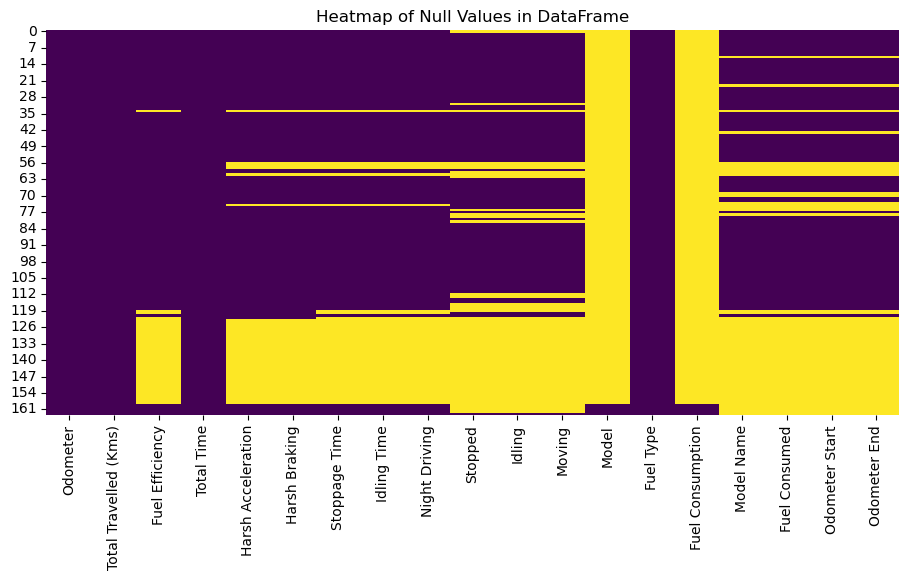

In [19]:
plt.figure(figsize=(11, 5))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False)
plt.title('Heatmap of Null Values in DataFrame')
plt.show()

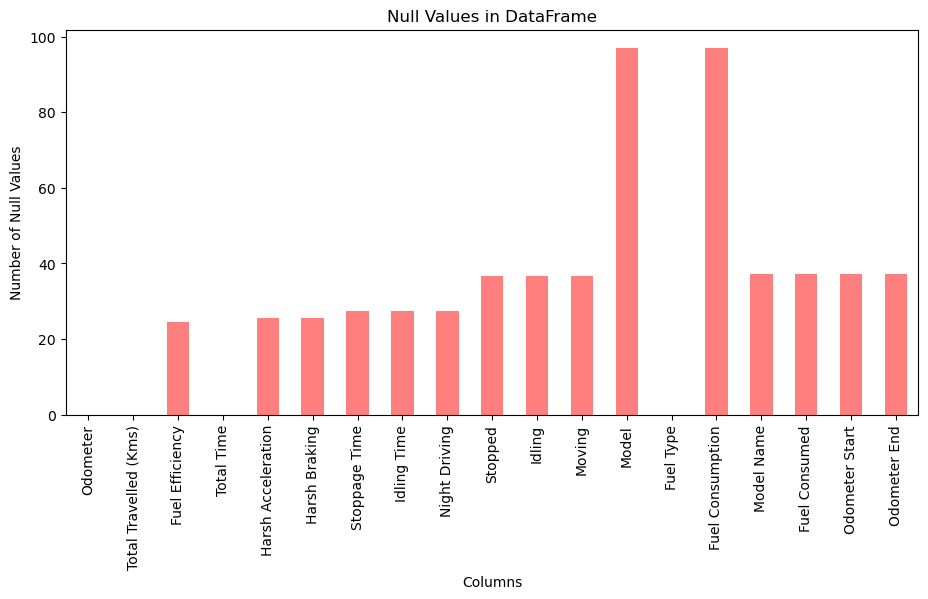

In [20]:
null_counts = data.isnull().sum()/data.isnull().count()*100
plt.figure(figsize=(11, 5))
null_counts.plot(kind='bar', color='red', alpha=0.5)
plt.title('Null Values in DataFrame')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.show()

## 2.3 Null values treatment for all features

## 2.3.1 Removing prefix as 'Km/L' and 'Km/Kg' from 'Fuel Efficiency' values

In [21]:
data['Fuel Efficiency'].unique()

array(['2.9 Km/L', '2.8 Km/L', '2.5 Km/L', '3.1 Km/L', '2.4 Km/L',
       '3.8 Km/L', '2.6 Km/L', '3 Km/L', '0 Km/L', '2 Km/L', '2.1 Km/L',
       '2.3 Km/L', '2.7 Km/L', '2.2 Km/L', '1.2 Km/L', '3.3 Km/L', nan,
       '3.6 Km/L', '3.4 Km/L', '5 Km/L', '18.92 Km/L', '3.5 Km/L',
       '1.8 Km/L', '3.2 Km/L', '3.7 Km/L', '4.3 Km/L', '- Km/L',
       '6.8 Km/Kg', '25.4 Km/Kg', '19.5 Km/L', '21.5 Km/L'], dtype=object)

In [22]:
data['Fuel Efficiency'] = [str(val).replace(' Km/L', '').replace(' Km/Kg', '') for val in data['Fuel Efficiency']]

## 2.3.2 Filling '-' as NaN values in 'Odometer'

In [23]:
data['Odometer'].unique()

array([109648, 144388, '-', 46898, 48984, 158998, 12080, 52891, 40420,
       53998, 146021, 19999, 28368, 29791, 71198, 0, 19857, 47720, 39027,
       33215, 20138, 48542, 96143, 32096, 102545, 77907, 9011, 48856,
       56525, 50364, 22737, 109810, 22668, 37934, 42743, 71619, 34506,
       105936, 42164, 47215, 31645, 30359, 42511, 45562, 45304, 15753,
       40286, 53994, 33888, 28681, 20244, 20263, 36021, 145295, 18987,
       8056, 48585, 5946, 82492, 54370, 69450, 47150, 74059, 61144, 69451,
       83020, 46974, 68432, 51955, 55610, 47530, 59529, 56102, 61412,
       56307, 89597, 51376, 39380, 49716, 24874, 30824, 72248, 58741,
       1487, 40187, 10753, 50967, 3373, 3374, 46894, 10176, 42997],
      dtype=object)

In [24]:
data.replace('-', pd.NA, inplace=True)

## 2.3.3 Filling NaN values for 'Fuel Efficiency', 'Harsh Acceleration' and 'Harsh Braking'

In [25]:
def impute_nan(data,variable,median):
    data[variable+"_median"]=data[variable].fillna(median)
    data[variable+"_random"]=data[variable]
    random_sample=data[variable].dropna().sample(data[variable].isnull().sum(), random_state=0)
    random_sample.index=data[data[variable].isnull()].index
    data.loc[data[variable].isnull(), variable+"_random"]=random_sample

In [26]:
data['Fuel Efficiency'] = pd.to_numeric(data['Fuel Efficiency'], errors='coerce')

### 2.3.3.1 Checking Mean, Median and Mode for 'Fuel Efficiency'

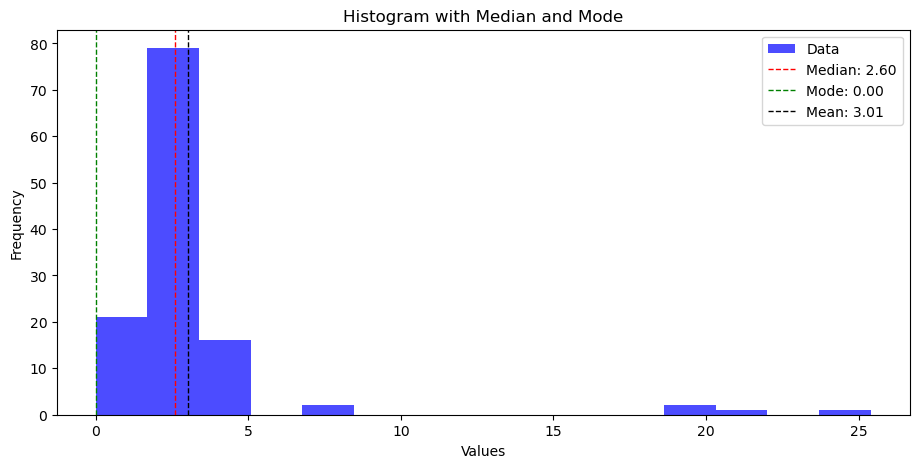

In [27]:
# Calculate median and mode
median_value_fe = data['Fuel Efficiency'].median()
mean_value_fe = data['Fuel Efficiency'].mean()
mode_value_fe = data['Fuel Efficiency'].mode().iloc[0]

# Plot the data and statistics
plt.figure(figsize=(11, 5))

# Plot the data
plt.hist(data['Fuel Efficiency'].dropna(), bins=15, color='blue', alpha=0.7, label='Data')

# Plot the median and mode lines
plt.axvline(median_value_fe, color='red', linestyle='dashed', linewidth=1, label=f'Median: {median_value_fe:.2f}')
plt.axvline(mode_value_fe, color='green', linestyle='dashed', linewidth=1, label=f'Mode: {mode_value_fe:.2f}')
plt.axvline(mean_value_fe, color='black', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value_fe:.2f}')

# Add labels and legend
plt.title('Histogram with Median and Mode')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

### 2.3.3.2 Filling null values with Mean, Median, Mode and Random values and comparing the best filling

In [28]:
data["FE_Median"] = data['Fuel Efficiency'].fillna(median_value_fe)
data["FE_Mode"] = data['Fuel Efficiency'].fillna(mode_value_fe)
data["FE_Mean"] = data['Fuel Efficiency'].fillna(mean_value_fe)

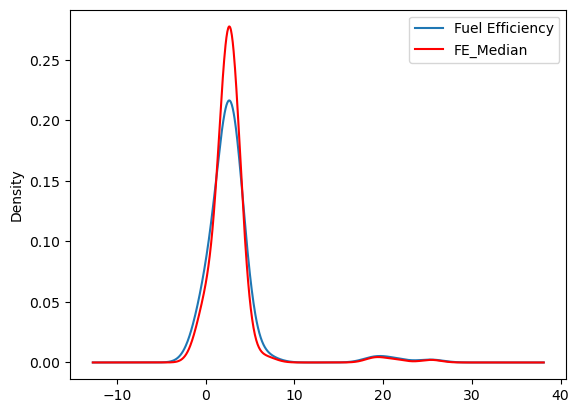

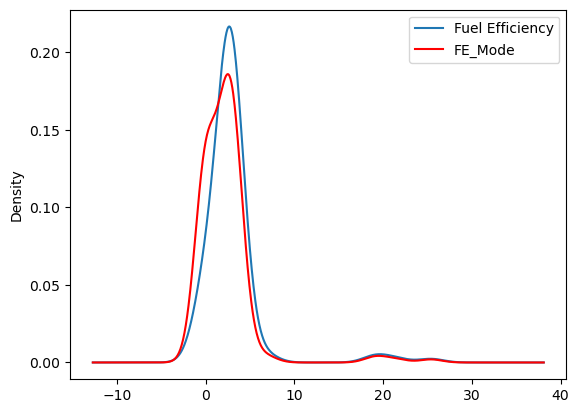

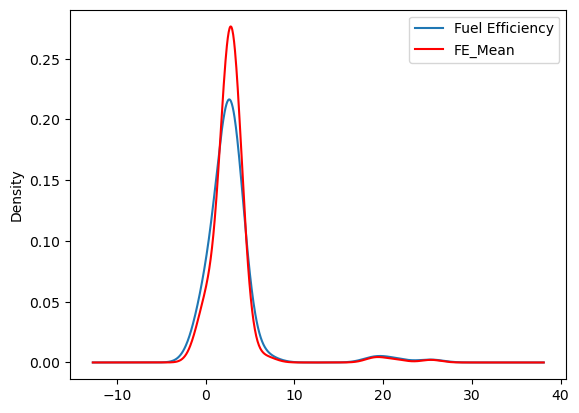

In [29]:
FE_Columns = ["FE_Median", "FE_Mode", "FE_Mean"]
for column in FE_Columns:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    data['Fuel Efficiency'].plot(kind='kde', ax=ax)
    data[column].plot(kind='kde', ax=ax, color='red')
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines, labels, loc="best")
    plt.show()

In [30]:
impute_nan(data,'Fuel Efficiency', median_value_fe)

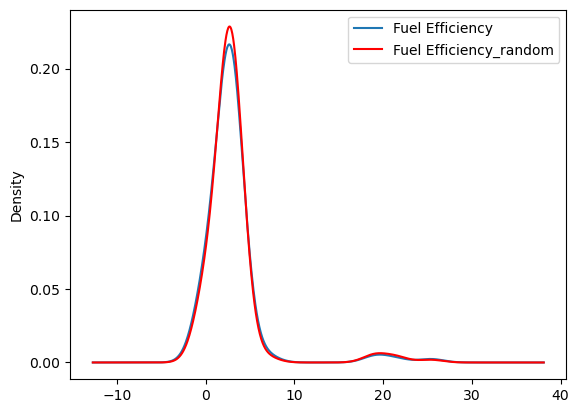

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['Fuel Efficiency'].plot(kind='kde', ax=ax)
data['Fuel Efficiency_random'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="best")
plt.show()

### 2.3.3.3 Checking Mean, Median and Mode for 'Harsh Acceleration'

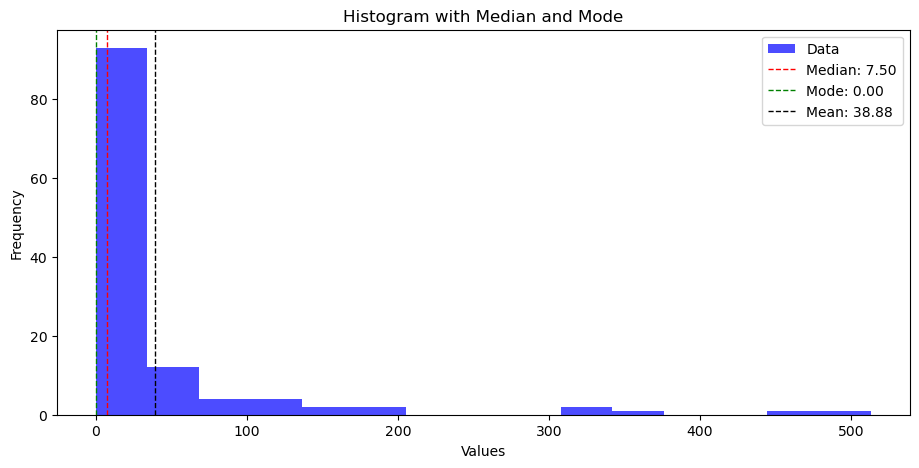

In [32]:
# Calculate median and mode
median_value_ha = data['Harsh Acceleration'].median()
mean_value_ha = data['Harsh Acceleration'].mean()
mode_value_ha = data['Harsh Acceleration'].mode().iloc[0]

plt.figure(figsize=(11, 5))
plt.hist(data['Harsh Acceleration'].dropna(), bins=15, color='blue', alpha=0.7, label='Data')

plt.axvline(median_value_ha, color='red', linestyle='dashed', linewidth=1, label=f'Median: {median_value_ha:.2f}')
plt.axvline(mode_value_ha, color='green', linestyle='dashed', linewidth=1, label=f'Mode: {mode_value_ha:.2f}')
plt.axvline(mean_value_ha, color='black', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value_ha:.2f}')

plt.title('Histogram with Median and Mode')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### 2.3.3.4 Filling null values with Mean, Median, Mode and Random values and comparing the best filling

In [33]:
data["HA_Median"] = data['Harsh Acceleration'].fillna(median_value_ha)
data["HA_Mode"] = data['Harsh Acceleration'].fillna(mode_value_ha)
data["HA_Mean"] = data['Harsh Acceleration'].fillna(mean_value_ha)

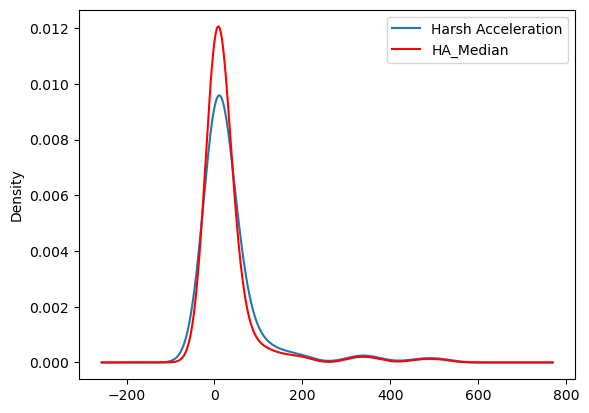

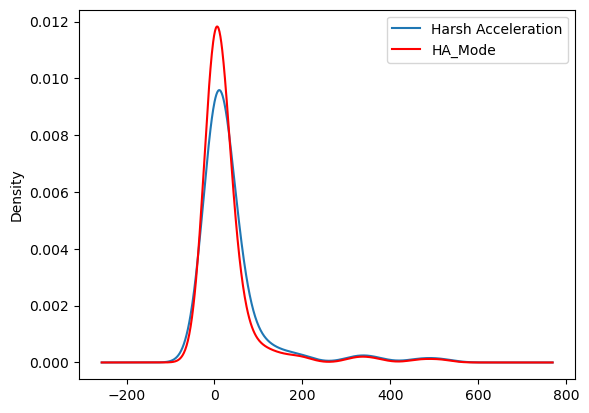

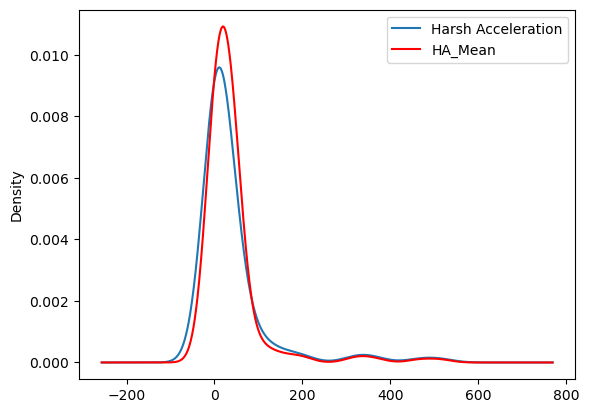

In [34]:
HA_Columns = ["HA_Median", "HA_Mode", "HA_Mean"]
for column in HA_Columns:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    data['Harsh Acceleration'].plot(kind='kde', ax=ax)
    data[column].plot(kind='kde', ax=ax, color='red')
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines, labels, loc="best")
    plt.show()

In [35]:
impute_nan(data,'Harsh Acceleration', median_value_ha)

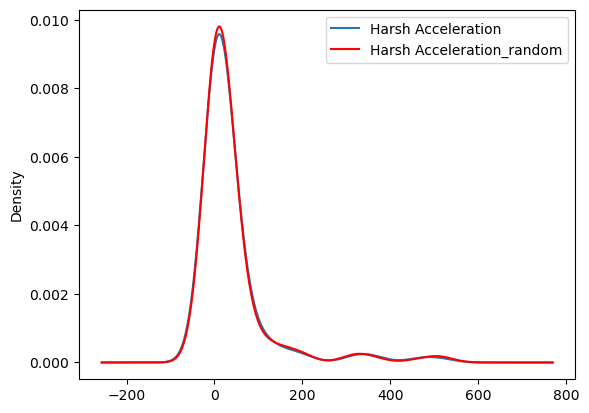

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['Harsh Acceleration'].plot(kind='kde', ax=ax)
data['Harsh Acceleration_random'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="best")
plt.show()

### 2.3.3.5 Checking Mean, Median and Mode for 'Harsh Braking'

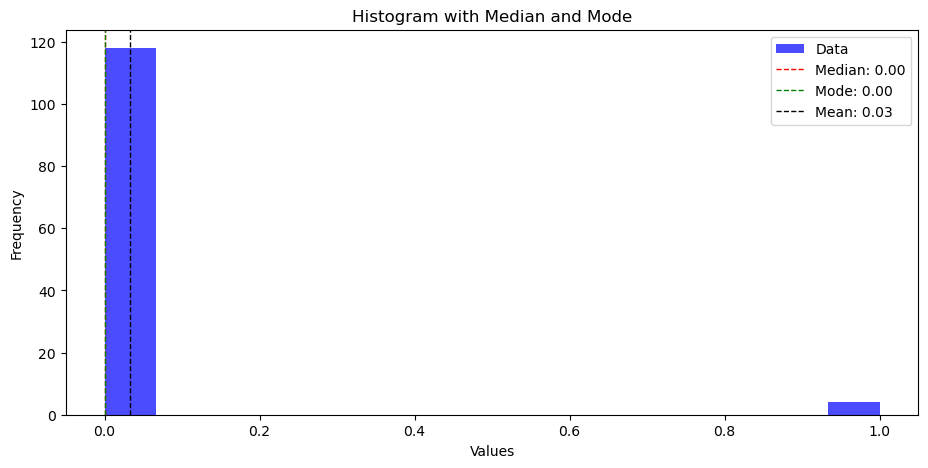

In [37]:
# Calculate median and mode
median_value_hb = data['Harsh Braking'].median()
mean_value_hb = data['Harsh Braking'].mean()
mode_value_hb = data['Harsh Braking'].mode().iloc[0]

plt.figure(figsize=(11, 5))
plt.hist(data['Harsh Braking'].dropna(), bins=15, color='blue', alpha=0.7, label='Data')

plt.axvline(median_value_hb, color='red', linestyle='dashed', linewidth=1, label=f'Median: {median_value_hb:.2f}')
plt.axvline(mode_value_hb, color='green', linestyle='dashed', linewidth=1, label=f'Mode: {mode_value_hb:.2f}')
plt.axvline(mean_value_hb, color='black', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value_hb:.2f}')

plt.title('Histogram with Median and Mode')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### 2.3.3.6 Filling null values with Mean, Median, Mode and Random values and comparing the best filling

In [38]:
data["HB_Median"] = data['Harsh Braking'].fillna(median_value_hb)
data["HB_Mode"] = data['Harsh Braking'].fillna(mode_value_hb)
data["HB_Mean"] = data['Harsh Braking'].fillna(mean_value_hb)

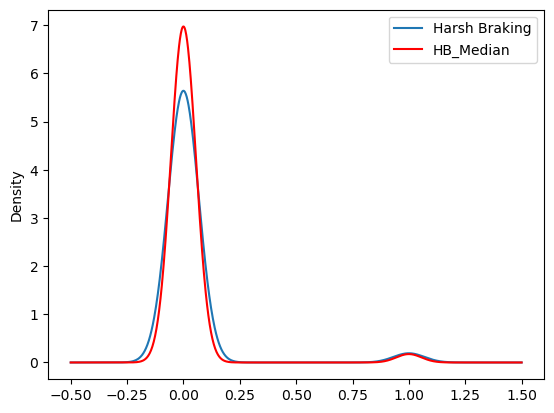

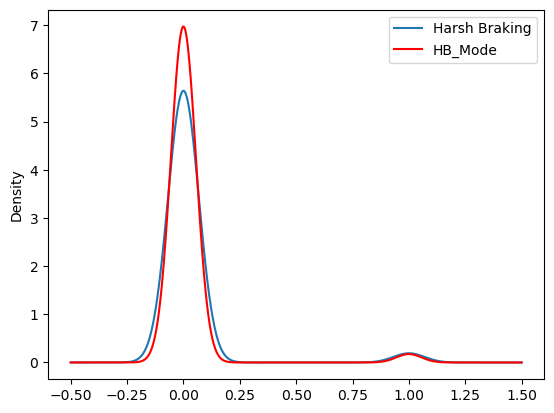

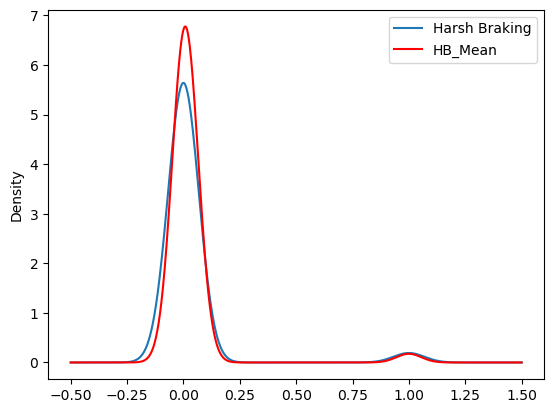

In [39]:
HB_Columns = ["HB_Median", "HB_Mode", "HB_Mean"]
for column in HB_Columns:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    data['Harsh Braking'].plot(kind='kde', ax=ax)
    data[column].plot(kind='kde', ax=ax, color='red')
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines, labels, loc="best")
    plt.show()

In [40]:
impute_nan(data,'Harsh Braking', median_value_ha)

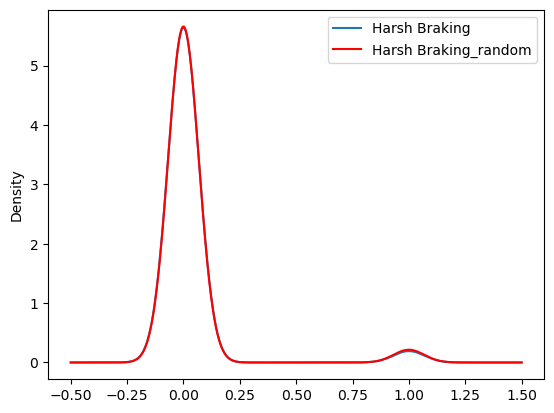

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['Harsh Braking'].plot(kind='kde', ax=ax)
data['Harsh Braking_random'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="best")
plt.show()

In [42]:
(data.isnull().sum() / data.isnull().count() * 100)[data.isnull().sum() > 0]

Odometer               0.609756
Fuel Efficiency       25.609756
Harsh Acceleration    25.609756
Harsh Braking         25.609756
Stoppage Time         38.414634
Idling Time           37.804878
Night Driving         27.439024
Stopped               36.585366
Idling                36.585366
Moving                36.585366
Model                 96.951220
Fuel Consumption      96.951220
Model Name            37.195122
Fuel Consumed         37.195122
Odometer Start        38.414634
Odometer End          38.414634
dtype: float64

## 2.3.4 Dropping unwanted columns after filling null values

In [43]:
data.columns

Index(['Odometer', 'Total Travelled (Kms)', 'Fuel Efficiency', 'Total Time',
       'Harsh Acceleration', 'Harsh Braking', 'Stoppage Time', 'Idling Time',
       'Night Driving', 'Stopped', 'Idling', 'Moving', 'Model', 'Fuel Type',
       'Fuel Consumption', 'Model Name', 'Fuel Consumed', 'Odometer Start',
       'Odometer End', 'FE_Median', 'FE_Mode', 'FE_Mean',
       'Fuel Efficiency_median', 'Fuel Efficiency_random', 'HA_Median',
       'HA_Mode', 'HA_Mean', 'Harsh Acceleration_median',
       'Harsh Acceleration_random', 'HB_Median', 'HB_Mode', 'HB_Mean',
       'Harsh Braking_median', 'Harsh Braking_random'],
      dtype='object')

In [44]:
columns_to_drop_fillna = ['Fuel Efficiency', 'Harsh Acceleration', 'Harsh Braking', 'HA_Median', 'HA_Mode', 'HA_Mean',
                         'Harsh Acceleration_median', 'HB_Median', 'HB_Mode', 'HB_Mean', 'Harsh Braking_median', 
                        'FE_Median', 'FE_Mode', 'FE_Mean',
                           'Fuel Efficiency_median']
data.drop(columns=columns_to_drop_fillna, inplace=True)

In [45]:
data = data.rename(columns={'Fuel Efficiency_random': 'Fuel Efficiency', 'Harsh Acceleration_random': 'Harsh Acceleration', 'Harsh Braking_random': 'Harsh Braking'})

In [46]:
data.head()

Odometer Total Travelled (Kms) Total Time Stoppage Time Idling Time  \
0   109648                  0 Km   498h 48m      110h 36m      7h 54m   
1   144388             5247.0 Km   620h 17m      262h 53m     12h 40m   
2     <NA>              569.0 Km   142h 12m       35h 16m         41m   
3    46898  4363.700000000004 Km   406h 31m      152h 35m      6h 19m   
4    48984  729.7000000000044 Km   188h 41m        70h 2m      1h 21m   

  Night Driving Stopped Idling  Moving Model Fuel Type Fuel Consumption  \
0       18h 40m     NaN    NaN     NaN   NaN    Diesel              NaN   
1       18h 40m  48.83%  3.49%  47.68%   NaN    Diesel              NaN   
2            8m  59.29%  2.45%  38.25%   NaN    Diesel              NaN   
3        3h 48m  75.89%  1.46%  22.65%   NaN    Diesel              NaN   
4       19h 53m   9.39%  2.93%  87.68%   NaN    Diesel              NaN   

  Model Name Fuel Consumed Odometer Start Odometer End  Fuel Efficiency  \
0   LPT 4225      1144.3 L        98160.7     101206.9              2.9   
1   LPT 4225      1433.1 L       135451.3     139378.9              2.8   
2   LPT 3518         827 L        59165.5      61134.5              2.5   
3     4225TC      1693.3 L        31796.4        37045              3.1   
4     4225TC      1087.5 L        34963.6      37874.6              2.4   

   Harsh Acceleration  Harsh Braking  
0                 9.0            0.0  
1                 7.0            0.0  
2                34.0            0.0  
3                24.0            0.0  
4                13.0            0.0

## 2.3.5 Converting Odometer releated features into Numeric dtype and filling null values with median

In [47]:
data['Odometer Start'] = pd.to_numeric(data['Odometer Start'], errors='coerce')
data["Odometer Start"] = data['Odometer Start'].fillna(data['Odometer Start'].median())

In [48]:
data['Odometer End'] = pd.to_numeric(data['Odometer End'], errors='coerce')
data["Odometer End"] = data['Odometer End'].fillna(data['Odometer End'].median())

In [49]:
data['Odometer'] = pd.to_numeric(data['Odometer'], errors='coerce')
data["Odometer"] = data['Odometer'].fillna(data['Odometer'].median())

## 2.3.6 Merging 'Model' and 'Model Name' features together and filling null value with Mode

In [50]:
data['Model_Merged_Column'] = data['Model'].fillna('') + data['Model Name'].fillna('')
data['Model_Merged_Column'] = data['Model_Merged_Column'].replace('', np.nan)

In [51]:
data['Model_Merged_Column'].unique()

array(['LPT 4225', 'LPT 3518', '4225TC', '3518TC', nan, 'LPS5530TC',
       '5525.S', 'LPS5525TC 4x2', '3.8SGI CNG',
       'PRIMA 3528.K 6.7L BS6 RDE'], dtype=object)

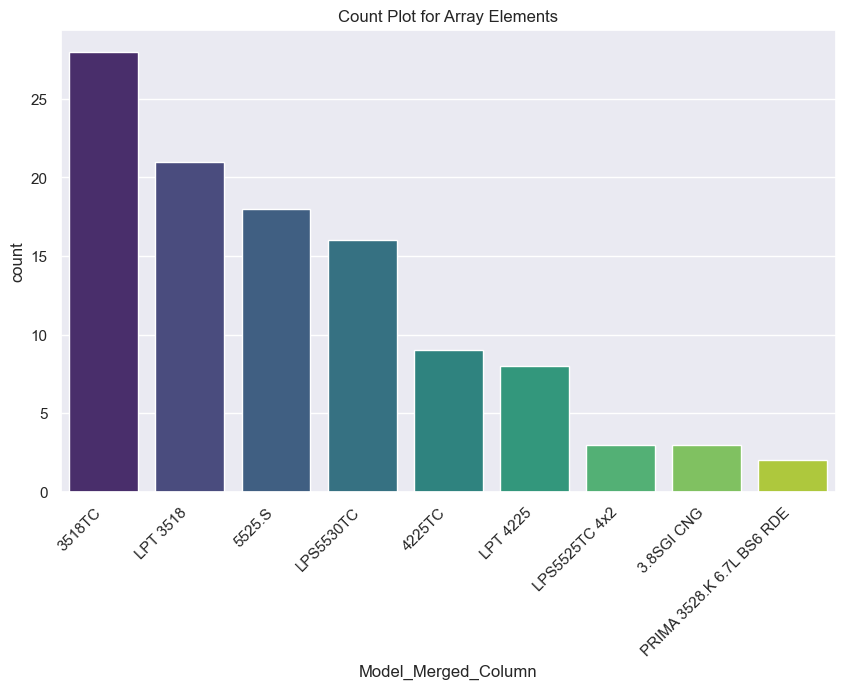

In [52]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='Model_Merged_Column', data=data, order=data['Model_Merged_Column'].value_counts().index, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Count Plot for Array Elements')
plt.show()

In [53]:
data["Model_Merged_Column"] = data['Model_Merged_Column'].fillna('3518TC')

In [54]:
delete_model_columns = ['Model', 'Model Name']
data.drop(columns=delete_model_columns, inplace=True)

## 2.3.7 Merging 'Fuel Consumption' and 'Fuel Consumed' features together

In [55]:
data['Fuel Consumed_Merged_Column'] = data['Fuel Consumption'].fillna('') + data['Fuel Consumed'].fillna('')
data['Fuel Consumed_Merged_Column'] = data['Fuel Consumed_Merged_Column'].replace('', np.nan)

In [56]:
delete_fuel_consmption_columns = ['Fuel Consumption', 'Fuel Consumed']
data.drop(columns=delete_fuel_consmption_columns, inplace=True)

In [57]:
data = data.rename(columns={'Model_Merged_Column': 'Model Name', 'Fuel Consumed_Merged_Column': 'Fuel Consumed'})

## 2.3.8 Dropping all the rows in 'Fuel Consumed' with null values

In [58]:
df3 = data.dropna(subset=['Fuel Consumed'])
# data["Fuel Consumed"] = data['Fuel Consumed'].fillna(data['Fuel Consumed'].median())

In [59]:
(df3.isnull().sum() / df3.isnull().count() * 100)[df3.isnull().sum() > 0]

Stoppage Time    12.037037
Idling Time       8.333333
Stopped          12.962963
Idling           12.962963
Moving           12.962963
dtype: float64

## 2.3.9 Filling null values of left over features

In [60]:
# Custom function to convert values to '0h Xm' format
def convert_to_hours_minutes(value):
    if 'h' not in value:
        return f'0h {value}'
    return value

In [61]:
# Custom function to convert values to '0h Xm' format
def convert_to_minutes_hours(value):
    if 'm' not in value:
        return f'{value} 0m'
    return value

In [62]:
df3['Idling Time'] = df3['Idling Time'].fillna('0h 0m')
df3['Night Driving'] = df3['Night Driving'].fillna('0h 0m')
df3['Total Time'] = df3['Total Time'].fillna('0h 0m')
df3['Stoppage Time'] = df3['Stoppage Time'].fillna('0h 0m')

df3['Idling Time'] = df3['Idling Time'].apply(convert_to_hours_minutes)
df3['Idling Time'] = df3['Idling Time'].apply(convert_to_minutes_hours)

df3['Night Driving'] = df3['Night Driving'].apply(convert_to_hours_minutes)
df3['Night Driving'] = df3['Night Driving'].apply(convert_to_minutes_hours)

df3['Total Time'] = df3['Total Time'].apply(convert_to_hours_minutes)
df3['Total Time'] = df3['Total Time'].apply(convert_to_minutes_hours)

df3['Stoppage Time'] = df3['Stoppage Time'].apply(convert_to_hours_minutes)
df3['Stoppage Time'] = df3['Stoppage Time'].apply(convert_to_minutes_hours)

df3['Idling Time Hours'] = df3['Idling Time'].apply(lambda x: int(x.split('h')[0]))
df3['Idling Time Minutes'] = df3['Idling Time'].apply(lambda x: int(x.split('h')[1].split('m')[0]))
df3['Idling Total Minutes'] = df3['Idling Time Hours'] * 60 + df3['Idling Time Minutes']

df3['Night Driving Hours'] = df3['Night Driving'].apply(lambda x: int(x.split('h')[0]))
df3['Night Driving Minutes'] = df3['Night Driving'].apply(lambda x: int(x.split('h')[1].split('m')[0]))
df3['Night Driving Total Minutes'] = df3['Night Driving Hours'] * 60 + df3['Night Driving Minutes']

df3['Total Time Hours'] = df3['Total Time'].apply(lambda x: int(x.split('h')[0]))
df3['Total Time Minutes'] = df3['Total Time'].apply(lambda x: int(x.split('h')[1].split('m')[0]))
df3['Total Time Total Minutes'] = df3['Total Time Hours'] * 60 + df3['Total Time Minutes']

df3['Stoppage Time Hours'] = df3['Stoppage Time'].apply(lambda x: int(x.split('h')[0]))
df3['Stoppage Time Minutes'] = df3['Stoppage Time'].apply(lambda x: int(x.split('h')[1].split('m')[0]))
df3['Stoppage Total Minutes'] = df3['Stoppage Time Hours'] * 60 + df3['Stoppage Time Minutes']

In [63]:
df3['Stopped'] = df3['Stopped'].fillna('0%')
df3['Moving'] = df3['Moving'].fillna('0%')
df3['Idling'] = df3['Idling'].fillna('0%')

In [64]:
df3['Stopped Percentage'] = df3['Stopped'].str.rstrip('%').astype('float') / 100.0
df3['Moving Percentage'] = df3['Moving'].str.rstrip('%').astype('float') / 100.0
df3['Idling Percentage'] = df3['Idling'].str.rstrip('%').astype('float') / 100.0

In [65]:
df3['Stopped Percentage'] = df3['Stopped Percentage'].fillna(0.000)
df3['Moving Percentage'] = df3['Moving Percentage'].fillna(0.000)
df3['Idling Percentage'] = df3['Idling Percentage'].fillna(0.000)

In [66]:
df3['Total Travelled (Kms)'] = df3['Total Travelled (Kms)'].fillna(0.000)

In [67]:
del_drive_behaviour_columns = ['Stoppage Time Hours', 'Stoppage Time Minutes', 'Idling Time Hours', 'Idling Time Minutes', 'Night Driving Hours', 'Night Driving Minutes', 'Stopped', 'Idling', 'Moving', 'Stoppage Time', 'Idling Time', 'Night Driving', 'Total Time Hours', 'Total Time Minutes', 'Total Time', 'Odometer Start', 'Odometer End']
df3.drop(columns=del_drive_behaviour_columns, inplace=True)

## 2.3.10 Removing suffix from 'Total Travelled (Kms)' and 'Fuel Consumed'

In [68]:
df3['Total Travelled (Kms)'] = df3['Total Travelled (Kms)'].str.replace(' Km', '').replace('0', '0.0')
df3['Total Travelled (Kms)'] = pd.to_numeric(df3['Total Travelled (Kms)'], errors='coerce')

In [69]:
df3['Fuel Consumed'] = df3['Fuel Consumed'].str.replace(r'\s*[A-Za-z]+\s*', '', regex=True)
df3['Fuel Consumed'] = pd.to_numeric(df3['Fuel Consumed'], errors='coerce')

In [70]:
df3.shape

(108, 15)

## 2.3.11 Final Dataset with cleaned data and no null values

In [71]:
df3.head()

Odometer  Total Travelled (Kms) Fuel Type  Fuel Efficiency  \
0  109648.0                    0.0    Diesel              2.9   
1  144388.0                 5247.0    Diesel              2.8   
2   40187.0                  569.0    Diesel              2.5   
3   46898.0                 4363.7    Diesel              3.1   
4   48984.0                  729.7    Diesel              2.4   

   Harsh Acceleration  Harsh Braking Model Name  Fuel Consumed  \
0                 9.0            0.0   LPT 4225         1144.3   
1                 7.0            0.0   LPT 4225         1433.1   
2                34.0            0.0   LPT 3518          827.0   
3                24.0            0.0     4225TC         1693.3   
4                13.0            0.0     4225TC         1087.5   

   Idling Total Minutes  Night Driving Total Minutes  \
0                   474                         1120   
1                   760                         1120   
2                    41                            8   
3                   379                          228   
4                    81                         1193   

   Total Time Total Minutes  Stoppage Total Minutes  Stopped Percentage  \
0                     29928                    6636              0.0000   
1                     37217                   15773              0.4883   
2                      8532                    2116              0.5929   
3                     24391                    9155              0.7589   
4                     11321                    4202              0.0939   

   Moving Percentage  Idling Percentage  
0             0.0000             0.0000  
1             0.4768             0.0349  
2             0.3825             0.0245  
3             0.2265             0.0146  
4             0.8768             0.0293

In [72]:
df3.shape

(108, 15)

In [73]:
(df3.isnull().sum() / df3.isnull().count() * 100)

Odometer                       0.0
Total Travelled (Kms)          0.0
Fuel Type                      0.0
Fuel Efficiency                0.0
Harsh Acceleration             0.0
Harsh Braking                  0.0
Model Name                     0.0
Fuel Consumed                  0.0
Idling Total Minutes           0.0
Night Driving Total Minutes    0.0
Total Time Total Minutes       0.0
Stoppage Total Minutes         0.0
Stopped Percentage             0.0
Moving Percentage              0.0
Idling Percentage              0.0
dtype: float64

In [74]:
df = df3
df.head()

Odometer  Total Travelled (Kms) Fuel Type  Fuel Efficiency  \
0  109648.0                    0.0    Diesel              2.9   
1  144388.0                 5247.0    Diesel              2.8   
2   40187.0                  569.0    Diesel              2.5   
3   46898.0                 4363.7    Diesel              3.1   
4   48984.0                  729.7    Diesel              2.4   

   Harsh Acceleration  Harsh Braking Model Name  Fuel Consumed  \
0                 9.0            0.0   LPT 4225         1144.3   
1                 7.0            0.0   LPT 4225         1433.1   
2                34.0            0.0   LPT 3518          827.0   
3                24.0            0.0     4225TC         1693.3   
4                13.0            0.0     4225TC         1087.5   

   Idling Total Minutes  Night Driving Total Minutes  \
0                   474                         1120   
1                   760                         1120   
2                    41                            8   
3                   379                          228   
4                    81                         1193   

   Total Time Total Minutes  Stoppage Total Minutes  Stopped Percentage  \
0                     29928                    6636              0.0000   
1                     37217                   15773              0.4883   
2                      8532                    2116              0.5929   
3                     24391                    9155              0.7589   
4                     11321                    4202              0.0939   

   Moving Percentage  Idling Percentage  
0             0.0000             0.0000  
1             0.4768             0.0349  
2             0.3825             0.0245  
3             0.2265             0.0146  
4             0.8768             0.0293

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 0 to 163
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Odometer                     108 non-null    float64
 1   Total Travelled (Kms)        108 non-null    float64
 2   Fuel Type                    108 non-null    object 
 3   Fuel Efficiency              108 non-null    float64
 4   Harsh Acceleration           108 non-null    float64
 5   Harsh Braking                108 non-null    float64
 6   Model Name                   108 non-null    object 
 7   Fuel Consumed                108 non-null    float64
 8   Idling Total Minutes         108 non-null    int64  
 9   Night Driving Total Minutes  108 non-null    int64  
 10  Total Time Total Minutes     108 non-null    int64  
 11  Stoppage Total Minutes       108 non-null    int64  
 12  Stopped Percentage           108 non-null    float64
 13  Moving Percentage   

In [76]:
df.describe()

Odometer  Total Travelled (Kms)  Fuel Efficiency  \
count     108.000000             108.000000       108.000000   
mean    55081.620370            7191.540806         3.222222   
std     34452.416171           21623.753737         3.393048   
min         0.000000               0.000000         0.000000   
25%     35642.250000             278.852500         2.400000   
50%     49350.000000             577.950000         2.700000   
75%     71303.250000            1481.424250         3.200000   
max    158998.000000          151943.000000        25.400000   

       Harsh Acceleration  Harsh Braking  Fuel Consumed  Idling Total Minutes  \
count          108.000000     108.000000     108.000000            108.000000   
mean            41.500000       0.018519    1503.515370             88.935185   
std             89.516093       0.135445    4785.067926            113.294445   
min              0.000000       0.000000       0.000000              0.000000   
25%              2.000000       0.000000     667.500000             18.000000   
50%              8.500000       0.000000     848.600000             64.000000   
75%             33.250000       0.000000    1119.500000            111.000000   
max            513.000000       1.000000   36077.500000            760.000000   

       Night Driving Total Minutes  Total Time Total Minutes  \
count                   108.000000                108.000000   
mean                    155.518519               9839.879630   
std                     243.286627               8740.756023   
min                       0.000000                157.000000   
25%                       7.750000               4256.500000   
50%                      68.000000               7402.000000   
75%                     201.000000              12636.500000   
max                    1193.000000              44520.000000   

       Stoppage Total Minutes  Stopped Percentage  Moving Percentage  \
count              108.000000          108.000000         108.000000   
mean              2509.305556            0.457846           0.394341   
std               2609.227022            0.261106           0.242431   
min                  0.000000            0.000000           0.000000   
25%                233.500000            0.297450           0.209300   
50%               2208.500000            0.525100           0.411750   
75%               3781.000000            0.631825           0.552300   
max              15773.000000            0.922500           1.000000   

       Idling Percentage  
count         108.000000  
mean            0.018181  
std             0.016725  
min             0.000000  
25%             0.008875  
50%             0.014150  
75%             0.025350  
max             0.075800

In [77]:
df[['Fuel Efficiency','Total Travelled (Kms)','Total Time Total Minutes']].corr()

Fuel Efficiency  Total Travelled (Kms)  \
Fuel Efficiency                  1.000000              -0.027944   
Total Travelled (Kms)           -0.027944               1.000000   
Total Time Total Minutes        -0.048214               0.135944   

                          Total Time Total Minutes  
Fuel Efficiency                          -0.048214  
Total Travelled (Kms)                     0.135944  
Total Time Total Minutes                  1.000000

In [78]:
df[['Fuel Consumed','Fuel Efficiency']].corr()

Fuel Consumed  Fuel Efficiency
Fuel Consumed         1.000000        -0.055134
Fuel Efficiency      -0.055134         1.000000

In [79]:
df[['Fuel Consumed','Fuel Efficiency']].groupby('Fuel Efficiency').median()

Fuel Consumed
Fuel Efficiency               
0.0                    622.000
1.2                  36077.500
1.8                    358.100
2.0                   1118.500
2.1                    792.000
2.2                   1086.150
2.3                   1201.000
2.4                   1071.500
2.5                    864.500
2.6                    878.000
2.7                    776.000
2.8                    963.700
2.9                   1078.500
3.0                    712.000
3.1                    772.000
3.2                    776.000
3.3                    954.500
3.4                    623.450
3.5                    983.650
3.6                   1356.100
3.7                    612.700
3.8                   1132.600
4.3                    402.000
6.8                     38.645
19.5                   111.500
21.5                  1018.500
25.4                   153.870

In [80]:
df.shape

(108, 15)

In [81]:
df.drop(df[df['Fuel Consumed'] > 5000].index, inplace=True)
df.drop(df[df['Fuel Consumed'] < 10].index, inplace=True)

In [82]:
df.shape

(104, 15)

# 3. Exploratory Data Analysis

# 3.1 Univariate Analysis

## 3.1.1 Statistical Summary

In [83]:
df.columns

Index(['Odometer', 'Total Travelled (Kms)', 'Fuel Type', 'Fuel Efficiency',
       'Harsh Acceleration', 'Harsh Braking', 'Model Name', 'Fuel Consumed',
       'Idling Total Minutes', 'Night Driving Total Minutes',
       'Total Time Total Minutes', 'Stoppage Total Minutes',
       'Stopped Percentage', 'Moving Percentage', 'Idling Percentage'],
      dtype='object')

In [84]:
df[['Total Travelled (Kms)', 'Fuel Efficiency', 'Fuel Consumed', 'Total Time Total Minutes']].describe()

Total Travelled (Kms)  Fuel Efficiency  Fuel Consumed  \
count             104.000000       104.000000     104.000000   
mean             7396.597174         3.273077     867.544808   
std             22008.227151         3.437521     350.588927   
min                 0.000000         0.000000      37.940000   
25%               282.201250         2.400000     676.125000   
50%               577.950000         2.700000     848.600000   
75%              1481.424250         3.200000    1119.500000   
max            151943.000000        25.400000    1693.300000   

       Total Time Total Minutes  
count                104.000000  
mean                9581.701923  
std                 8158.903644  
min                  157.000000  
25%                 4256.500000  
50%                 7402.000000  
75%                12585.250000  
max                43317.000000

## 3.1.2 Frequency Distribution for the categorical Columns

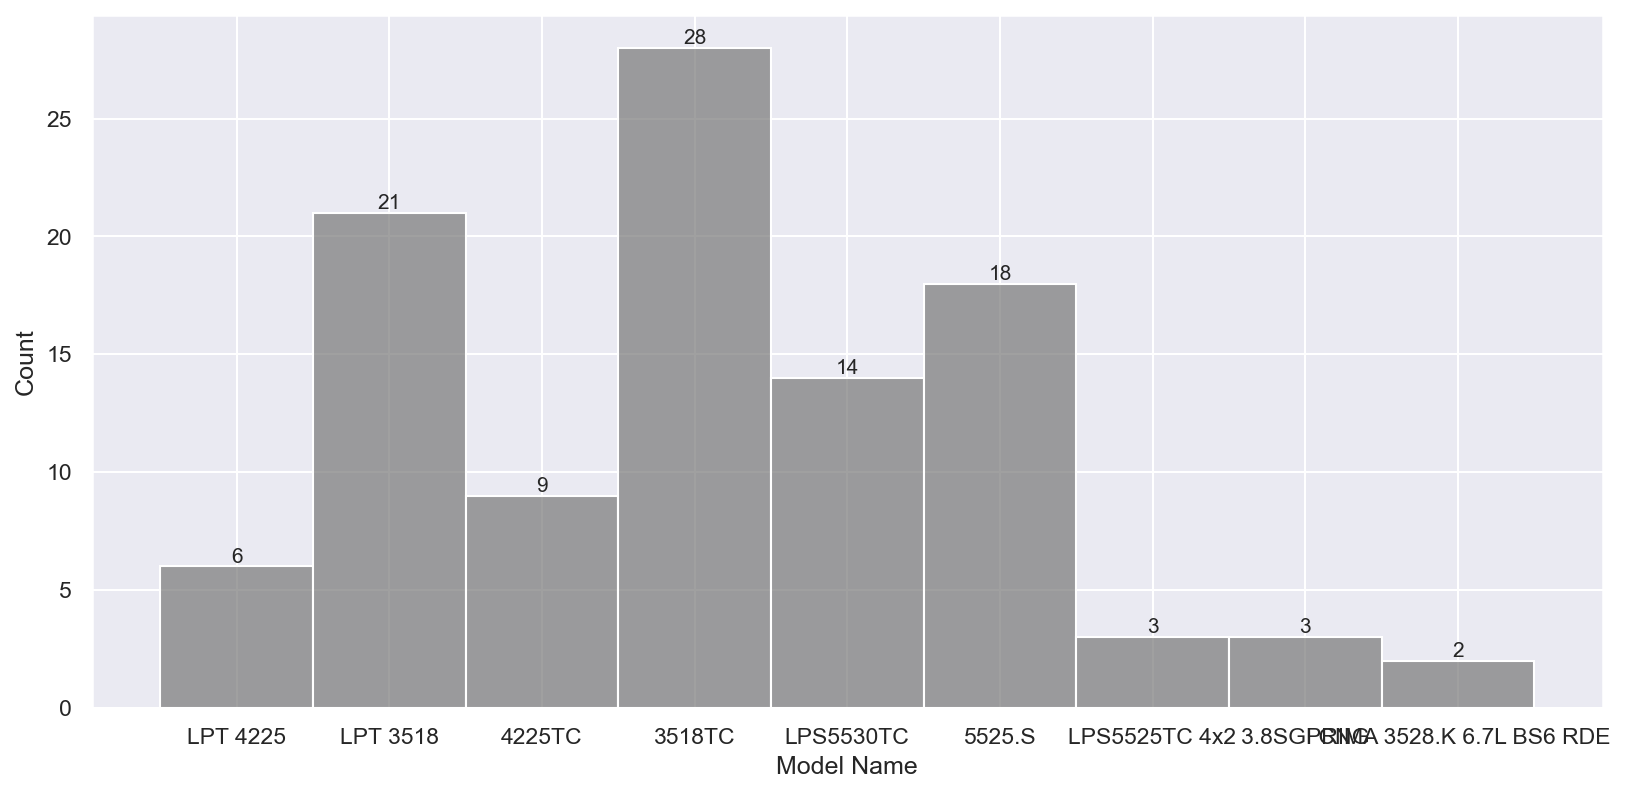

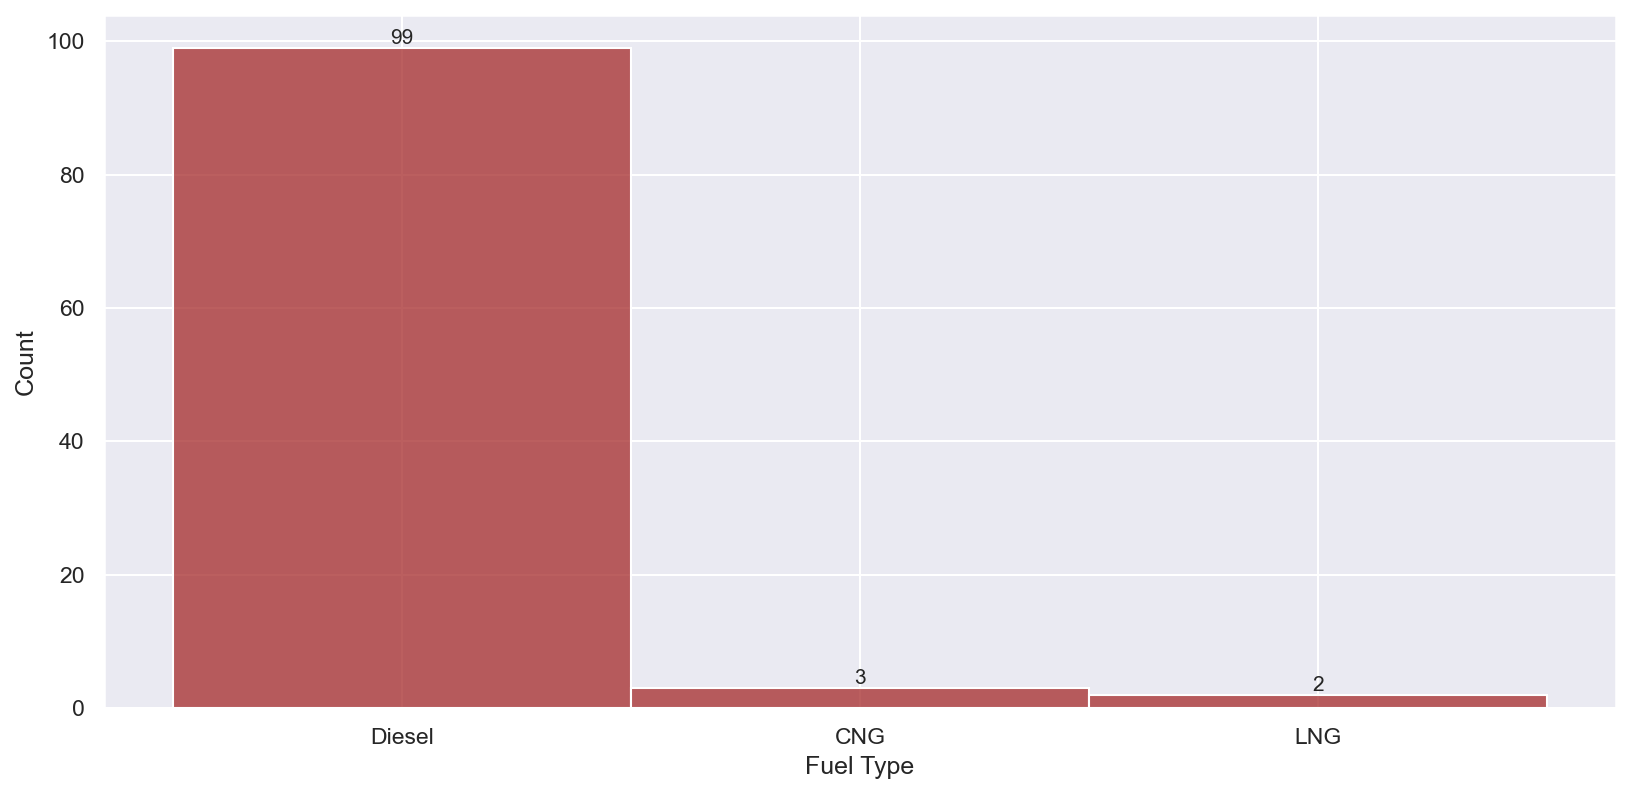

In [85]:
categorical_features = ['Model Name', 'Fuel Type']
color_set = ['grey','brown','Thistle', 'SaddleBrown']
for cat_feature, color in zip(categorical_features, color_set):
    plt.figure(figsize=(13,6), dpi=150)
    chart1=sns.histplot(data=df, x=cat_feature, color=color)
    chart1.bar_label(chart1.containers[0],size=10)
    plt.show()

## 3.1.3 Frequency Distribution for the Continuous/Numerical Columns

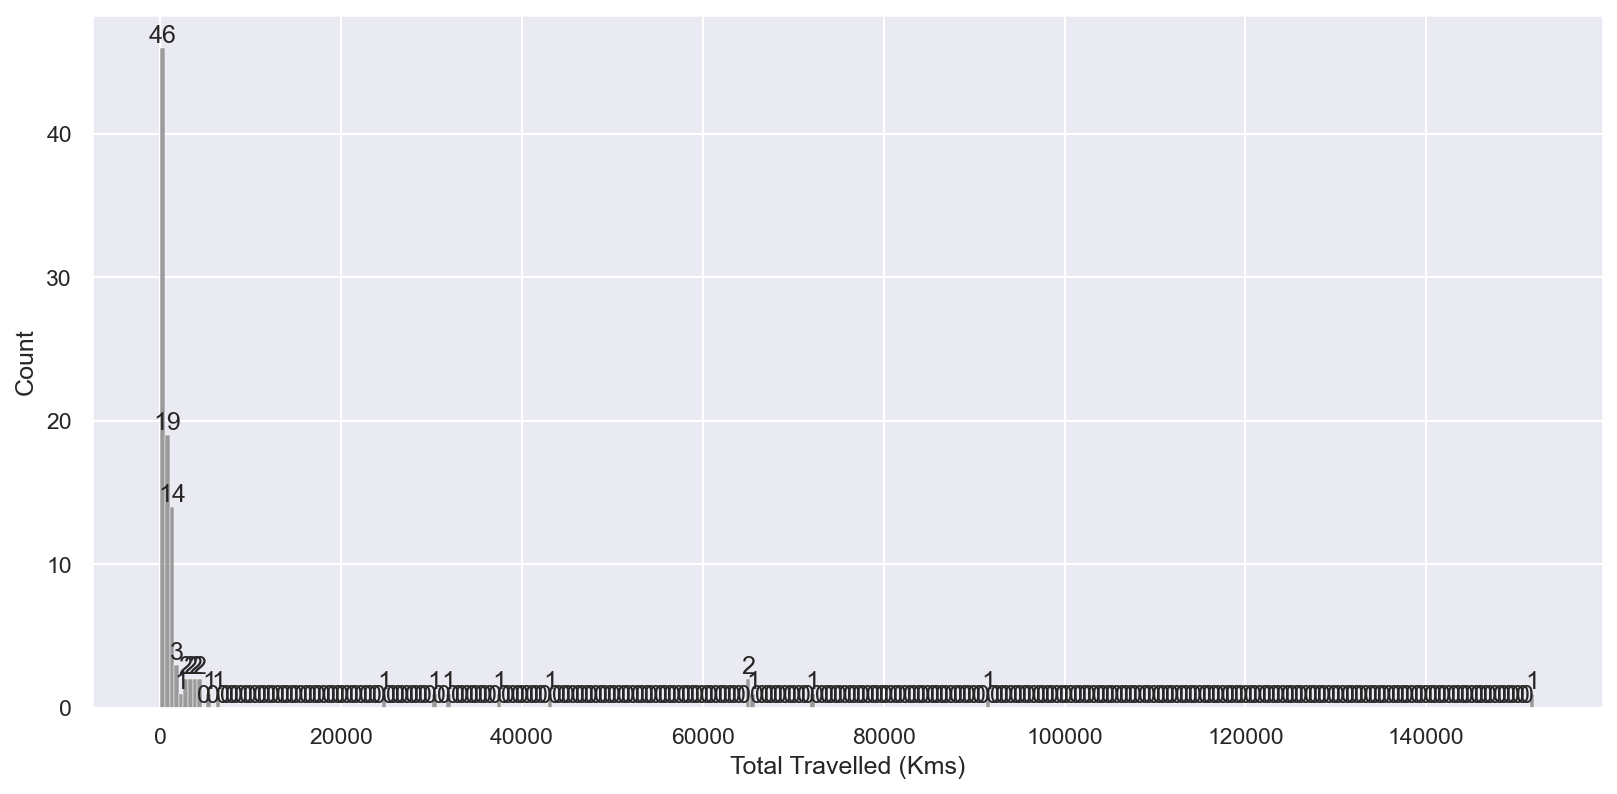

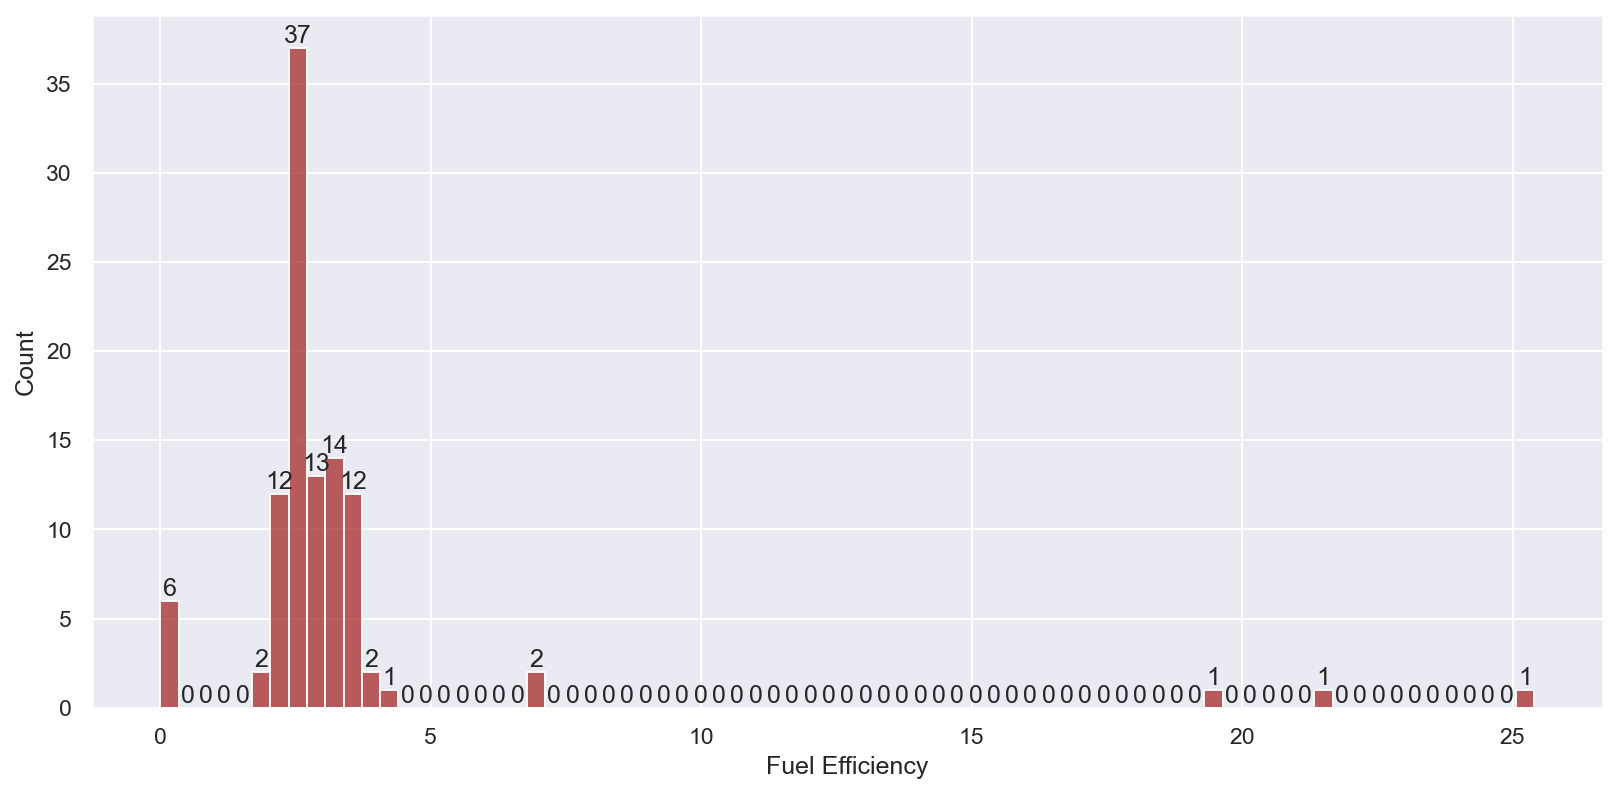

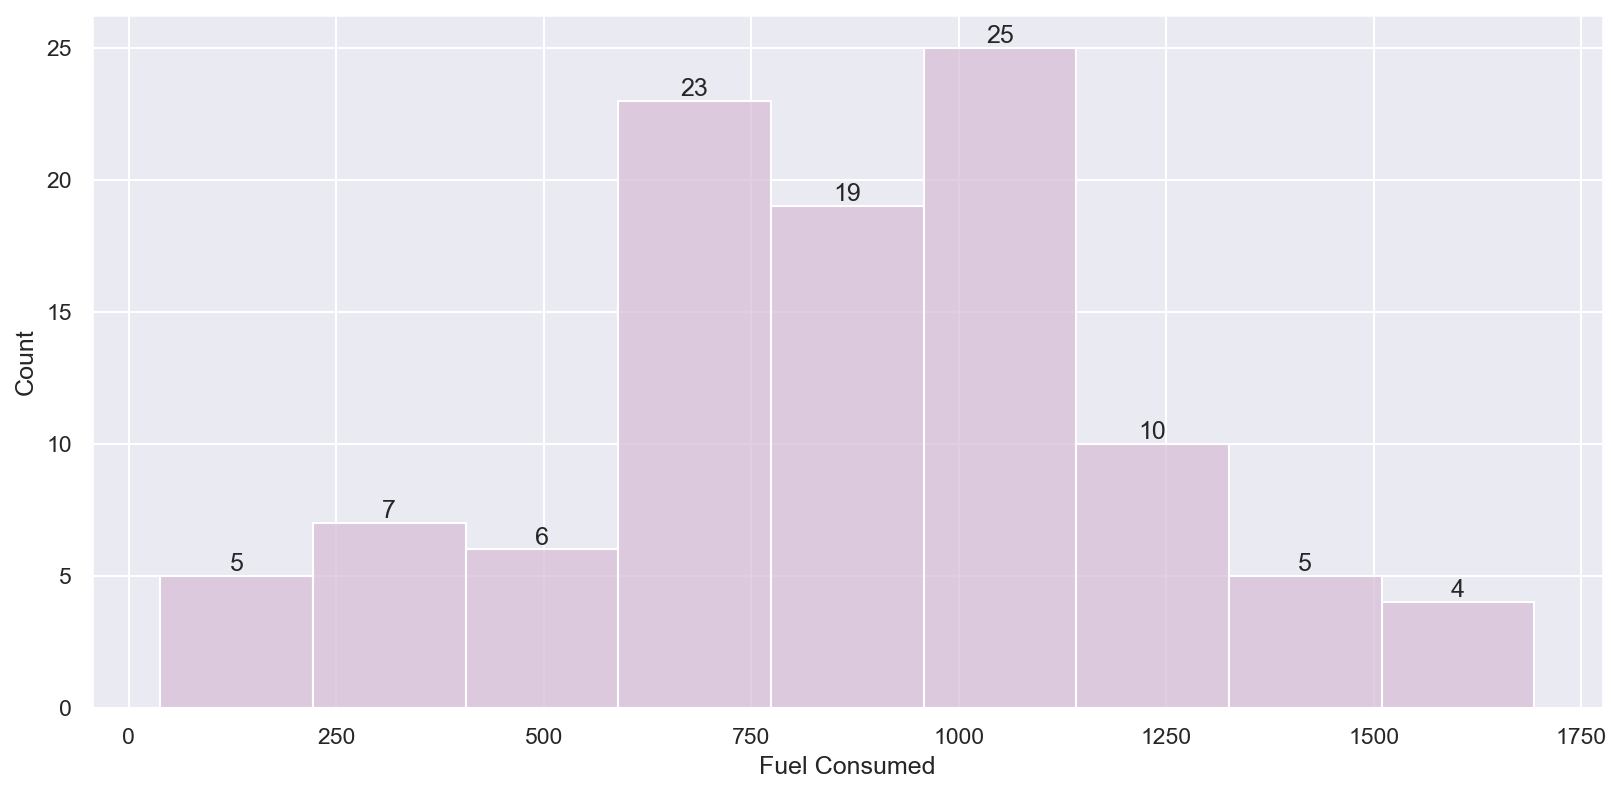

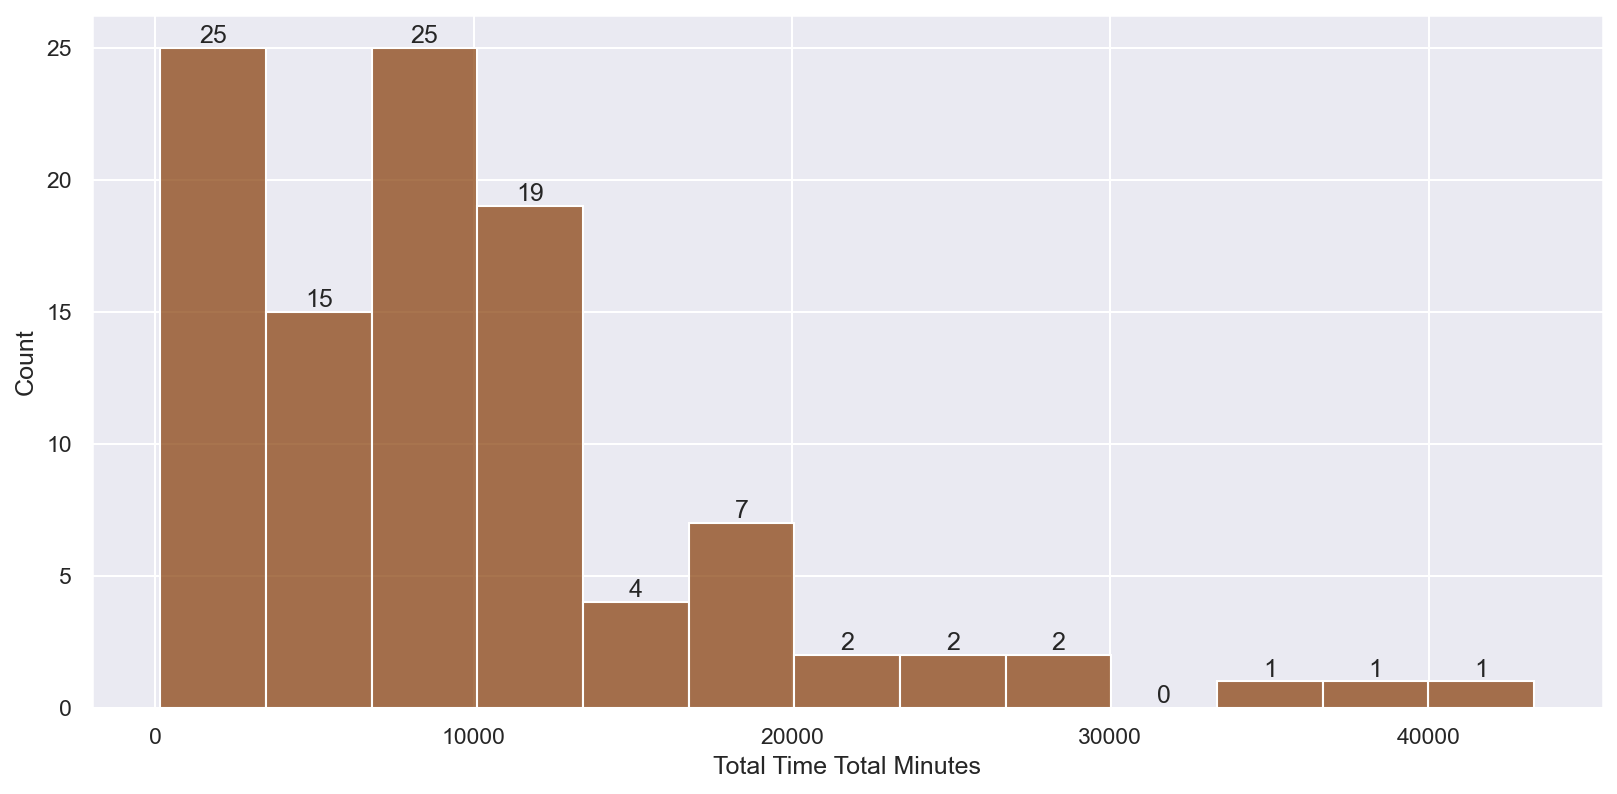

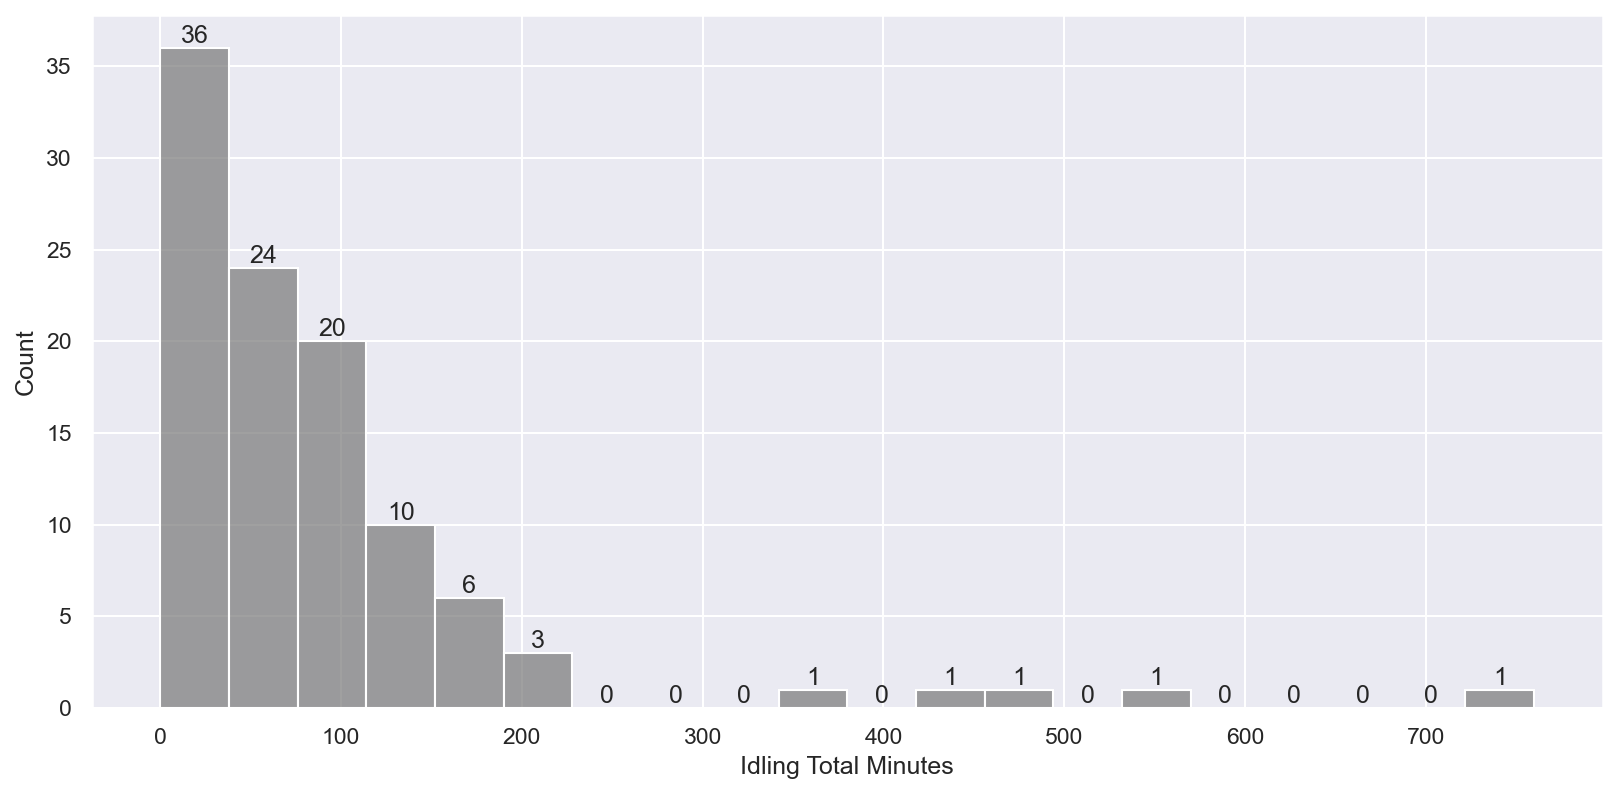

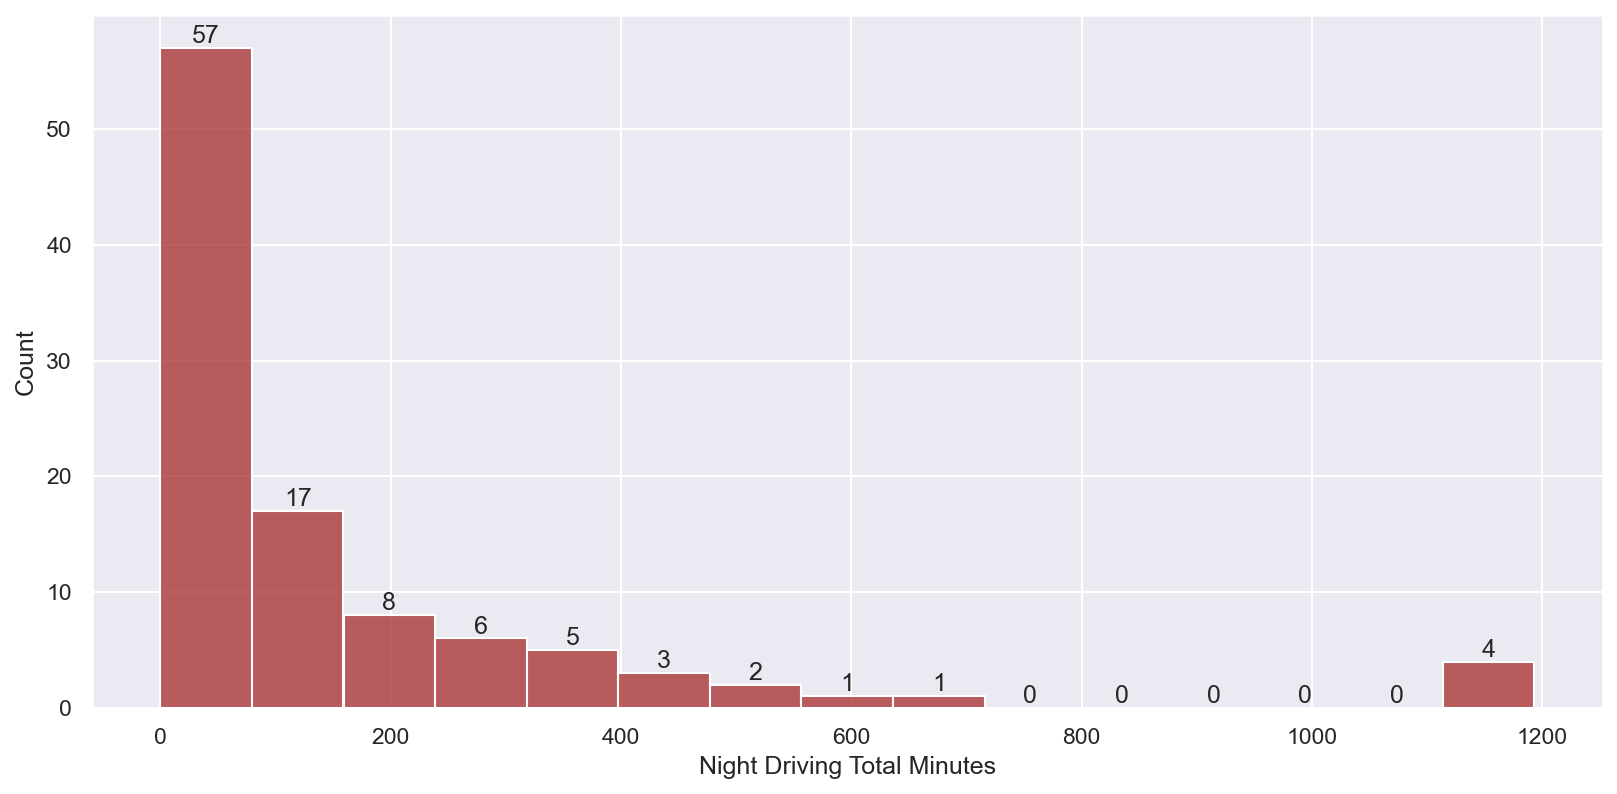

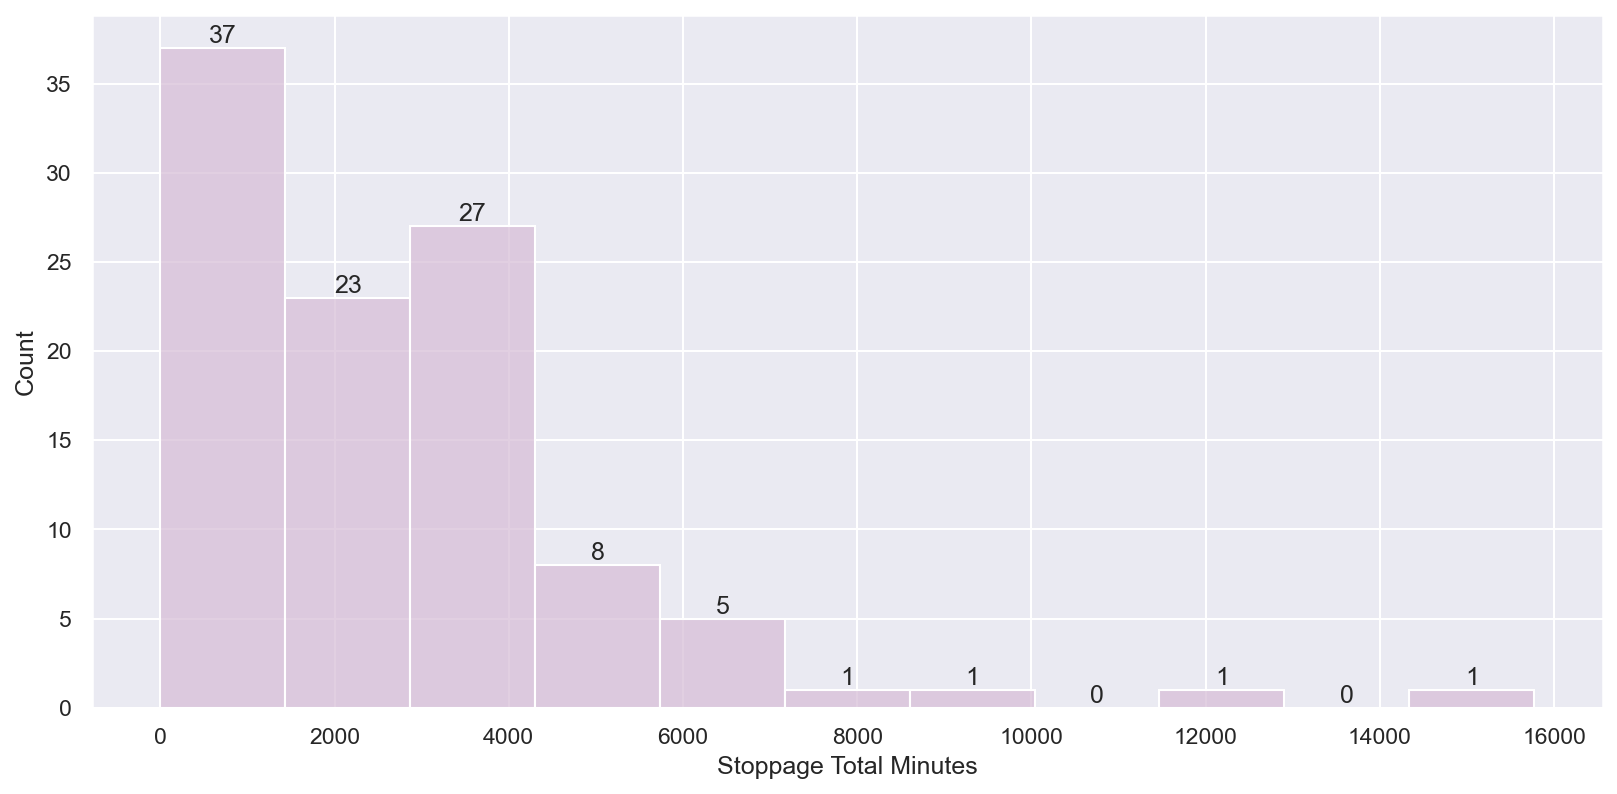

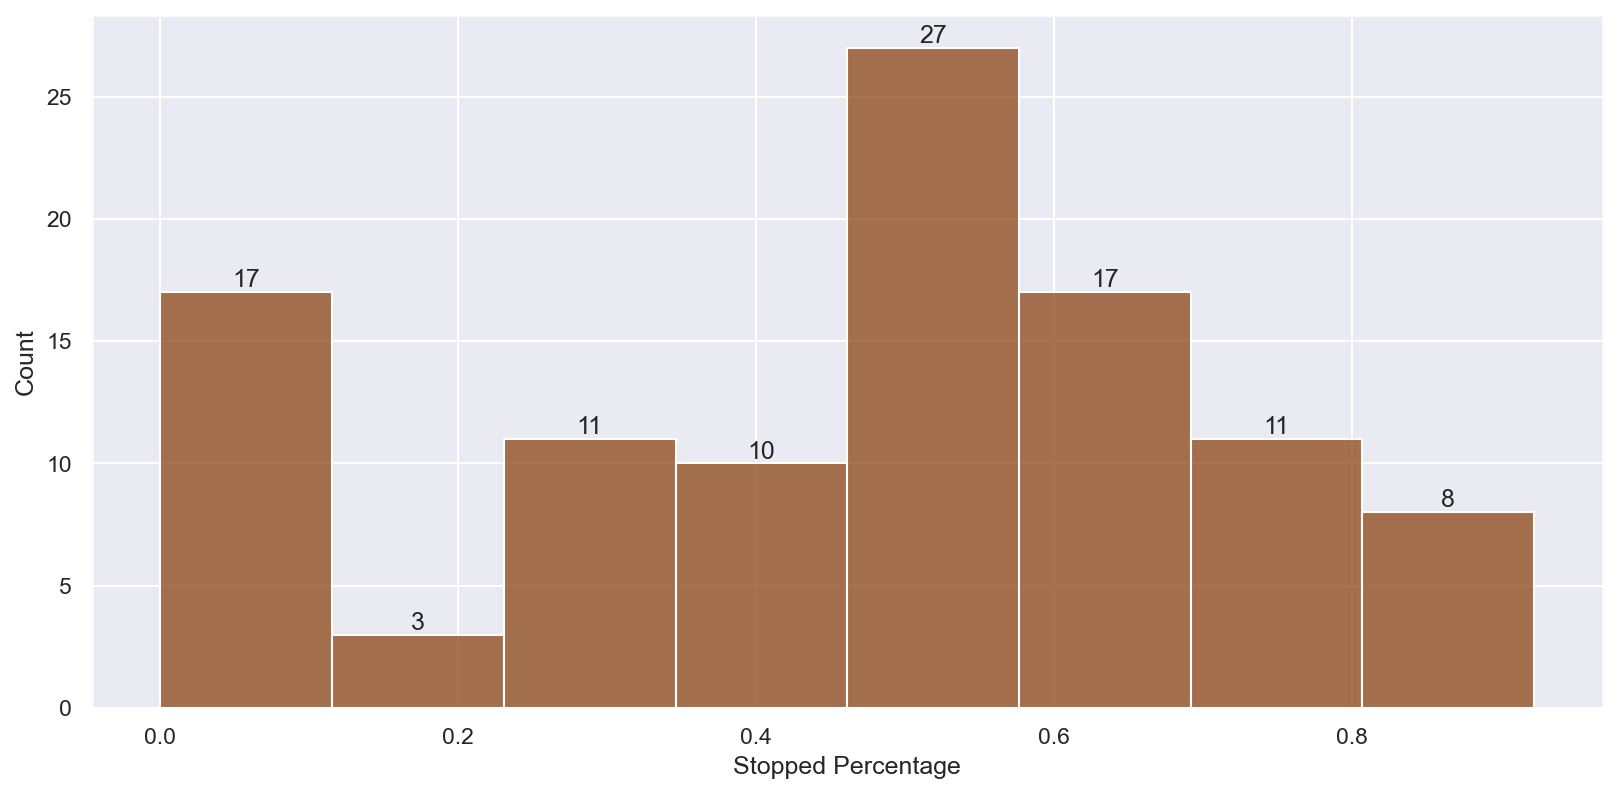

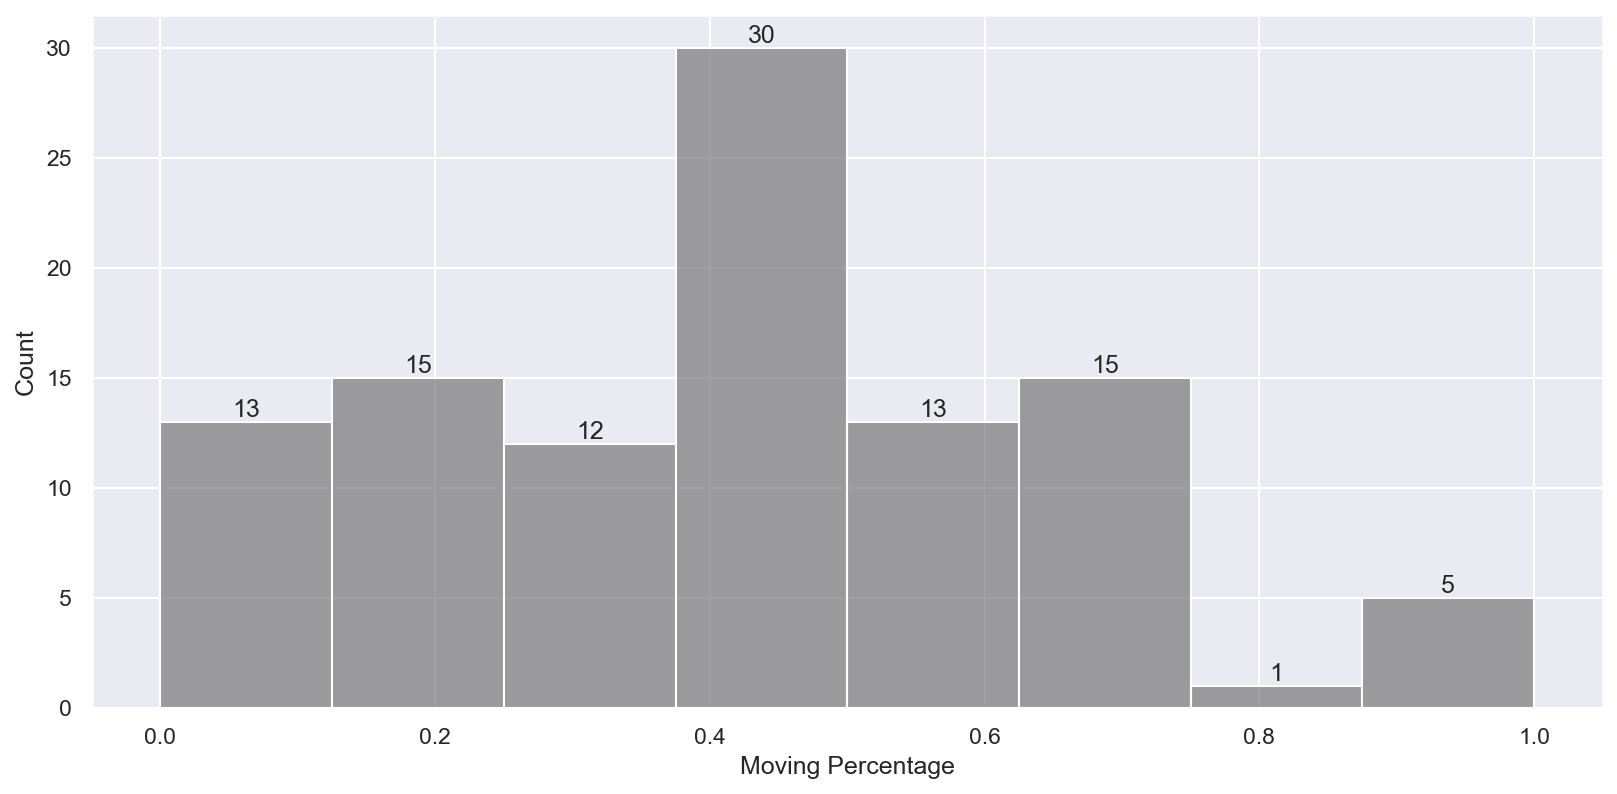

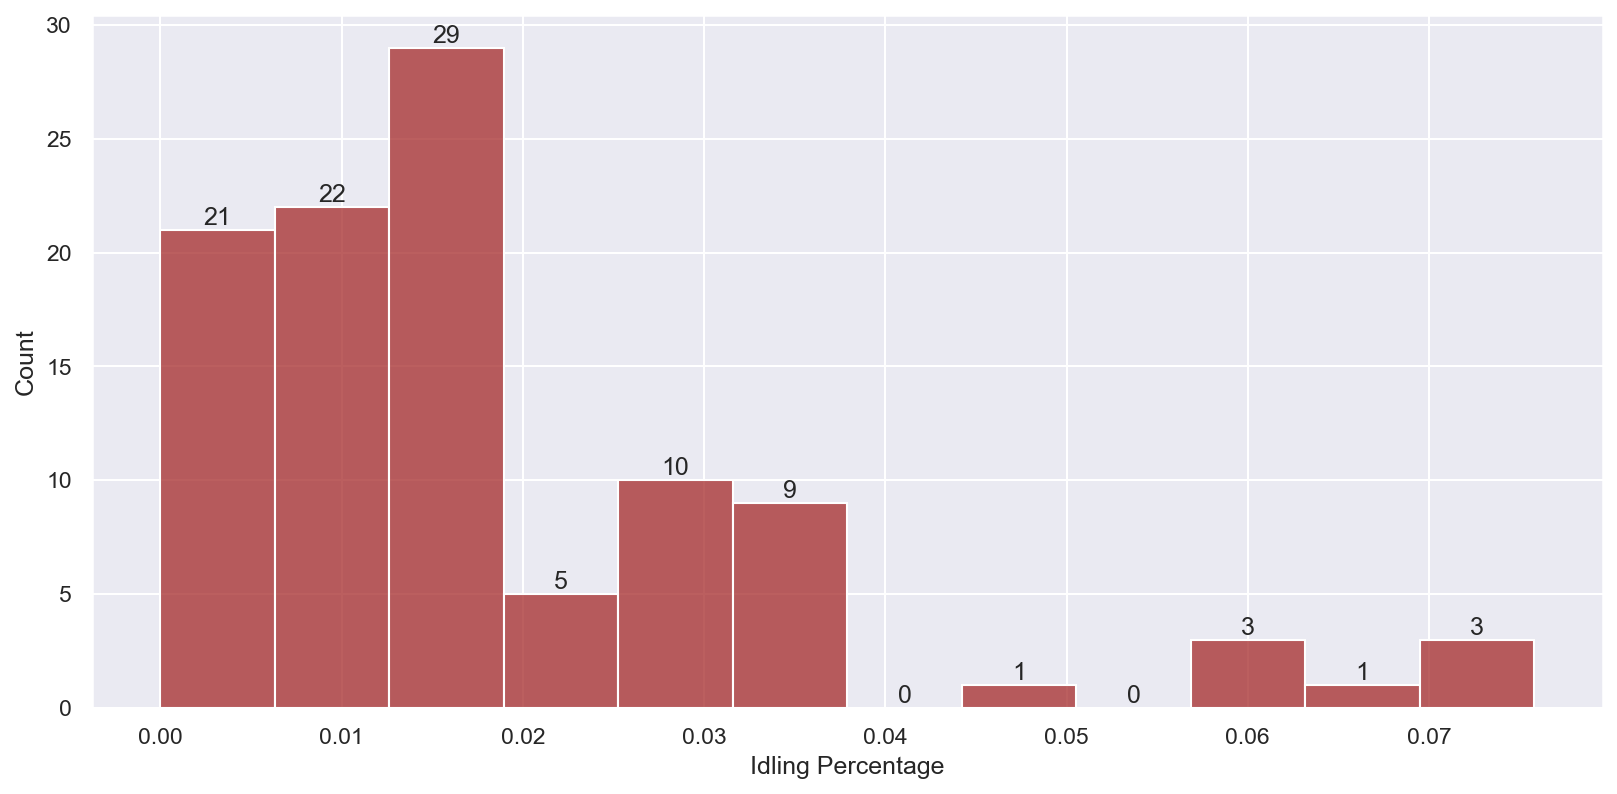

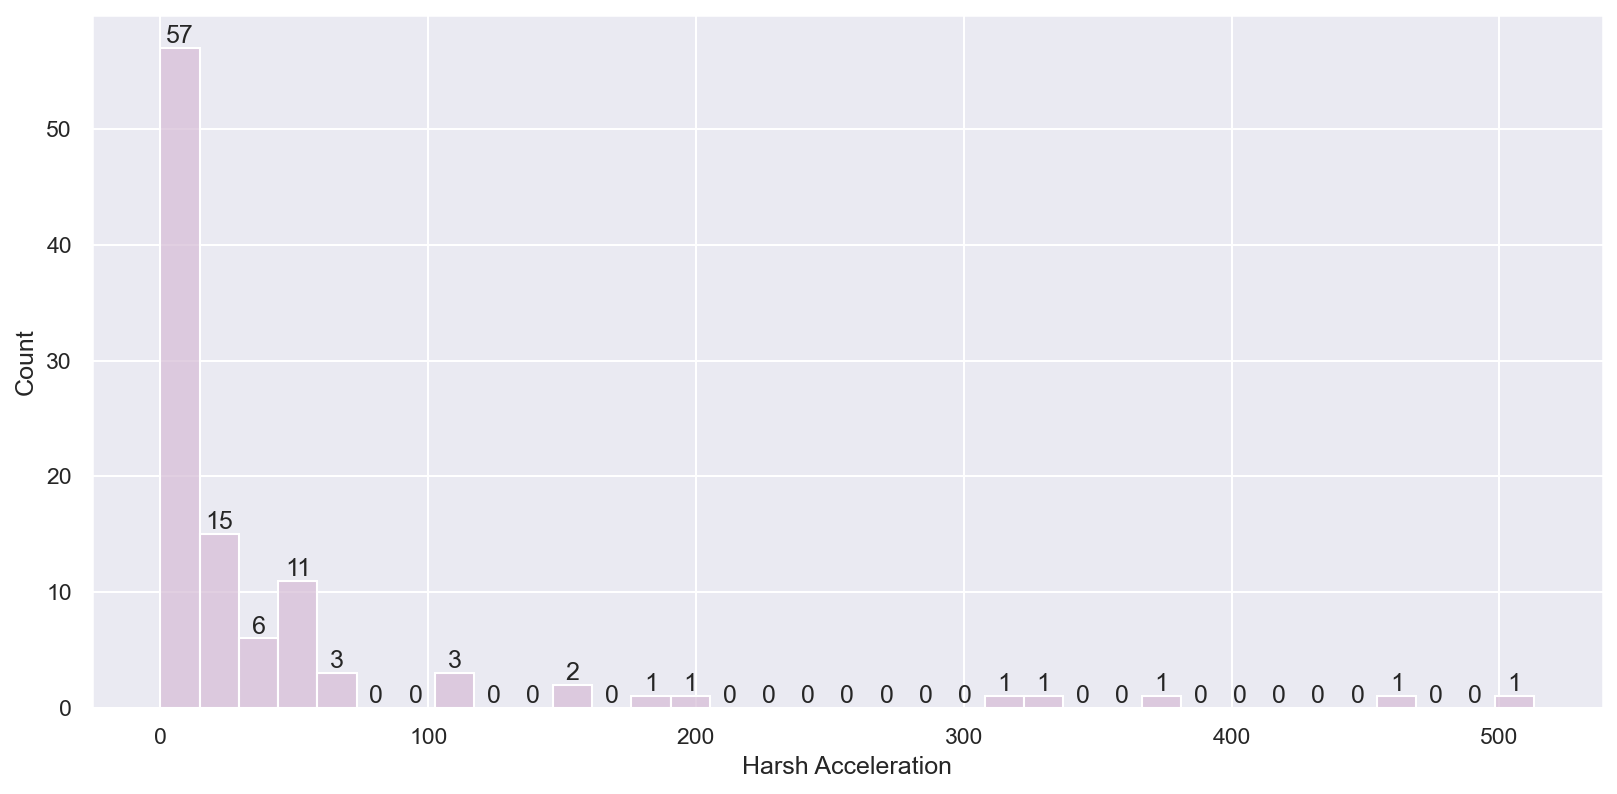

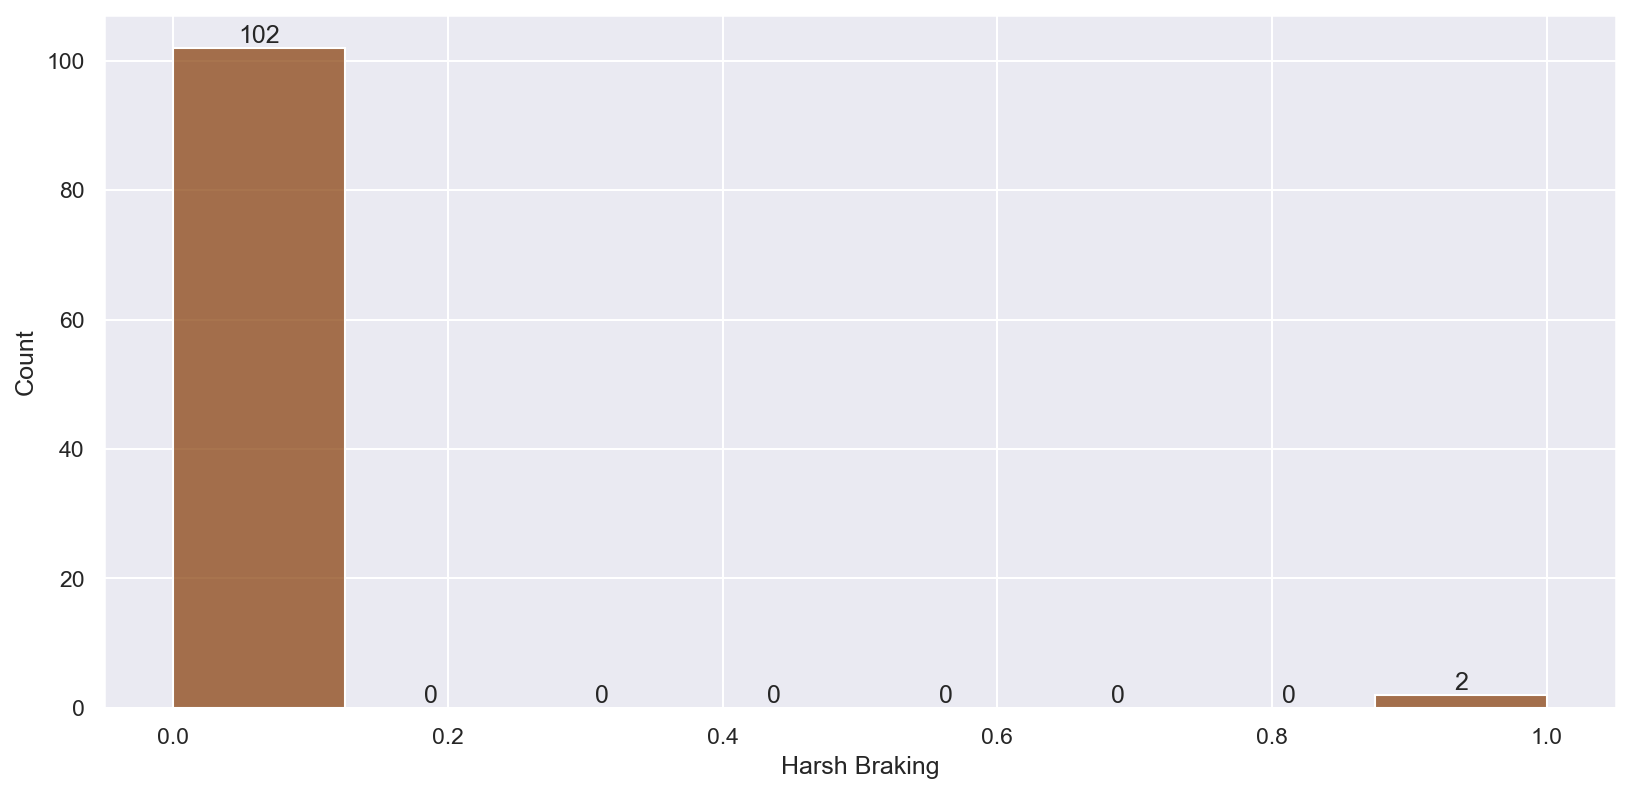

In [86]:
column_set = ['Total Travelled (Kms)', 'Fuel Efficiency', 'Fuel Consumed', 'Total Time Total Minutes', 'Idling Total Minutes',
               'Night Driving Total Minutes', 'Stoppage Total Minutes', 'Stopped Percentage', 'Moving Percentage',
               'Idling Percentage', 'Harsh Acceleration', 'Harsh Braking']
color_set = ['grey','brown','Thistle', 'SaddleBrown', 'grey','brown','Thistle', 'SaddleBrown', 'grey','brown', 'Thistle', 'SaddleBrown']
for colors,col in zip(color_set,column_set):
    plt.figure(figsize=(13,6), dpi=150)
    chart1=sns.histplot(data=df, x=col, color=colors)
    chart1.bar_label(chart1.containers[0],size=12)
    plt.show()

## 3.1.4 Logrithmic Transformation of Continuous/Numerical Columns

In [87]:
df.shape

(104, 15)

In [88]:
df_log = df

In [89]:
column_transform = ['Total Travelled (Kms)', 'Fuel Efficiency',  'Fuel Consumed', 'Total Time Total Minutes', 'Idling Total Minutes',
                    'Night Driving Total Minutes', 'Stoppage Total Minutes', 'Stopped Percentage', 'Moving Percentage',
                    'Idling Percentage', 'Harsh Acceleration', 'Harsh Braking']

In [90]:
for column in column_transform:
    df['Log ' + column] = np.log(df[column] + 1)

In [91]:
# df_log_drop_columns = ['Total Travelled (Kms)', 'Fuel Efficiency', 'Fuel Consumed', 'Total Time Total Minutes', 'Idling Total Minutes',
#                'Night Driving Total Minutes', 'Stoppage Total Minutes', 'Stopped Percentage', 'Moving Percentage',
#                'Idling Percentage', 'Harsh Acceleration', 'Harsh Braking']
# df.drop(columns=df_log_drop_columns, inplace=True)

## 3.1.5 Frequency Distribution for the Log Transform of Continuous/Numerical Columns

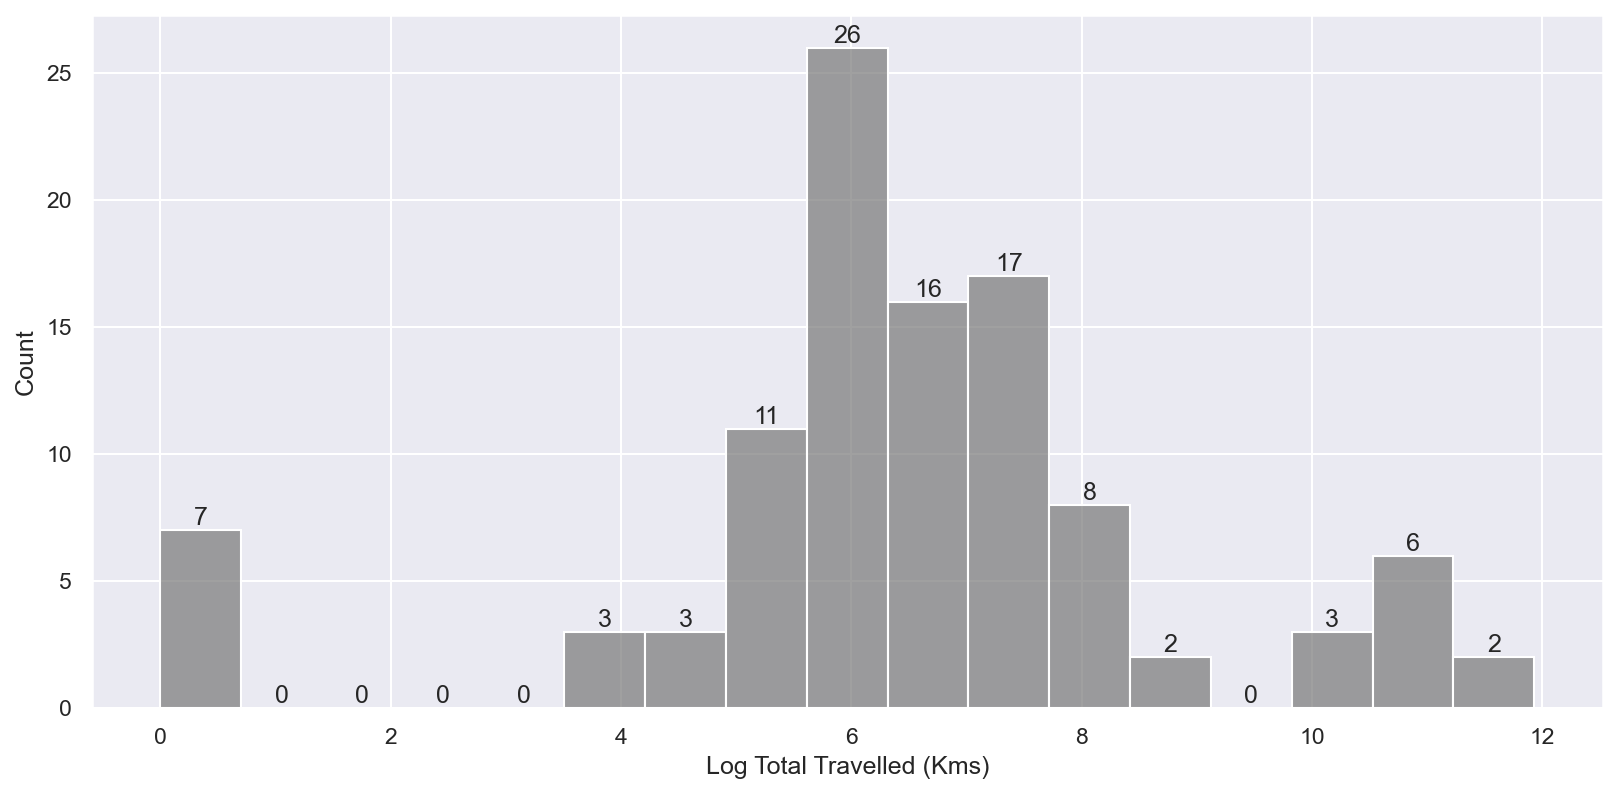

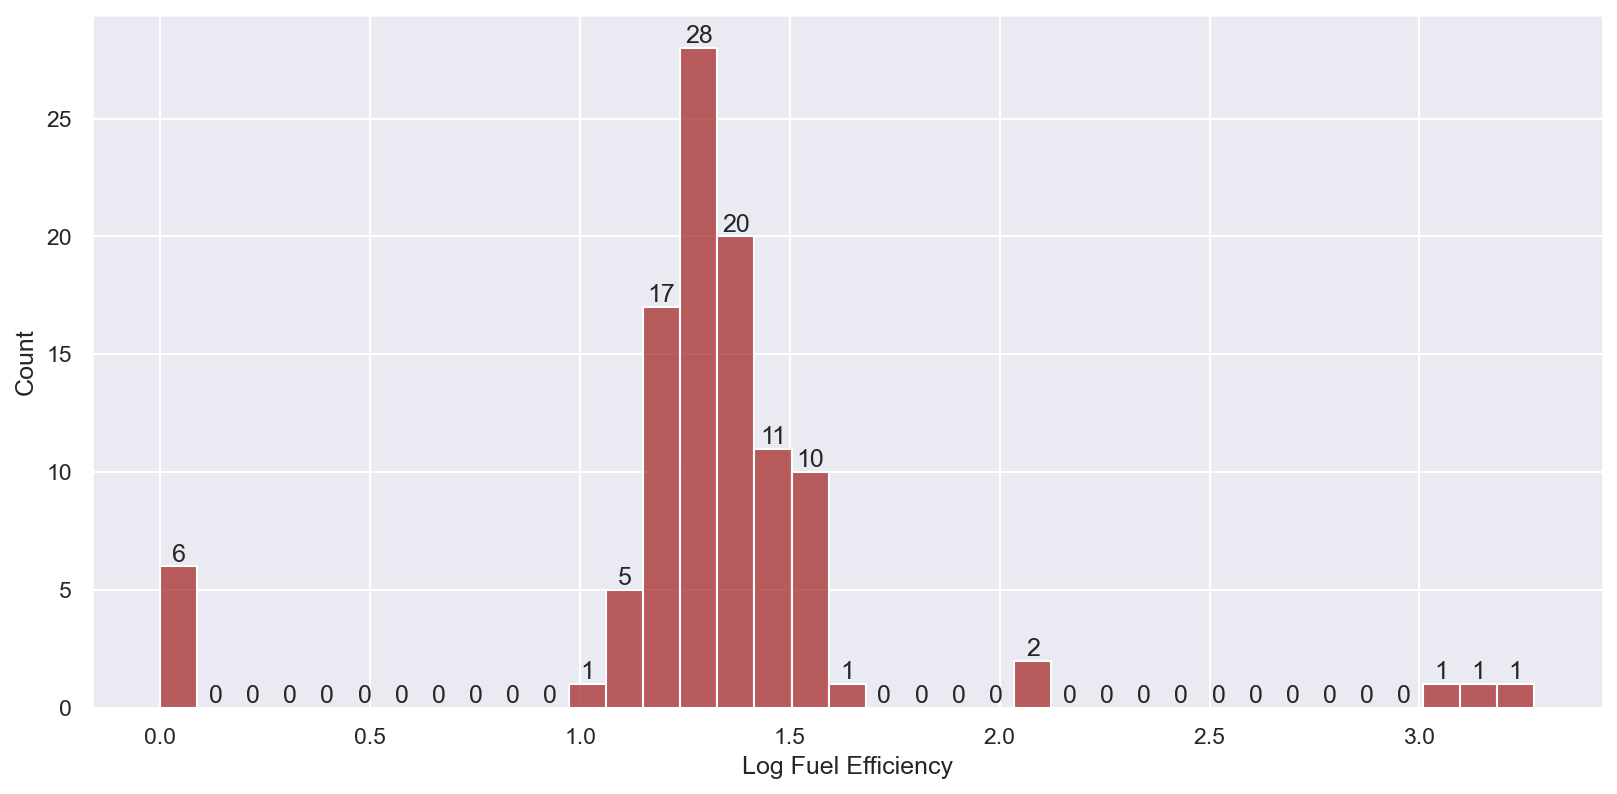

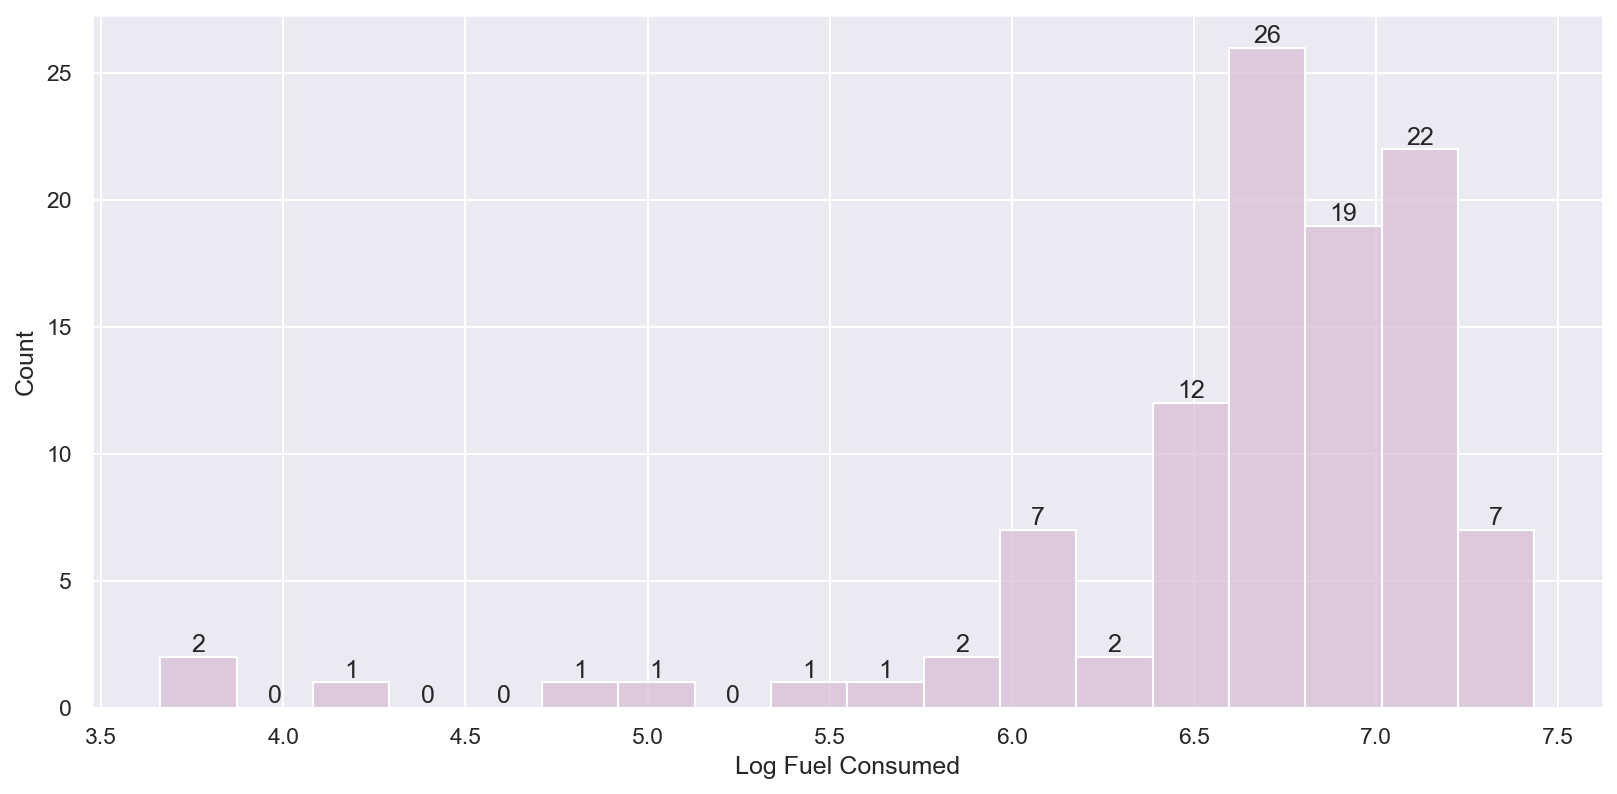

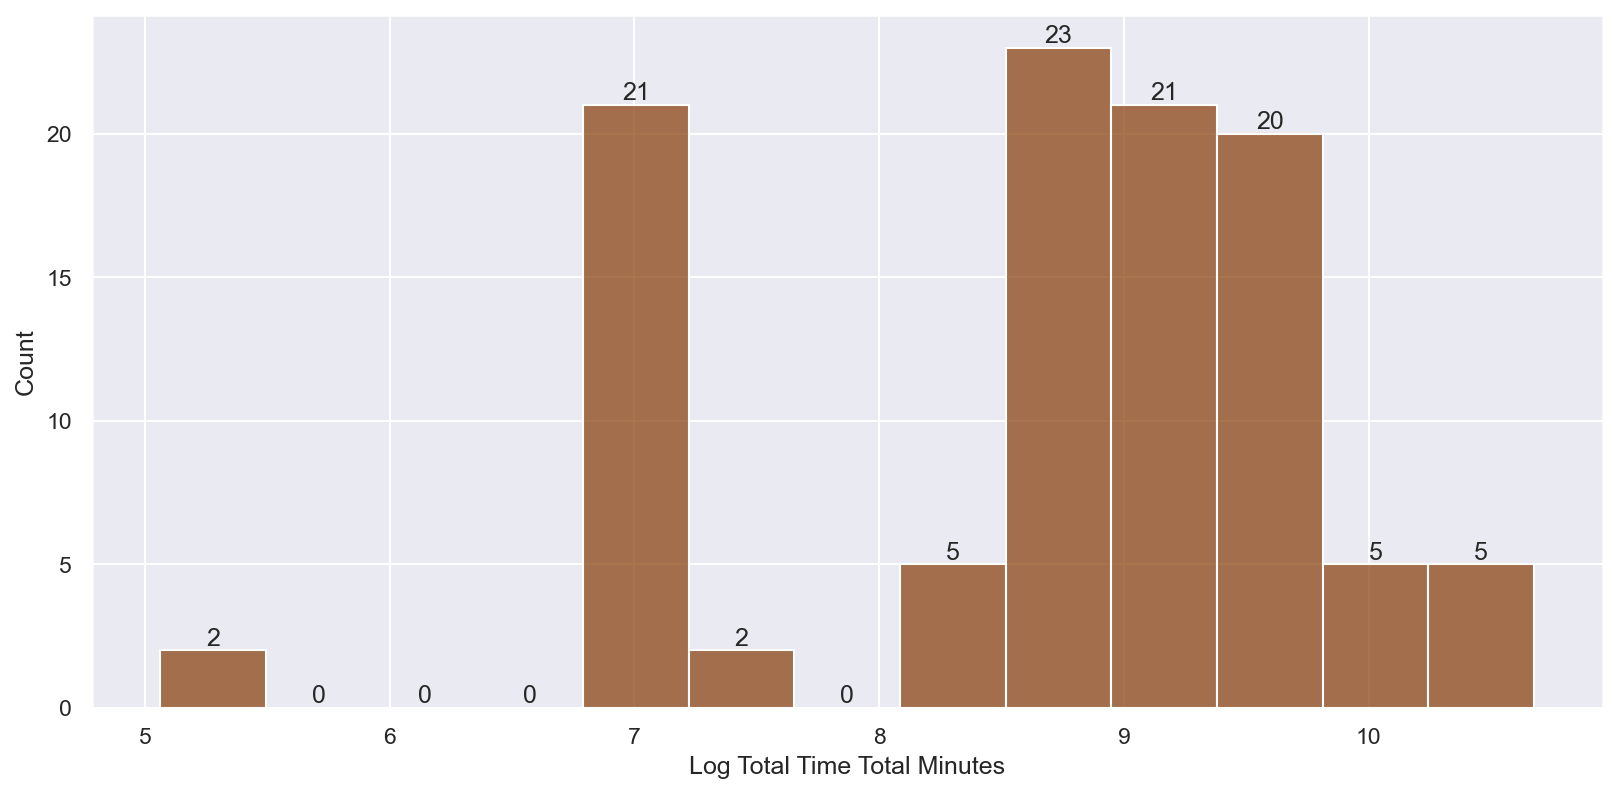

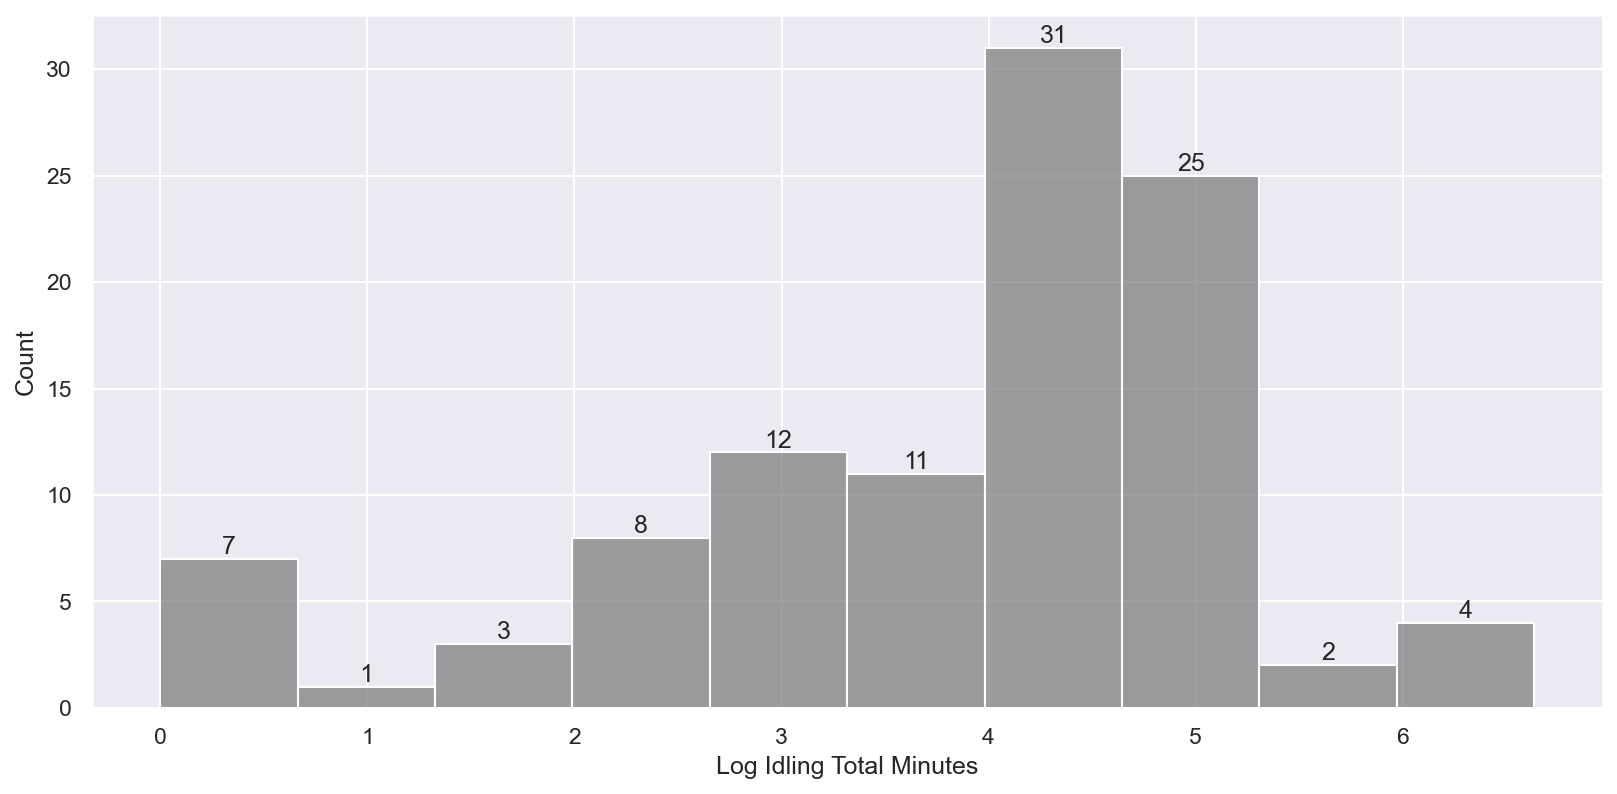

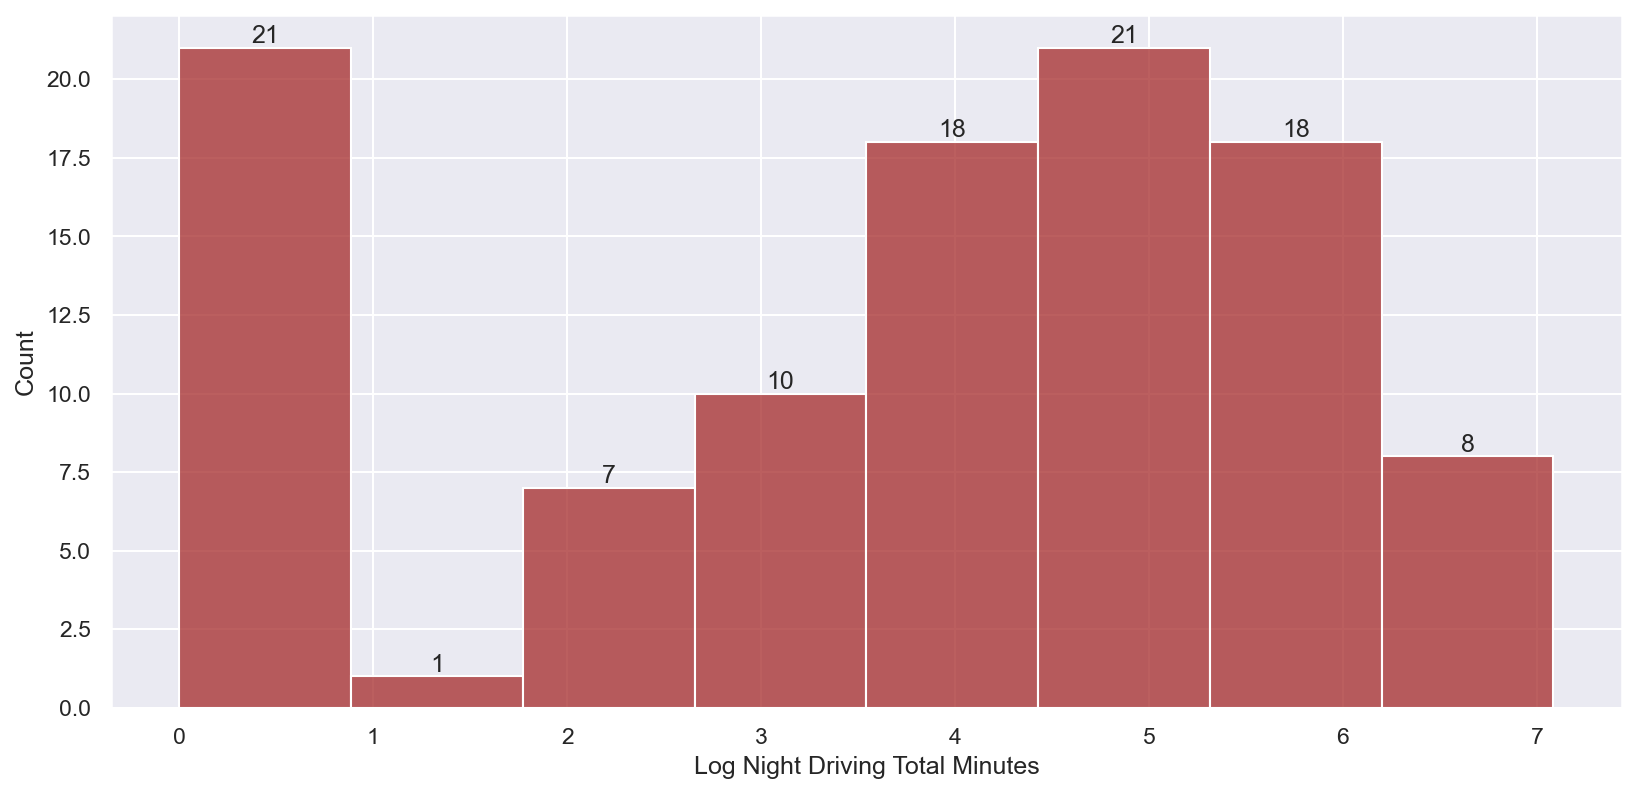

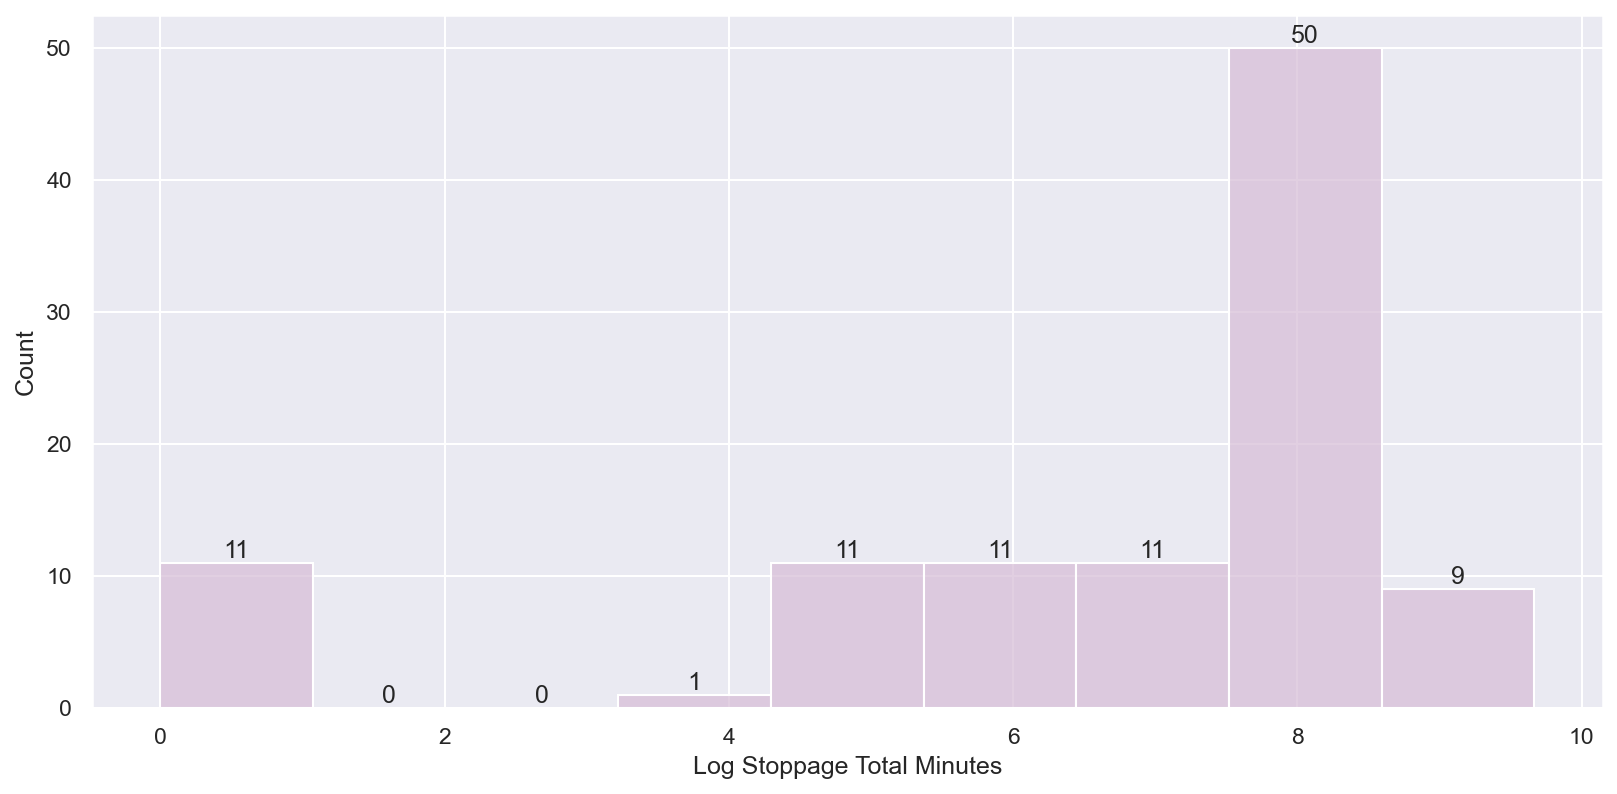

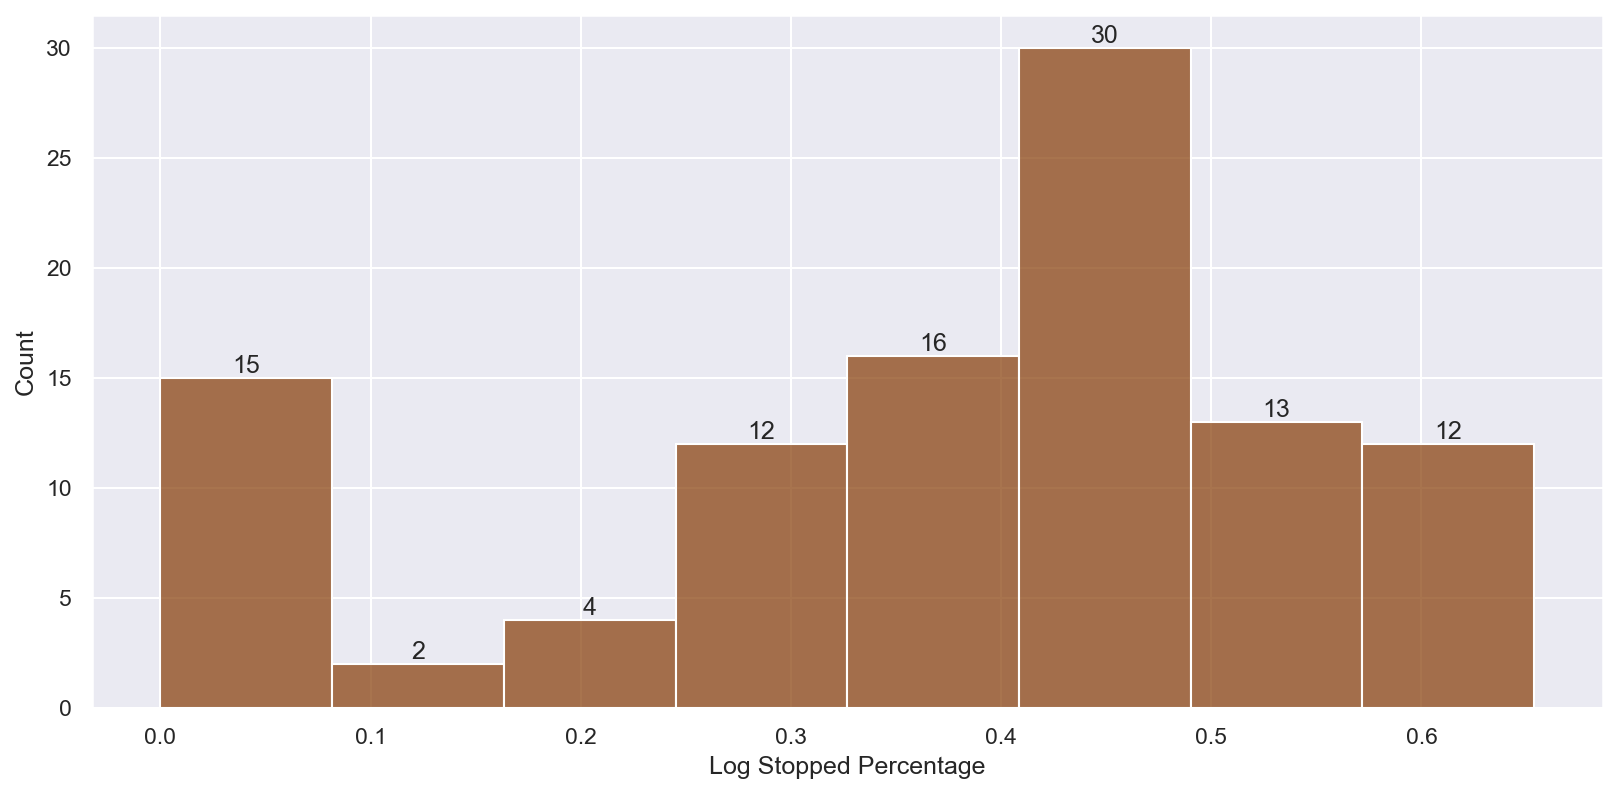

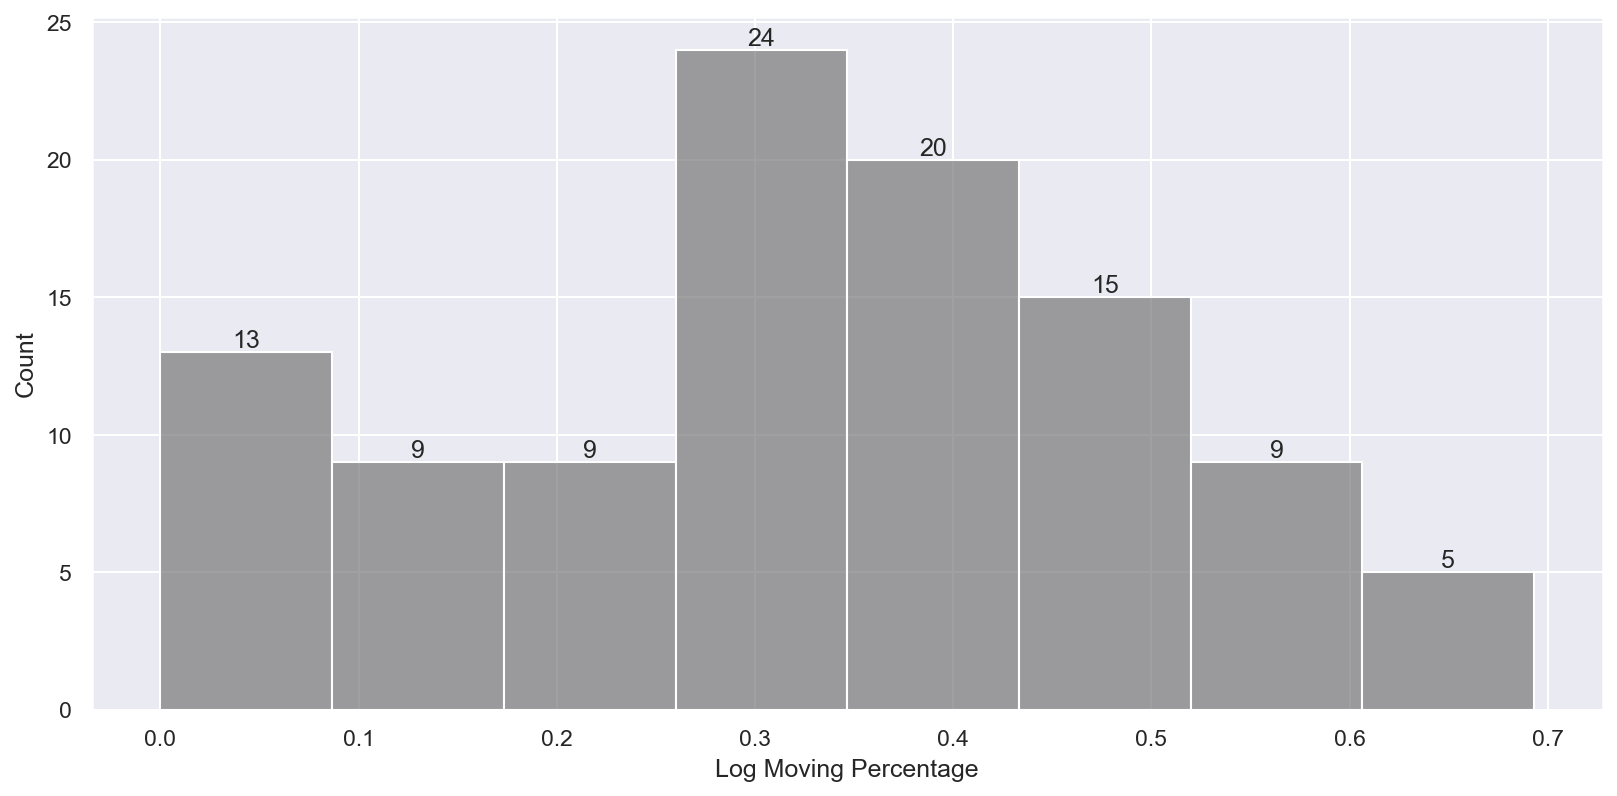

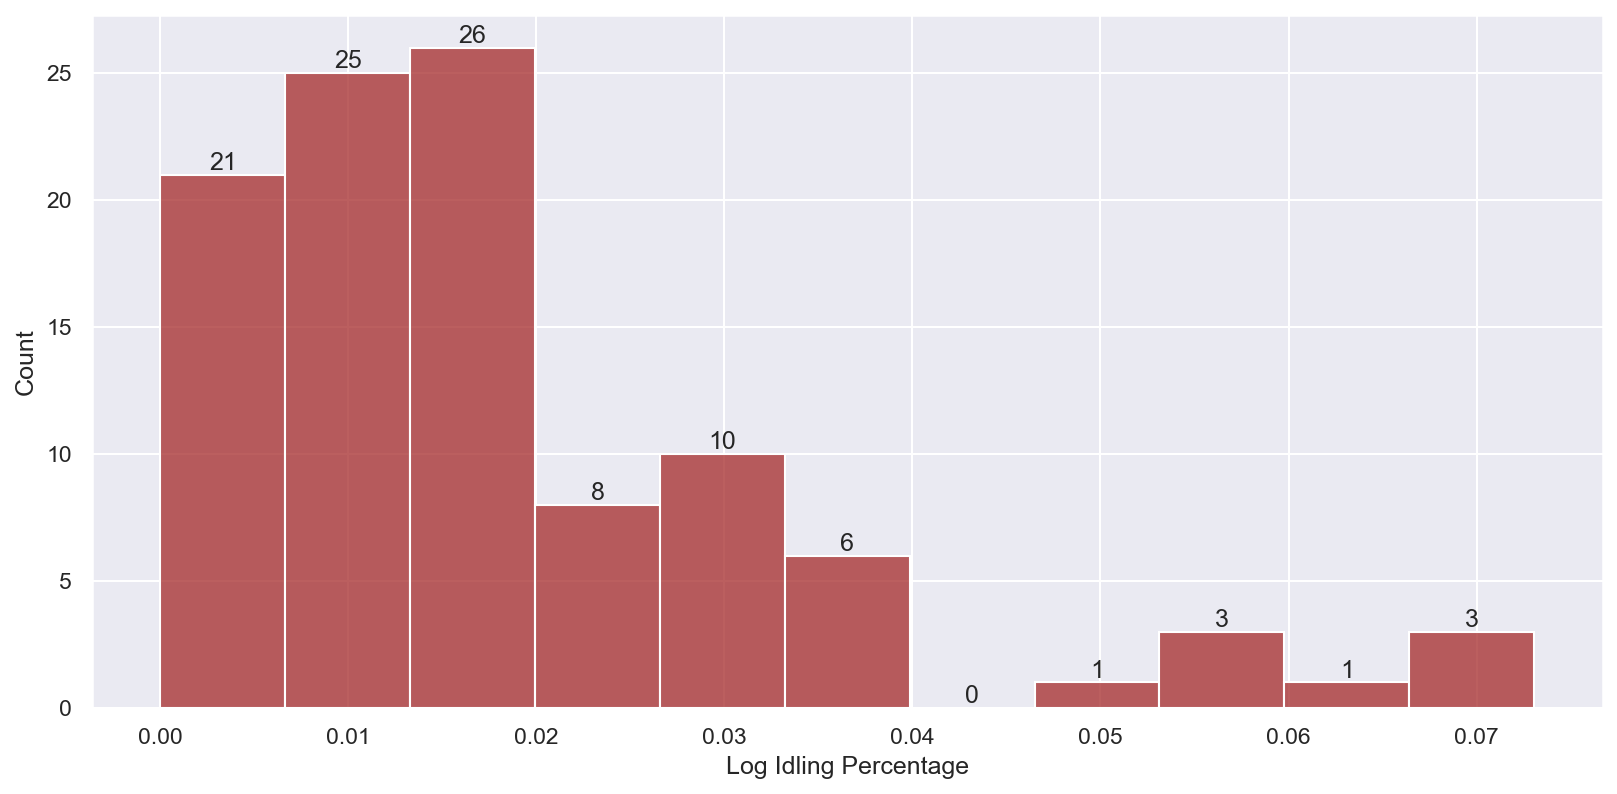

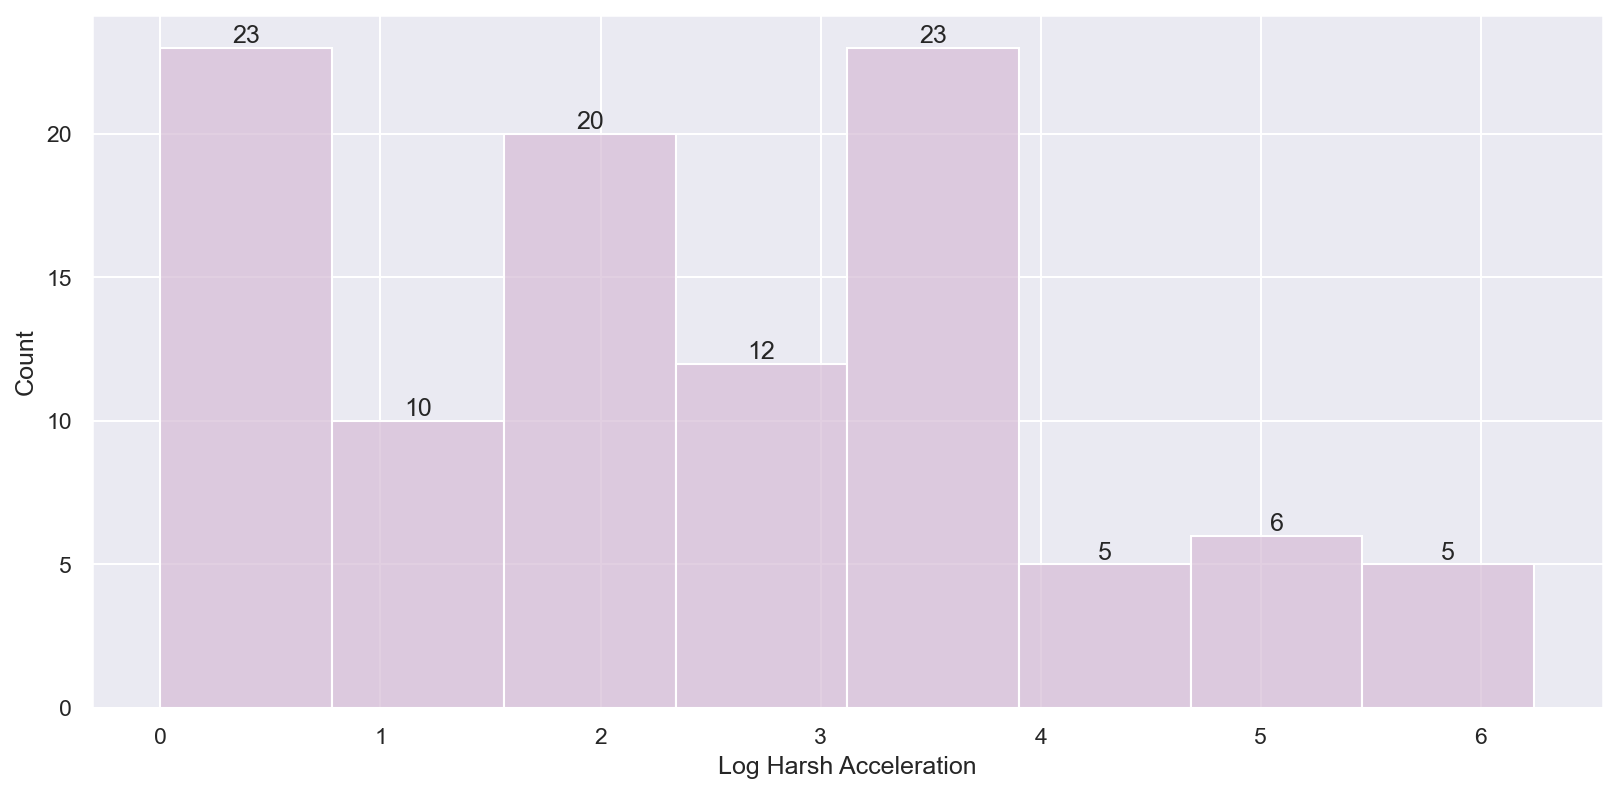

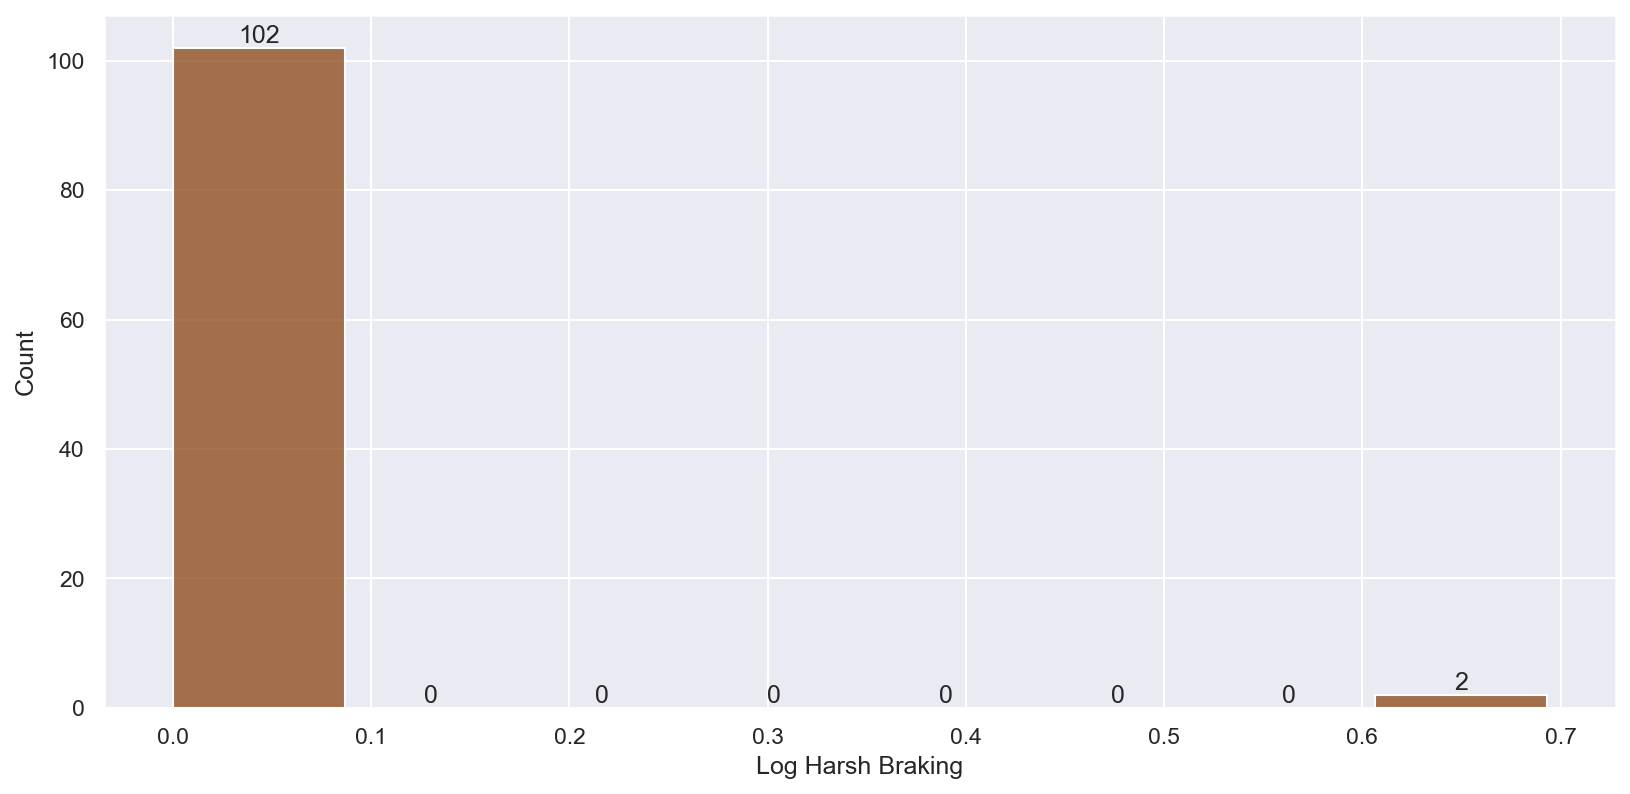

In [92]:
column_transform_new = ['Log Total Travelled (Kms)', 'Log Fuel Efficiency',  'Log Fuel Consumed', 'Log Total Time Total Minutes', 'Log Idling Total Minutes',
                        'Log Night Driving Total Minutes', 'Log Stoppage Total Minutes', 'Log Stopped Percentage', 'Log Moving Percentage',
                        'Log Idling Percentage', 'Log Harsh Acceleration', 'Log Harsh Braking']
color_set_new = ['grey','brown','Thistle', 'SaddleBrown', 'grey', 'brown', 'Thistle', 'SaddleBrown', 'grey','brown', 'Thistle', 'SaddleBrown']
for colors,col in zip(color_set_new,column_transform_new):
    plt.figure(figsize=(13,6), dpi=150)
    chart1=sns.histplot(data=df, x=col, color=colors)
    chart1.bar_label(chart1.containers[0],size=12)
    plt.show()

In [93]:
df.head()

Odometer  Total Travelled (Kms) Fuel Type  Fuel Efficiency  \
0  109648.0                    0.0    Diesel              2.9   
1  144388.0                 5247.0    Diesel              2.8   
2   40187.0                  569.0    Diesel              2.5   
3   46898.0                 4363.7    Diesel              3.1   
4   48984.0                  729.7    Diesel              2.4   

   Harsh Acceleration  Harsh Braking Model Name  Fuel Consumed  \
0                 9.0            0.0   LPT 4225         1144.3   
1                 7.0            0.0   LPT 4225         1433.1   
2                34.0            0.0   LPT 3518          827.0   
3                24.0            0.0     4225TC         1693.3   
4                13.0            0.0     4225TC         1087.5   

   Idling Total Minutes  Night Driving Total Minutes  ...  Log Fuel Consumed  \
0                   474                         1120  ...           7.043422   
1                   760                         1120  ...           7.268293   
2                    41                            8  ...           6.719013   
3                   379                          228  ...           7.435025   
4                    81                         1193  ...           6.992556   

   Log Total Time Total Minutes  Log Idling Total Minutes  \
0                     10.306583                  6.163315   
1                     10.524548                  6.634633   
2                      9.051696                  3.737670   
3                     10.102010                  5.940171   
4                      9.334503                  4.406719   

   Log Night Driving Total Minutes  Log Stoppage Total Minutes  \
0                         7.021976                    8.800415   
1                         7.021976                    9.666118   
2                         2.197225                    7.657755   
3                         5.433722                    9.122165   
4                         7.085064                    8.343554   

   Log Stopped Percentage  Log Moving Percentage  Log Idling Percentage  \
0                0.000000               0.000000               0.000000   
1                0.397635               0.389878               0.034305   
2                0.465556               0.323893               0.024205   
3                0.564689               0.204165               0.014494   
4                0.089749               0.629568               0.028879   

   Log Harsh Acceleration  Log Harsh Braking  
0                2.302585                0.0  
1                2.079442                0.0  
2                3.555348                0.0  
3                3.218876                0.0  
4                2.639057                0.0  

[5 rows x 27 columns]

In [94]:
print(df.shape)

(104, 27)


# 3.2 Bivariate Analysis

## 3.2.1 Comparison Between all columns

In [95]:
# plt.figure(figsize=(13,6), dpi=150)
# sns.pairplot(df, hue='Fuel Type',diag_kind='hist')

In [96]:
df.columns

Index(['Odometer', 'Total Travelled (Kms)', 'Fuel Type', 'Fuel Efficiency',
       'Harsh Acceleration', 'Harsh Braking', 'Model Name', 'Fuel Consumed',
       'Idling Total Minutes', 'Night Driving Total Minutes',
       'Total Time Total Minutes', 'Stoppage Total Minutes',
       'Stopped Percentage', 'Moving Percentage', 'Idling Percentage',
       'Log Total Travelled (Kms)', 'Log Fuel Efficiency', 'Log Fuel Consumed',
       'Log Total Time Total Minutes', 'Log Idling Total Minutes',
       'Log Night Driving Total Minutes', 'Log Stoppage Total Minutes',
       'Log Stopped Percentage', 'Log Moving Percentage',
       'Log Idling Percentage', 'Log Harsh Acceleration', 'Log Harsh Braking'],
      dtype='object')

## 3.2.2 Comparison between "Fuel Efficiency" & "Fuel Consumed"

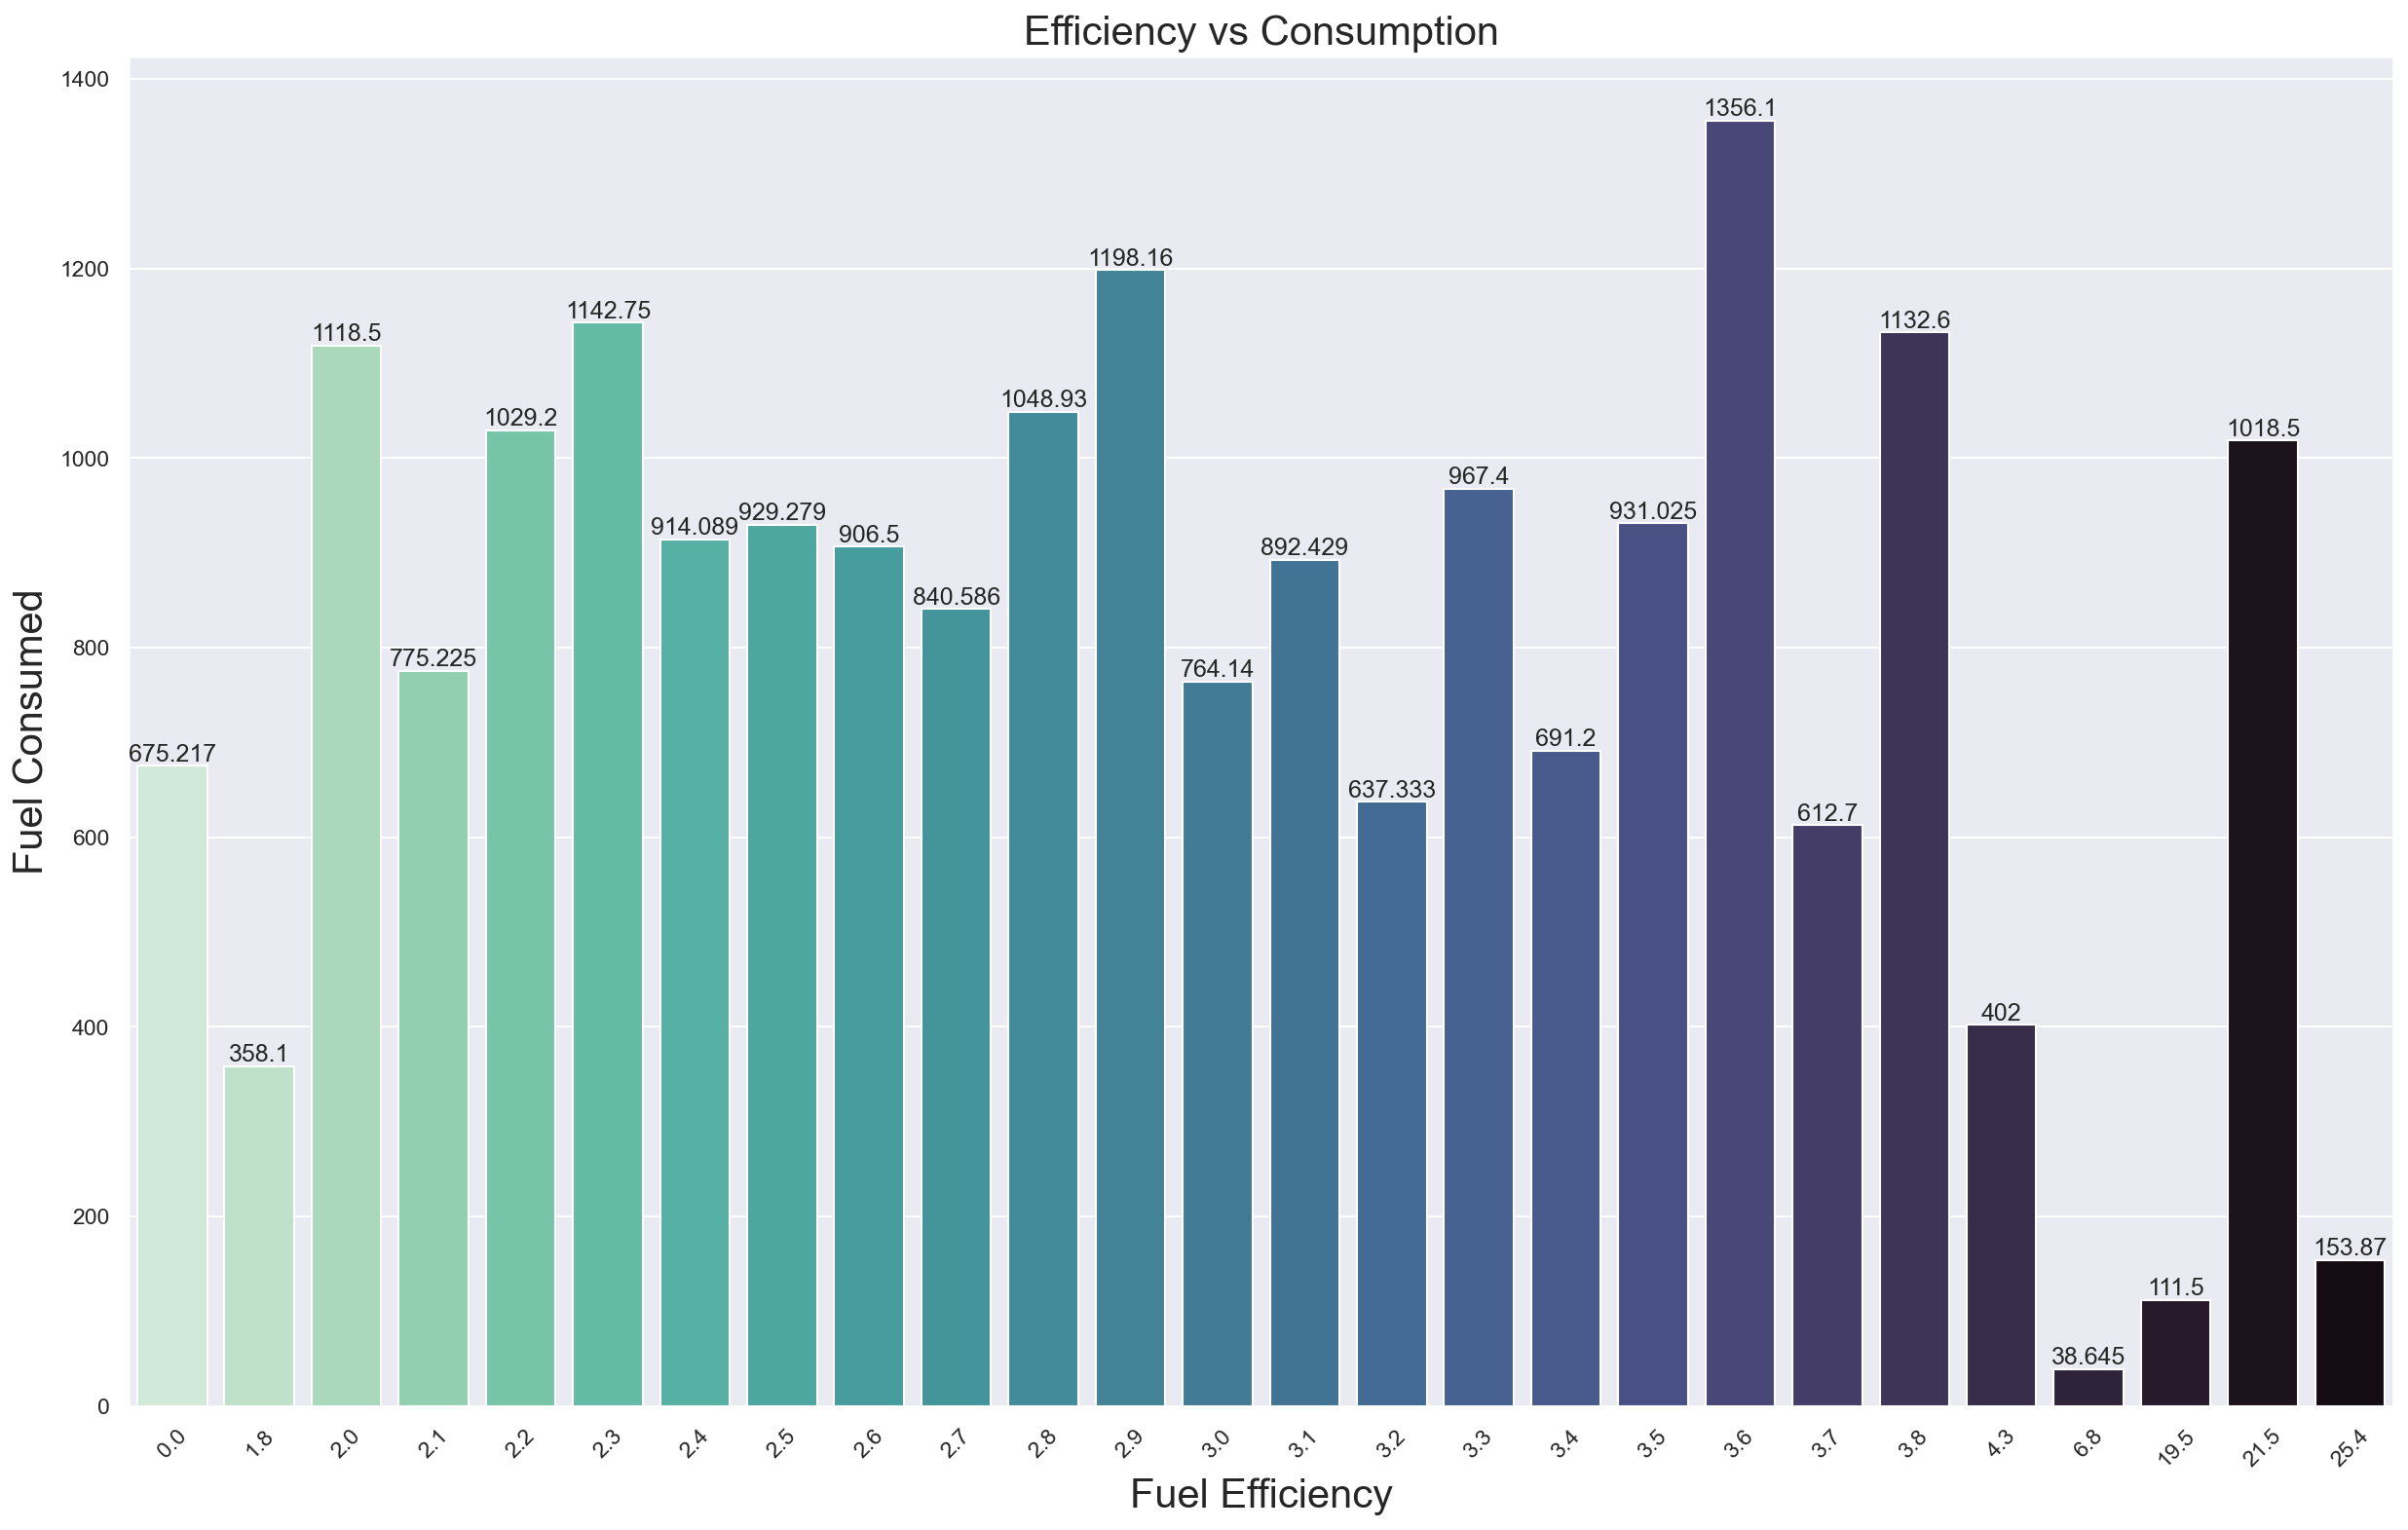

In [97]:
plt.figure(figsize=(20,12), dpi=150)
plt.xticks(rotation=45)
plt.title('Efficiency vs Consumption',size=20)
chart1=sns.barplot( data=df, x="Fuel Efficiency", y="Fuel Consumed",palette='mako_r', ci=None)
plt.xlabel('Fuel Efficiency',size=20)
plt.ylabel('Fuel Consumed',size=20)
chart1.bar_label(chart1.containers[0],size=12)
plt.show()

## 3.2.3 Heatmap showing "Pearson correlation"

<Axes: >

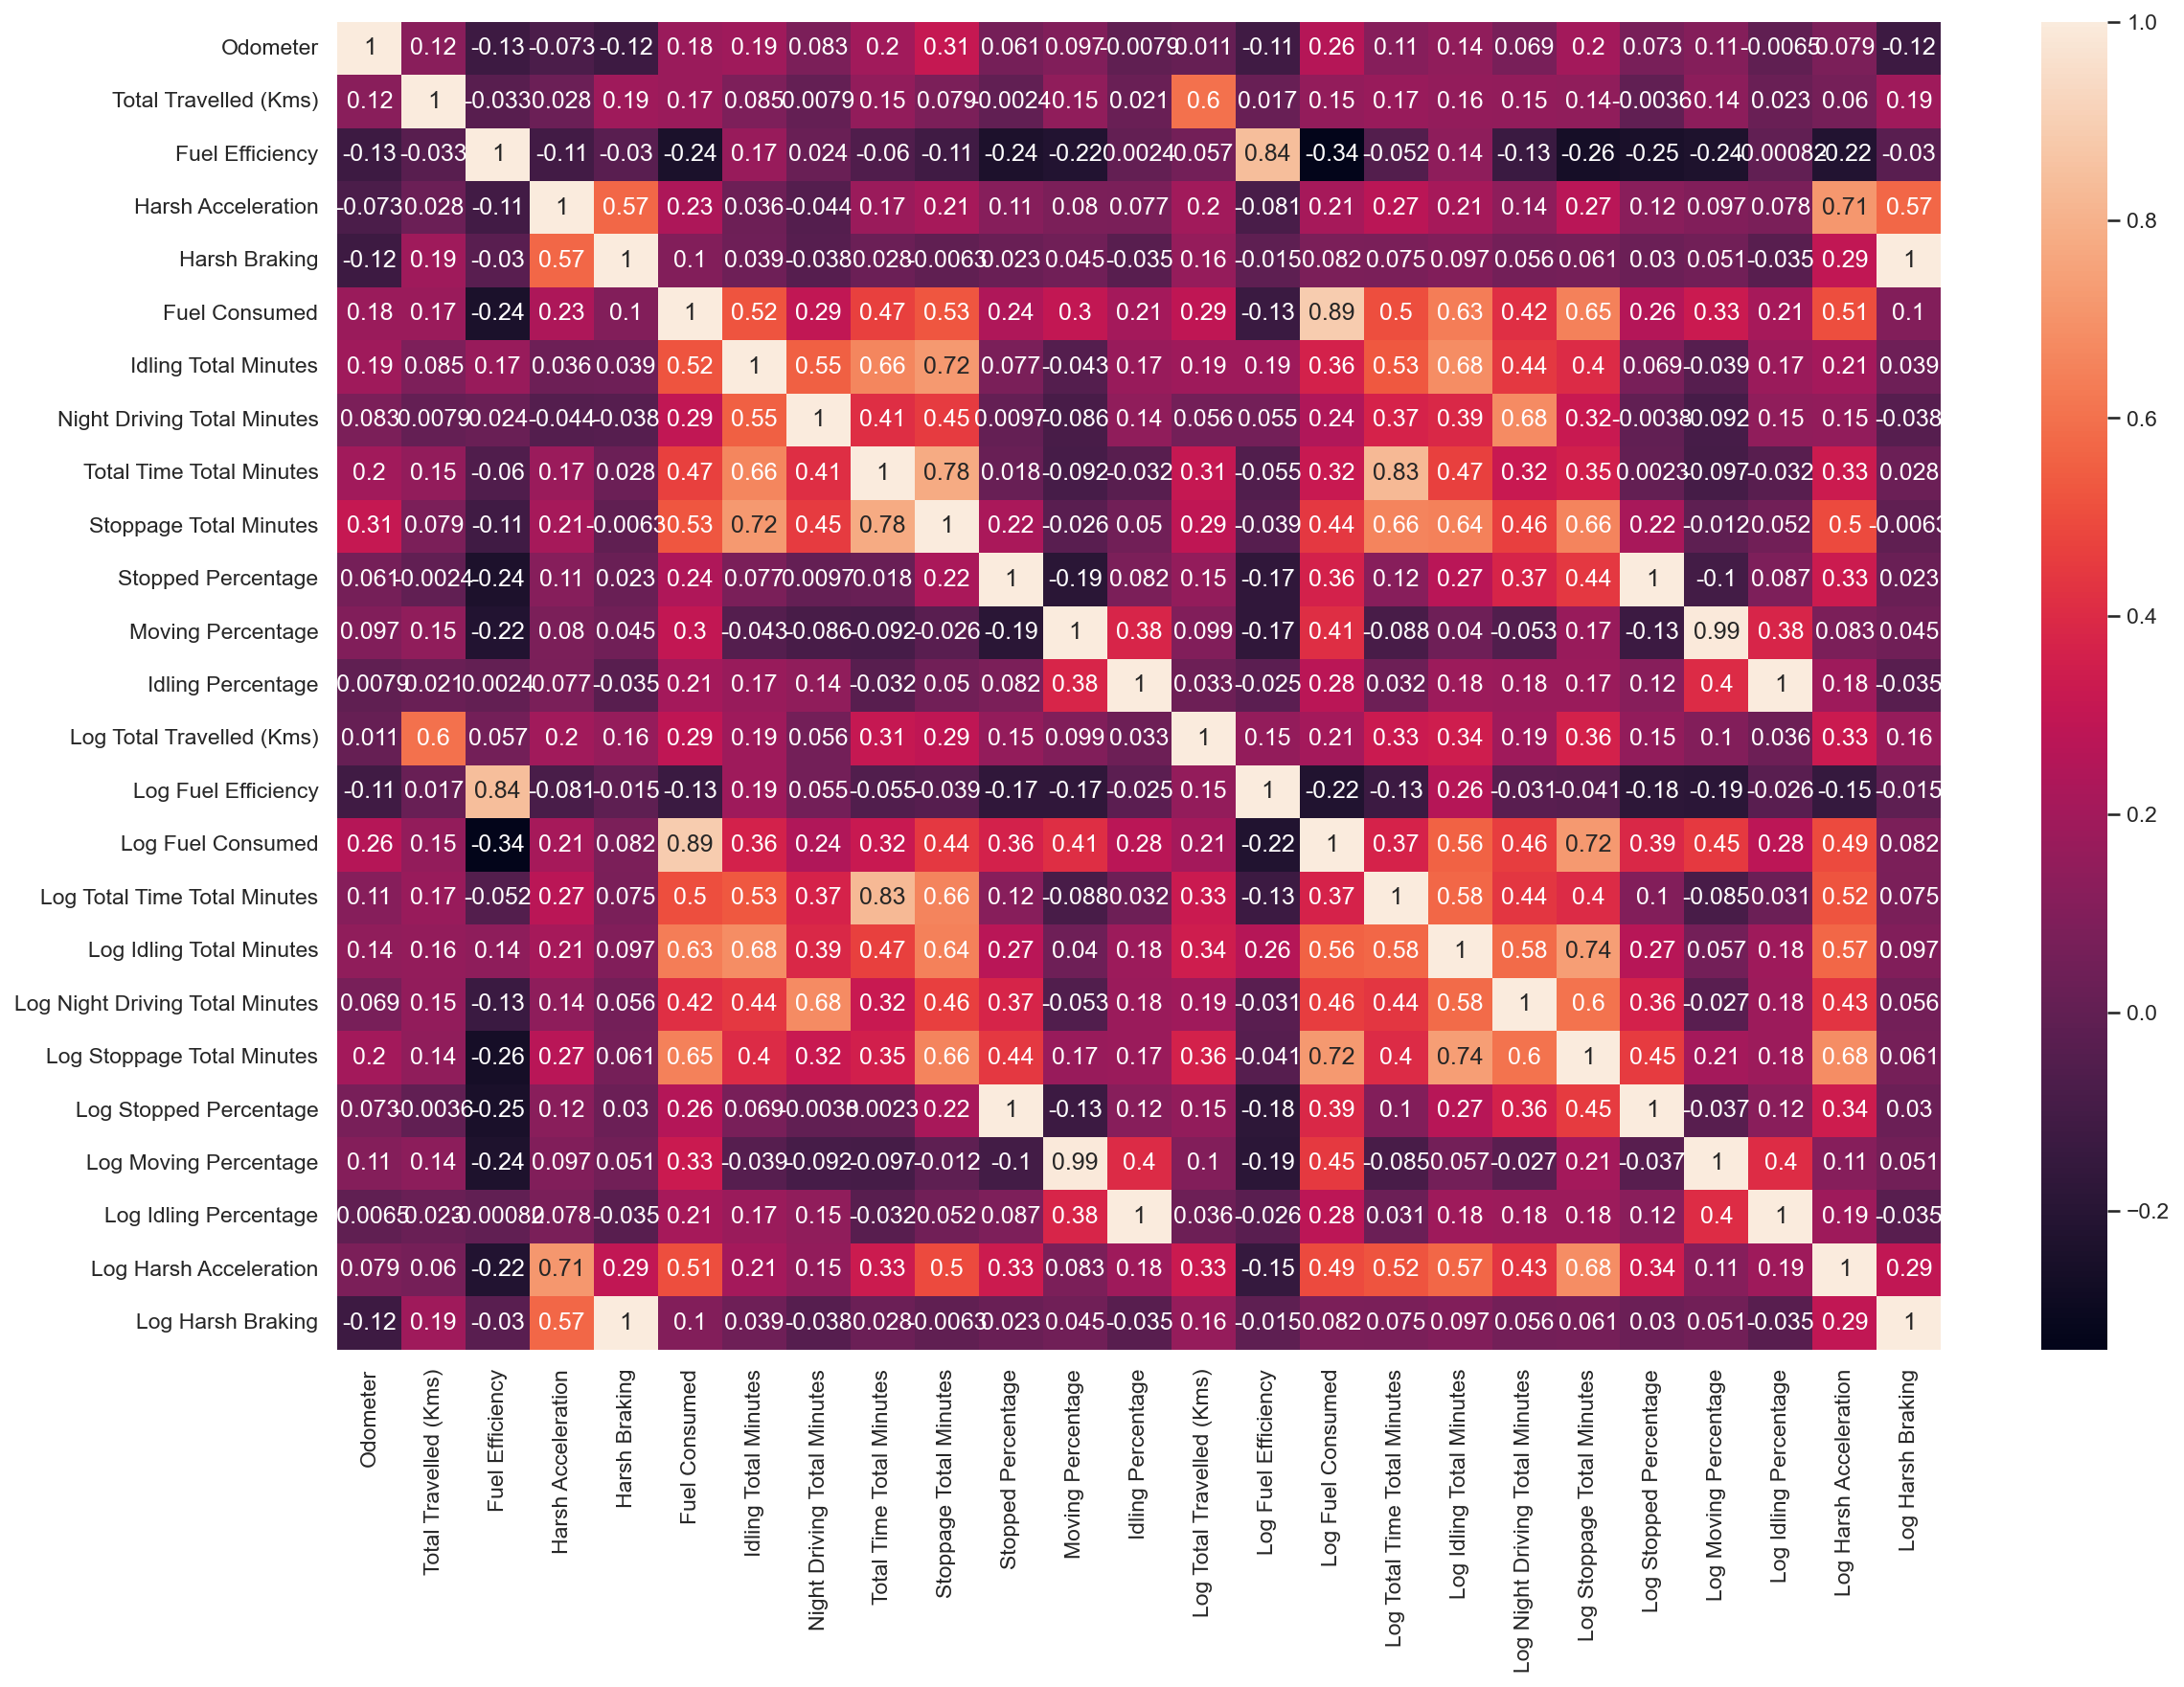

In [98]:
plt.figure(figsize=(18,12), dpi=150)
sns.heatmap(df.corr(),annot=True)

# 3.3. Performing Chi Square analysis

# 4. Data Pre-Processing

## 4.1 Outlier analysis

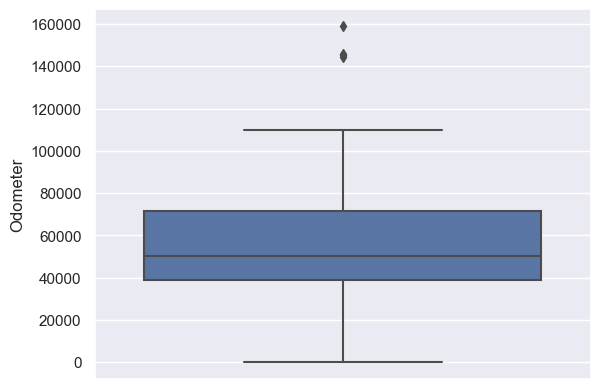

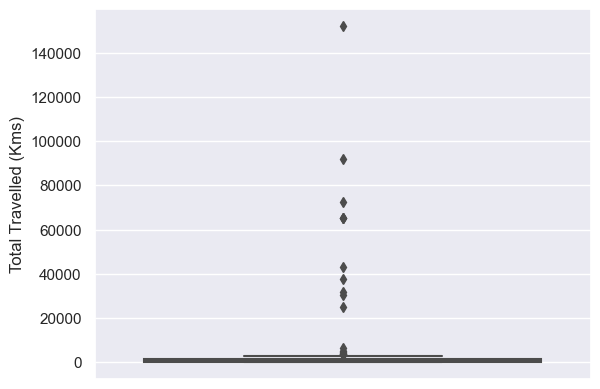

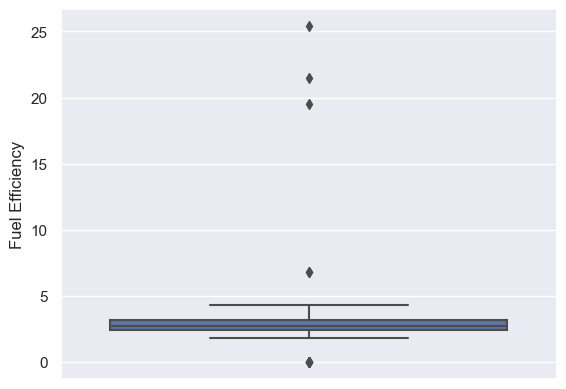

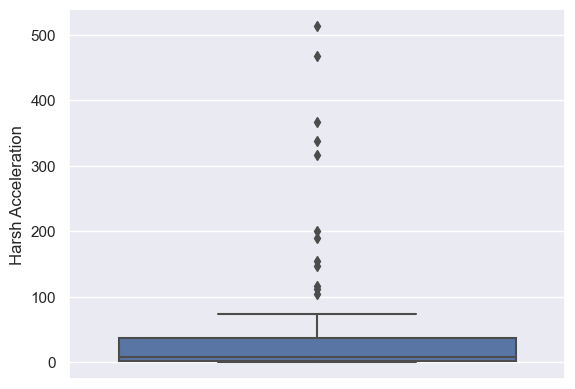

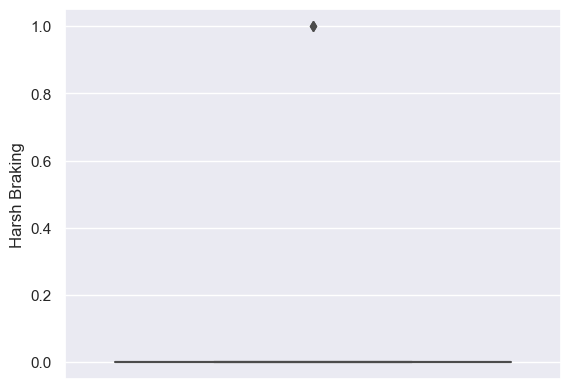

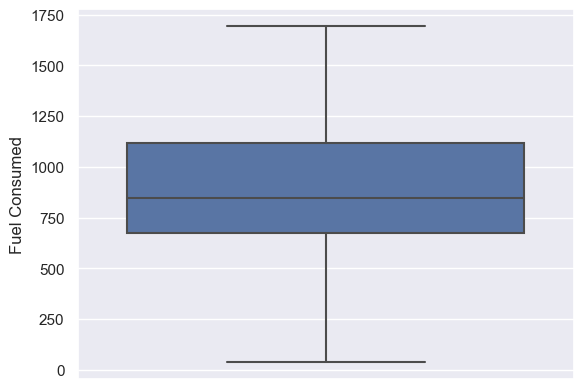

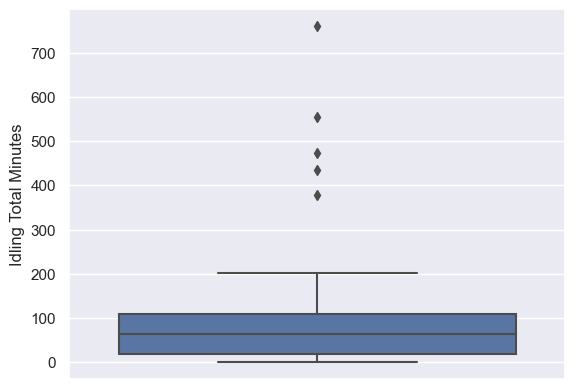

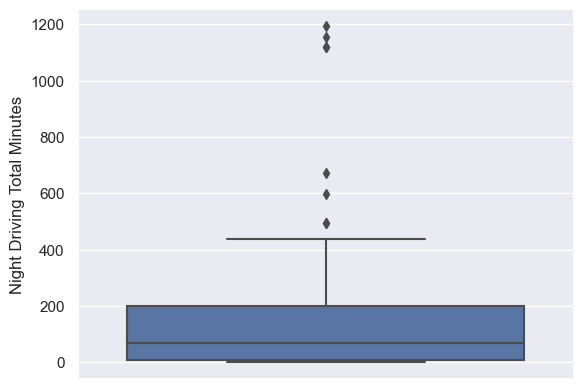

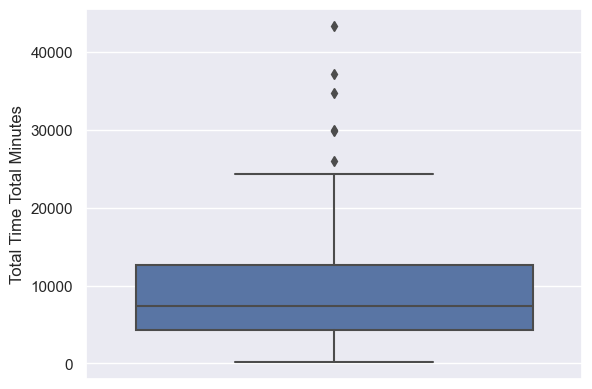

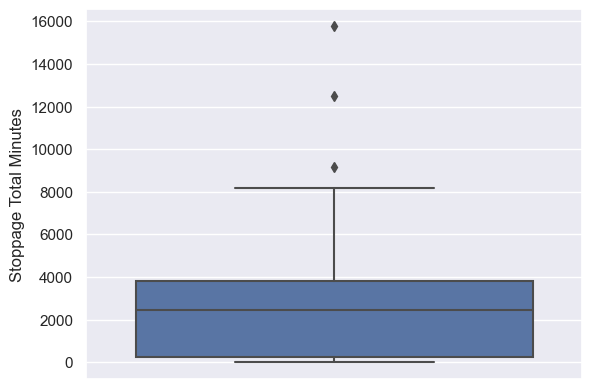

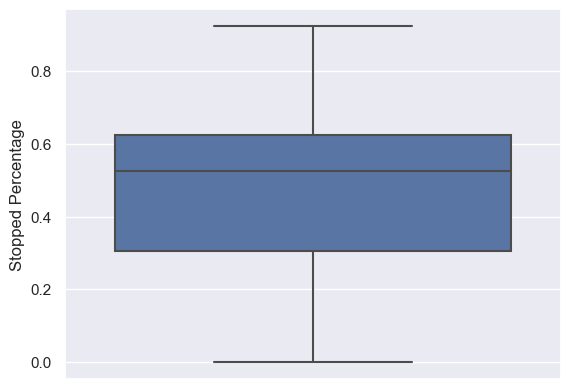

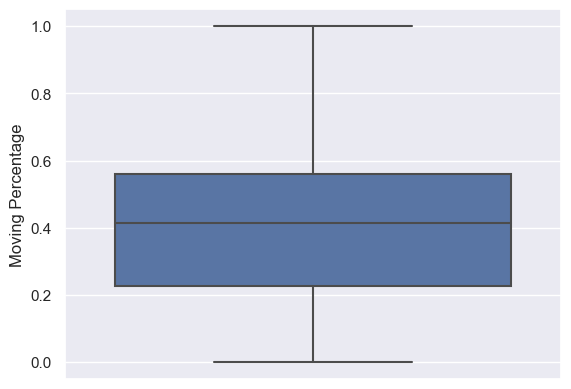

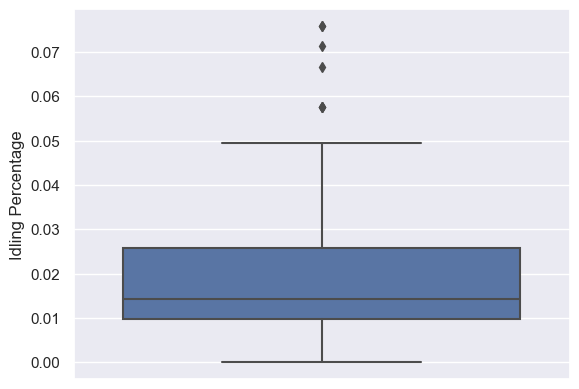

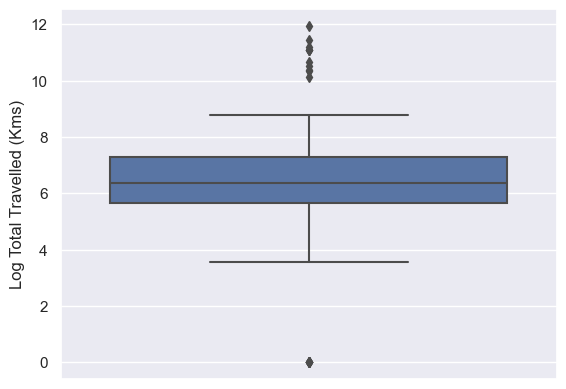

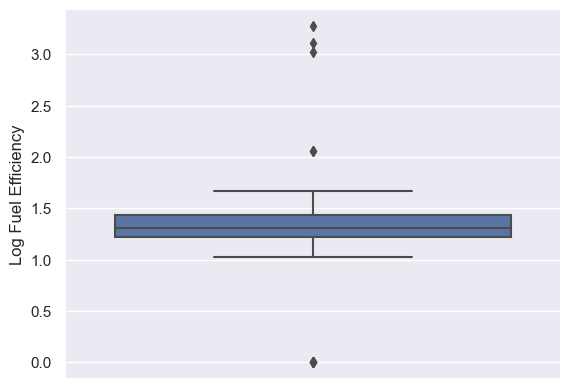

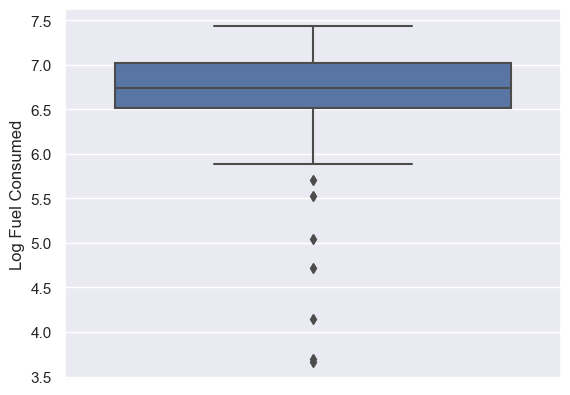

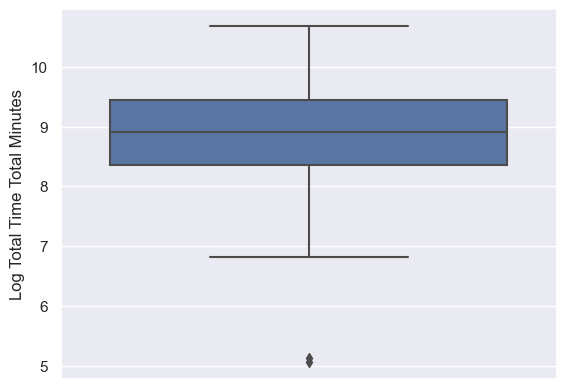

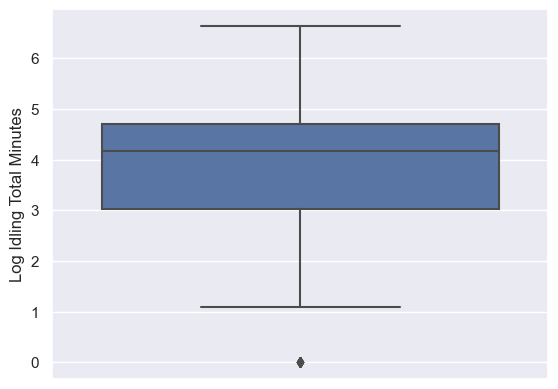

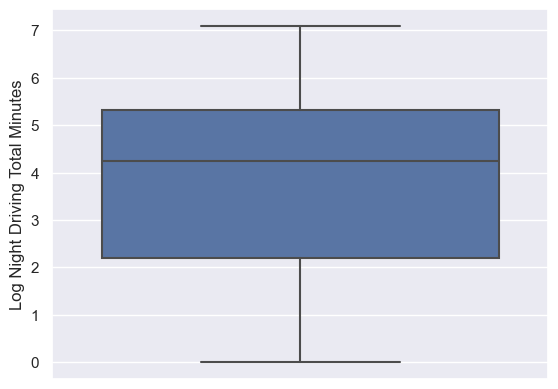

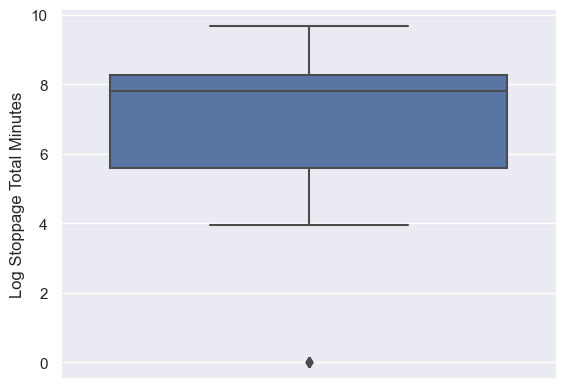

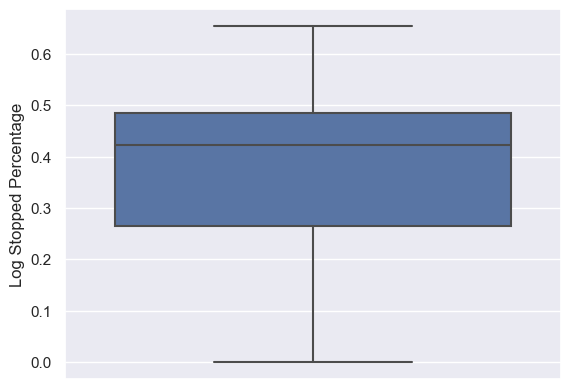

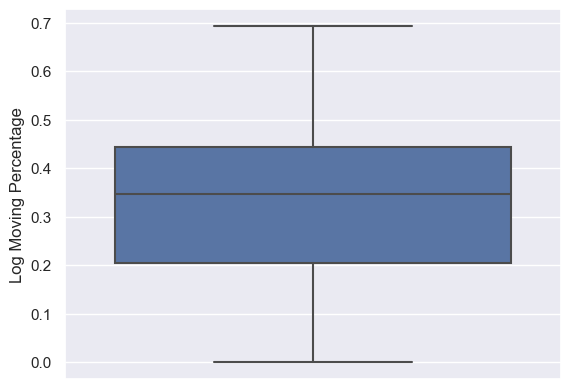

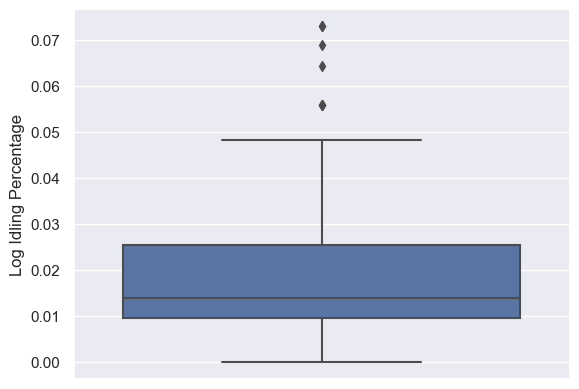

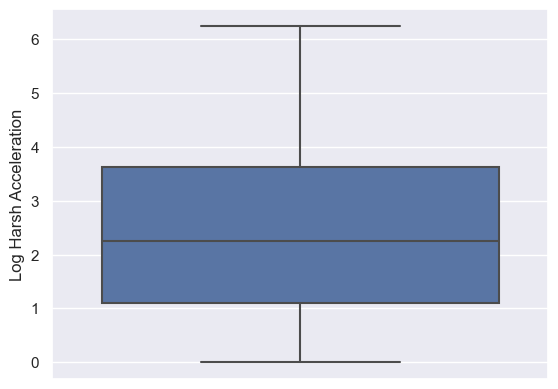

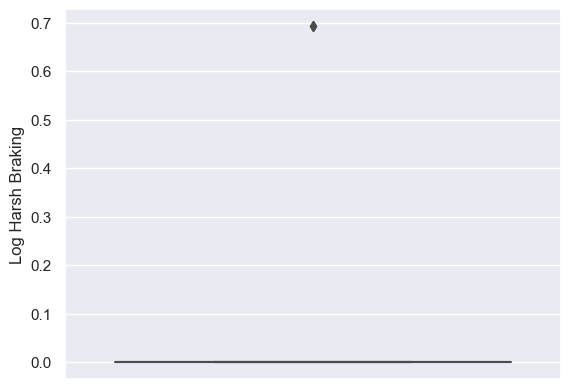

In [99]:
for col in df.columns:
    if df[col].dtypes!= object:
        sns.boxplot(y=col,data=df)
        plt.show()

## 4.2 Outliers treatment

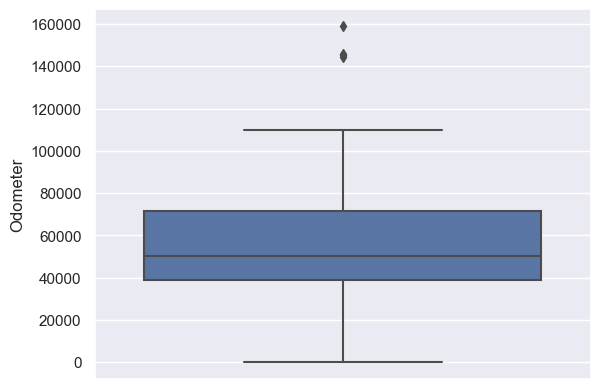

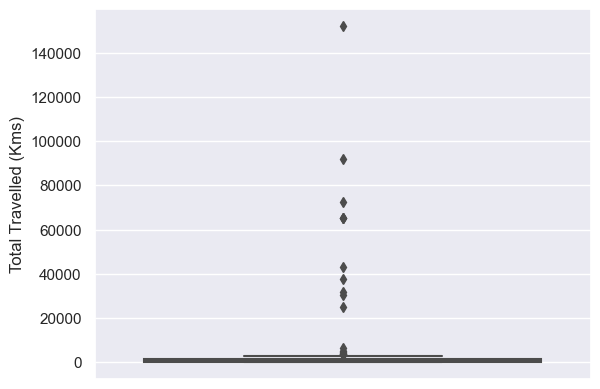

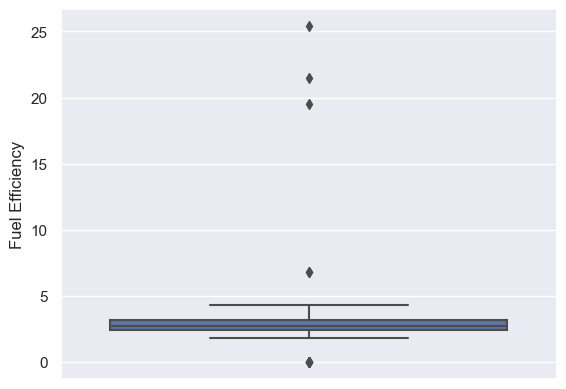

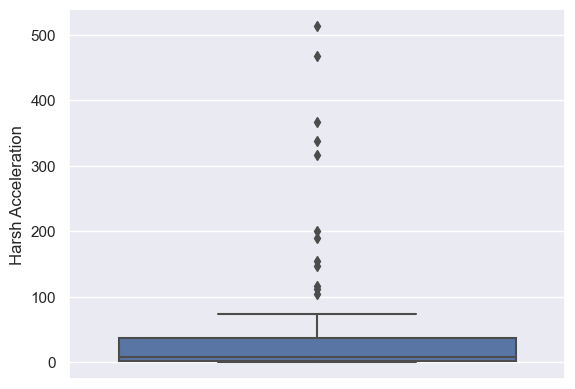

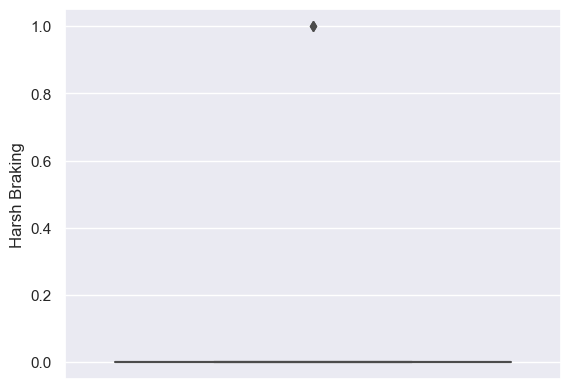

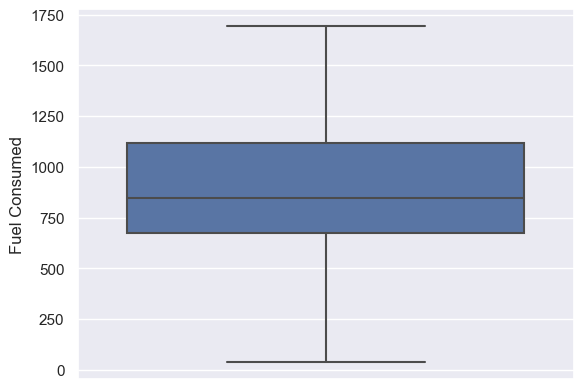

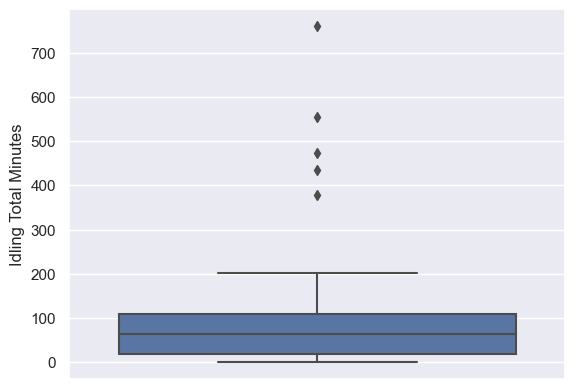

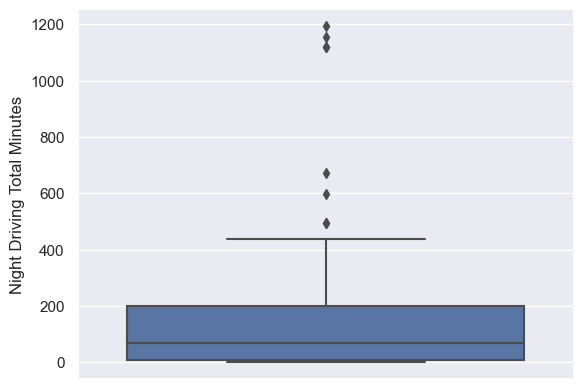

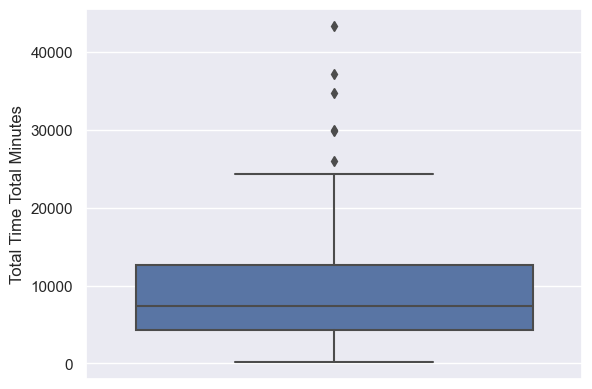

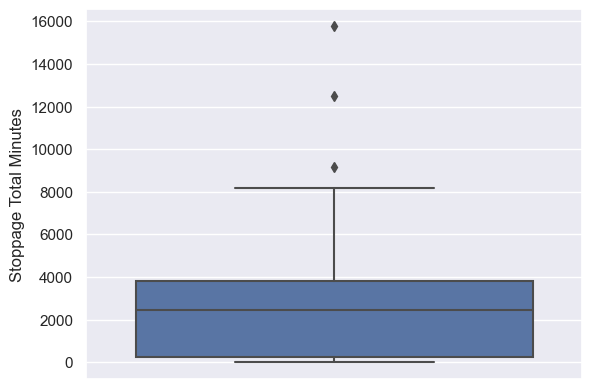

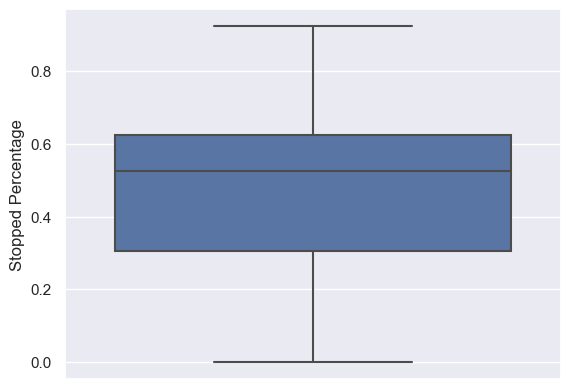

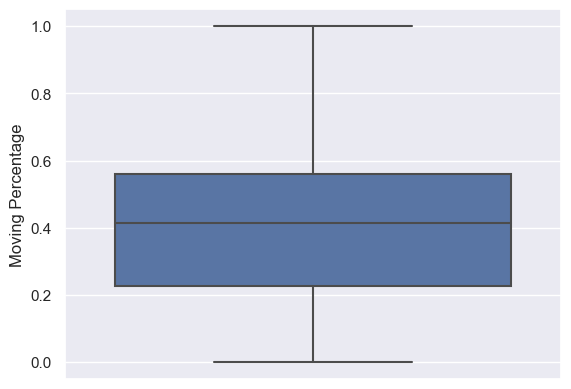

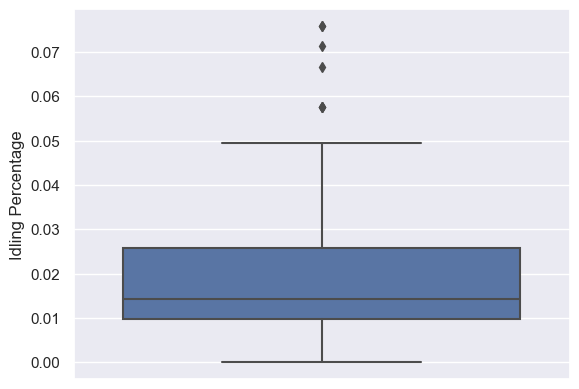

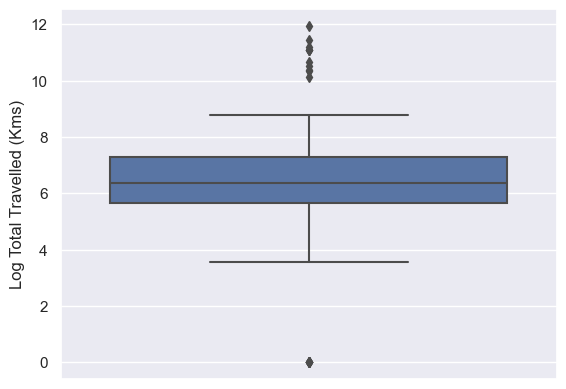

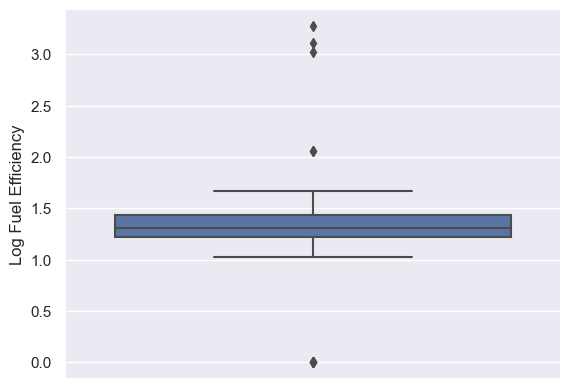

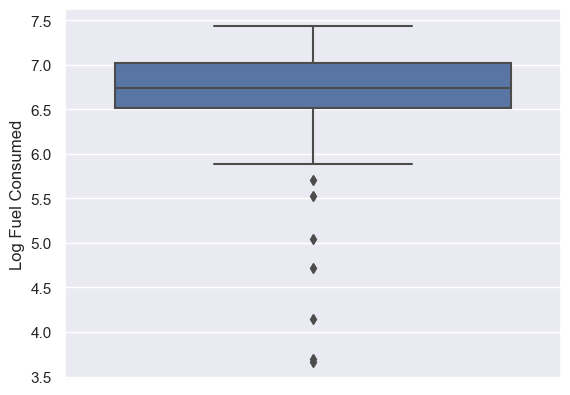

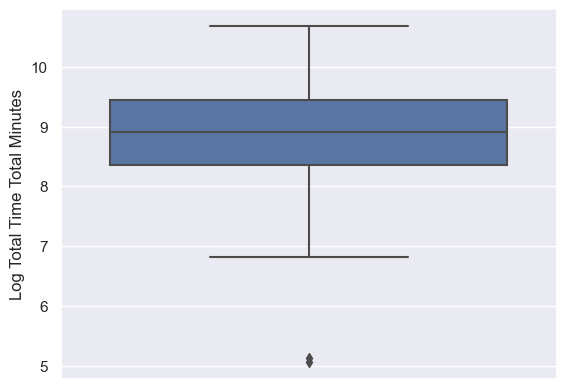

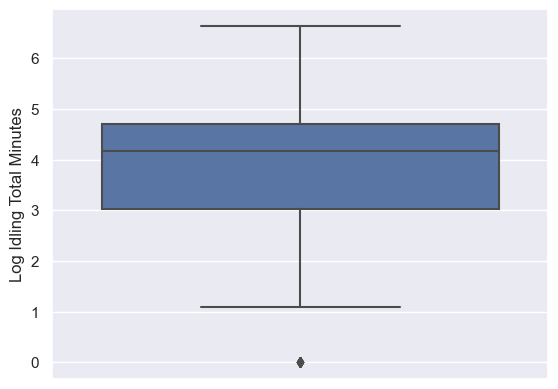

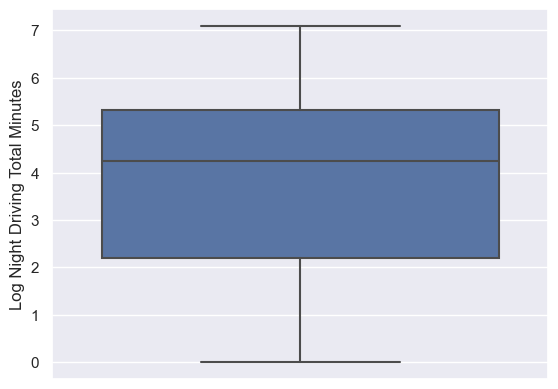

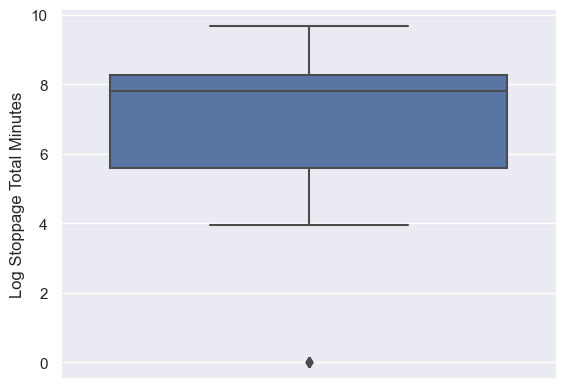

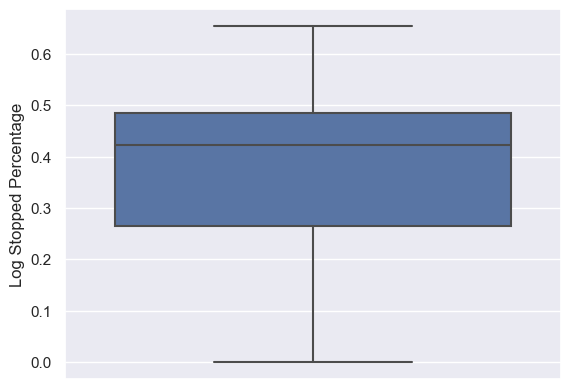

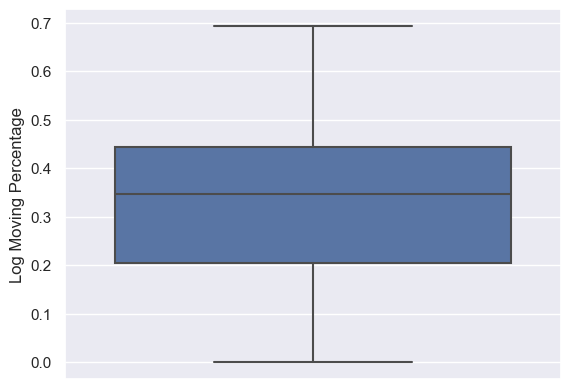

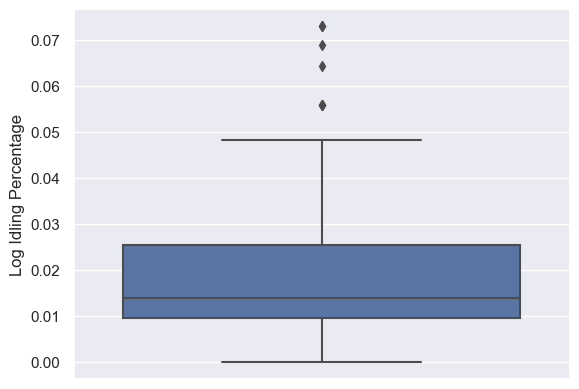

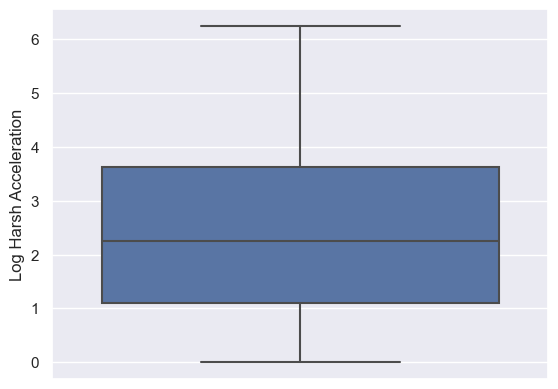

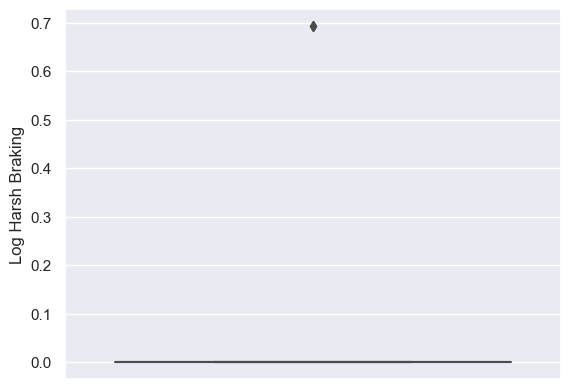

In [100]:
for col in df.columns:
    if df[col].dtypes!= object:
        percentile_25=df[col].quantile(0.25)
        percentile_75=df[col].quantile(0.75)
        IQR=percentile_75-percentile_25
        upper_limit=percentile_75+(1.5*IQR)
        lower_limit=percentile_25-(1.5*IQR)
        df=df[df[col]<=upper_limit]
        df=df[df[col]>=lower_limit]
        plt.figure()
        sns.boxplot(y=col,data=df3)

In [101]:
df.shape

(43, 27)

## 4.3 Ordinal encoding

In [102]:
df['Model Name'].unique()

array(['LPT 3518', '3518TC', '4225TC', 'LPT 4225', 'LPS5530TC', '5525.S'],
      dtype=object)

In [103]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

order = ['LPT 4225', 'LPT 3518', '4225TC', '3518TC', 'LPS5530TC', '5525.S', 'LPS5525TC 4x2', '3.8SGI CNG', 
         'PRIMA 3528.K 6.7L BS6 RDE']
od = OrdinalEncoder(categories = [order])
df["Model Name X"] = od.fit_transform(df[["Model Name"]])

In [104]:
df.head()

Odometer  Total Travelled (Kms) Fuel Type  Fuel Efficiency  \
2    40187.0                569.000    Diesel              2.5   
7    52891.0                475.402    Diesel              2.5   
8    40420.0                590.598    Diesel              2.6   
12   28368.0                438.300    Diesel              2.0   
17       0.0                934.598    Diesel              2.3   

    Harsh Acceleration  Harsh Braking Model Name  Fuel Consumed  \
2                 34.0            0.0   LPT 3518          827.0   
7                  4.0            0.0     3518TC          747.5   
8                 21.0            0.0     3518TC          645.0   
12                71.0            0.0     3518TC         1118.5   
17                 8.0            0.0     4225TC         1201.0   

    Idling Total Minutes  Night Driving Total Minutes  ...  \
2                     41                            8  ...   
7                     49                            8  ...   
8                     59                          236  ...   
12                   127                           89  ...   
17                    49                           93  ...   

    Log Total Time Total Minutes  Log Idling Total Minutes  \
2                       9.051696                  3.737670   
7                       8.900004                  3.912023   
8                       8.888895                  4.094345   
12                      8.894944                  4.852030   
17                      9.740557                  3.912023   

    Log Night Driving Total Minutes  Log Stoppage Total Minutes  \
2                          2.197225                    7.657755   
7                          2.197225                    8.068403   
8                          5.468060                    7.876259   
12                         4.499810                    8.766706   
17                         4.543295                    7.952967   

    Log Stopped Percentage  Log Moving Percentage  Log Idling Percentage  \
2                 0.465556               0.323893               0.024205   
7                 0.528744               0.252780               0.015480   
8                 0.517781               0.272238               0.008762   
12                0.514857               0.263441               0.024888   
17                0.474494               0.323749               0.010445   

    Log Harsh Acceleration  Log Harsh Braking  Model Name X  
2                 3.555348                0.0           1.0  
7                 1.609438                0.0           3.0  
8                 3.091042                0.0           3.0  
12                4.276666                0.0           3.0  
17                2.197225                0.0           2.0  

[5 rows x 28 columns]

## 4.4 One Hot encoding on categorical columns

In [105]:
new_df = df['Fuel Type'].str.get_dummies()

In [106]:
new_df.head()

Diesel
2        1
7        1
8        1
12       1
17       1

In [107]:
df = pd.concat([df,new_df], axis =1)

In [108]:
df.head()

Odometer  Total Travelled (Kms) Fuel Type  Fuel Efficiency  \
2    40187.0                569.000    Diesel              2.5   
7    52891.0                475.402    Diesel              2.5   
8    40420.0                590.598    Diesel              2.6   
12   28368.0                438.300    Diesel              2.0   
17       0.0                934.598    Diesel              2.3   

    Harsh Acceleration  Harsh Braking Model Name  Fuel Consumed  \
2                 34.0            0.0   LPT 3518          827.0   
7                  4.0            0.0     3518TC          747.5   
8                 21.0            0.0     3518TC          645.0   
12                71.0            0.0     3518TC         1118.5   
17                 8.0            0.0     4225TC         1201.0   

    Idling Total Minutes  Night Driving Total Minutes  ...  \
2                     41                            8  ...   
7                     49                            8  ...   
8                     59                          236  ...   
12                   127                           89  ...   
17                    49                           93  ...   

    Log Idling Total Minutes  Log Night Driving Total Minutes  \
2                   3.737670                         2.197225   
7                   3.912023                         2.197225   
8                   4.094345                         5.468060   
12                  4.852030                         4.499810   
17                  3.912023                         4.543295   

    Log Stoppage Total Minutes  Log Stopped Percentage  Log Moving Percentage  \
2                     7.657755                0.465556               0.323893   
7                     8.068403                0.528744               0.252780   
8                     7.876259                0.517781               0.272238   
12                    8.766706                0.514857               0.263441   
17                    7.952967                0.474494               0.323749   

    Log Idling Percentage  Log Harsh Acceleration  Log Harsh Braking  \
2                0.024205                3.555348                0.0   
7                0.015480                1.609438                0.0   
8                0.008762                3.091042                0.0   
12               0.024888                4.276666                0.0   
17               0.010445                2.197225                0.0   

    Model Name X  Diesel  
2            1.0       1  
7            3.0       1  
8            3.0       1  
12           3.0       1  
17           2.0       1  

[5 rows x 29 columns]

## 4.5 Data split into Train and Test

In [109]:
df.columns

Index(['Odometer', 'Total Travelled (Kms)', 'Fuel Type', 'Fuel Efficiency',
       'Harsh Acceleration', 'Harsh Braking', 'Model Name', 'Fuel Consumed',
       'Idling Total Minutes', 'Night Driving Total Minutes',
       'Total Time Total Minutes', 'Stoppage Total Minutes',
       'Stopped Percentage', 'Moving Percentage', 'Idling Percentage',
       'Log Total Travelled (Kms)', 'Log Fuel Efficiency', 'Log Fuel Consumed',
       'Log Total Time Total Minutes', 'Log Idling Total Minutes',
       'Log Night Driving Total Minutes', 'Log Stoppage Total Minutes',
       'Log Stopped Percentage', 'Log Moving Percentage',
       'Log Idling Percentage', 'Log Harsh Acceleration', 'Log Harsh Braking',
       'Model Name X', 'Diesel'],
      dtype='object')

In [110]:
# x = df.drop(["Fuel Type","Fuel Consumed", "Model Name"], axis = 1)
x = df.drop(["Fuel Type","Fuel Consumed", "Model Name", "Fuel Efficiency", "Total Travelled (Kms)", "Harsh Braking", "Harsh Acceleration", "Idling Total Minutes", "Night Driving Total Minutes", "Total Time Total Minutes", "Stoppage Total Minutes", 'Stopped Percentage', 'Moving Percentage', 'Idling Percentage'], axis = 1)

In [111]:
x.head()

Odometer  Log Total Travelled (Kms)  Log Fuel Efficiency  \
2    40187.0                   6.345636             1.252763   
7    52891.0                   6.166262             1.252763   
8    40420.0                   6.382827             1.280934   
12   28368.0                   6.085183             1.098612   
17       0.0                   6.841186             1.193922   

    Log Fuel Consumed  Log Total Time Total Minutes  Log Idling Total Minutes  \
2            6.719013                      9.051696                  3.737670   
7            6.618071                      8.900004                  3.912023   
8            6.470800                      8.888895                  4.094345   
12           7.020637                      8.894944                  4.852030   
17           7.091742                      9.740557                  3.912023   

    Log Night Driving Total Minutes  Log Stoppage Total Minutes  \
2                          2.197225                    7.657755   
7                          2.197225                    8.068403   
8                          5.468060                    7.876259   
12                         4.499810                    8.766706   
17                         4.543295                    7.952967   

    Log Stopped Percentage  Log Moving Percentage  Log Idling Percentage  \
2                 0.465556               0.323893               0.024205   
7                 0.528744               0.252780               0.015480   
8                 0.517781               0.272238               0.008762   
12                0.514857               0.263441               0.024888   
17                0.474494               0.323749               0.010445   

    Log Harsh Acceleration  Log Harsh Braking  Model Name X  Diesel  
2                 3.555348                0.0           1.0       1  
7                 1.609438                0.0           3.0       1  
8                 3.091042                0.0           3.0       1  
12                4.276666                0.0           3.0       1  
17                2.197225                0.0           2.0       1

In [112]:
y = df['Fuel Consumed']

In [113]:
y.head().to_frame()

Fuel Consumed
2           827.0
7           747.5
8           645.0
12         1118.5
17         1201.0

In [114]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size= 0.25 , random_state= 20)

In [115]:
xtrain.head()

Odometer  Log Total Travelled (Kms)  Log Fuel Efficiency  \
42   109810.0                   6.421305             1.163151   
100   47530.0                   5.555282             1.504077   
38    48856.0                   7.301485             1.252763   
26    96143.0                   6.266821             1.335001   
93    69451.0                   5.700444             1.386294   

     Log Fuel Consumed  Log Total Time Total Minutes  \
42            7.043422                      8.910451   
100           6.091988                      7.183112   
38            6.961296                      9.439864   
26            6.621406                      9.216819   
93            6.650279                      7.164720   

     Log Idling Total Minutes  Log Night Driving Total Minutes  \
42                   4.983607                         4.804021   
100                  2.833213                         4.700480   
38                   4.477337                         4.262680   
26                   4.682131                         4.234107   
93                   2.890372                         0.000000   

     Log Stoppage Total Minutes  Log Stopped Percentage  \
42                     5.198497                0.328584   
100                    5.262690                0.336329   
38                     8.268475                0.391569   
26                     8.396155                0.595424   
93                     4.852030                0.182655   

     Log Moving Percentage  Log Idling Percentage  Log Harsh Acceleration  \
42                0.463482               0.021272                1.945910   
100               0.453747               0.025668                1.098612   
38                0.408992               0.015381                4.653960   
26                0.160332               0.012225                3.850148   
93                0.572560               0.026447                0.000000   

     Log Harsh Braking  Model Name X  Diesel  
42                 0.0           0.0       1  
100                0.0           5.0       1  
38                 0.0           3.0       1  
26                 0.0           1.0       1  
93                 0.0           4.0       1

## 4.6 Feature Scaling

In [116]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [117]:
xtrain = sc.fit_transform(xtrain)

In [118]:
xtrain

array([[ 1.97844588,  0.55457773, -1.55657689,  1.41506933,  0.72124274,
         1.65845106,  0.6701877 , -1.4062328 , -0.71647719,  0.75072157,
         0.42291959, -0.04777863,  0.        , -2.24420501,  0.        ],
       [-0.46321111, -0.72786047,  1.26216999, -1.51066031, -1.24780069,
        -1.12248185,  0.6177214 , -1.35504692, -0.65307562,  0.67533633,
         0.95880939, -0.699988  ,  0.        ,  1.05004088,  0.        ],
       [-0.41122592,  1.8579806 , -0.81567254,  1.16252618,  1.32473558,
         1.00373251,  0.39587841,  1.04168433, -0.20089468,  0.32877294,
        -0.29528417,  2.03674888,  0.        , -0.26765748,  0.        ],
       [ 1.44263782,  0.32581189, -0.13573617,  0.11733763,  1.07048109,
         1.26857686,  0.38139966,  1.14349246,  1.46782359, -1.59674823,
        -0.68006322,  1.41801227,  0.        , -1.58535583,  0.        ],
       [ 0.39619099, -0.51290057,  0.28835165,  0.2061255 , -1.26876549,
        -1.04856341, -1.76411379, -1.68249596, 

In [119]:
xtest = sc.transform(xtest)

In [120]:
xtest

array([[ 1.8265676 ,  0.33170886, -0.58275855,  1.34775102,  0.09890702,
         0.48670372, -0.2721028 ,  0.88738071,  0.15852672,  0.00897744,
        -0.96944656,  1.45008992,  0.        , -1.58535583,  0.        ],
       [ 1.8265676 ,  1.29273863, -0.81567254,  1.34775102,  1.38061176,
         0.48670372, -0.2721028 ,  0.88738071,  0.15852672,  0.00897744,
        -0.96944656,  1.45008992,  0.        , -1.58535583,  0.        ],
       [-2.32660155,  1.17635258, -1.3021599 ,  1.56365766,  1.66750445,
         0.27265704,  0.53807206,  0.79010636,  0.47790947, -0.33131551,
        -0.89703631,  0.14567119,  0.        , -0.92650666,  0.        ],
       [ 0.08102592, -0.53988923,  1.62170055, -0.9307174 , -1.23318051,
        -1.94495563, -1.76411379, -1.34682651, -0.49267234,  0.59970673,
        -0.52360024, -0.699988  ,  0.        ,  1.05004088,  0.        ],
       [ 0.90745703, -0.49909773,  0.28835165, -0.45726826, -1.27761591,
        -2.09727508, -0.07561361, -1.26527214, 

# 5. Training Models

## 5.1 Linear Regression

In [121]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [122]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [123]:
lr.intercept_

758.3718750000004

### Checking if model is overfitted or underfitted

In [124]:
print("training score = ",lr.score(xtrain,ytrain))
print("testing score = ",lr.score(xtest,ytest))

training score =  0.9794318566964483
testing score =  0.939614763166137


In [125]:
ypred = lr.predict(xtest)

In [126]:
from sklearn.metrics import r2_score
r2_score(ytest, ypred)

0.939614763166137

Text(0, 0.5, 'Y')

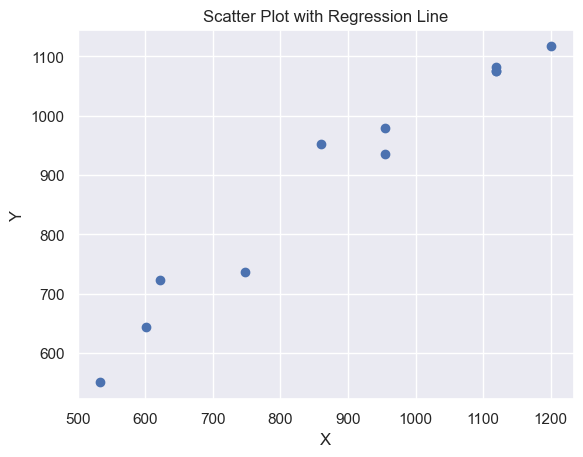

In [127]:
plt.scatter(ytest, ypred)
plt.title('Scatter Plot with Regression Line')
plt.xlabel('X')
plt.ylabel('Y')

## 5.2 Decission Tree Regressor

In [128]:
from sklearn.tree import DecisionTreeRegressor
dc = DecisionTreeRegressor(max_depth=4)

In [129]:
dc.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=4)

In [130]:
ypred = dc.predict(xtest)

### Checking if model is overfitted or underfitted

In [131]:
print("training score = ",dc.score(xtrain,ytrain))
print("testing score = ",dc.score(xtest,ytest))

training score =  0.9970993255032586
testing score =  0.9289905755999477


In [132]:
r2_score(ytest, ypred)

0.9289905755999477

### Visualizing Tree

In [133]:
from sklearn import tree

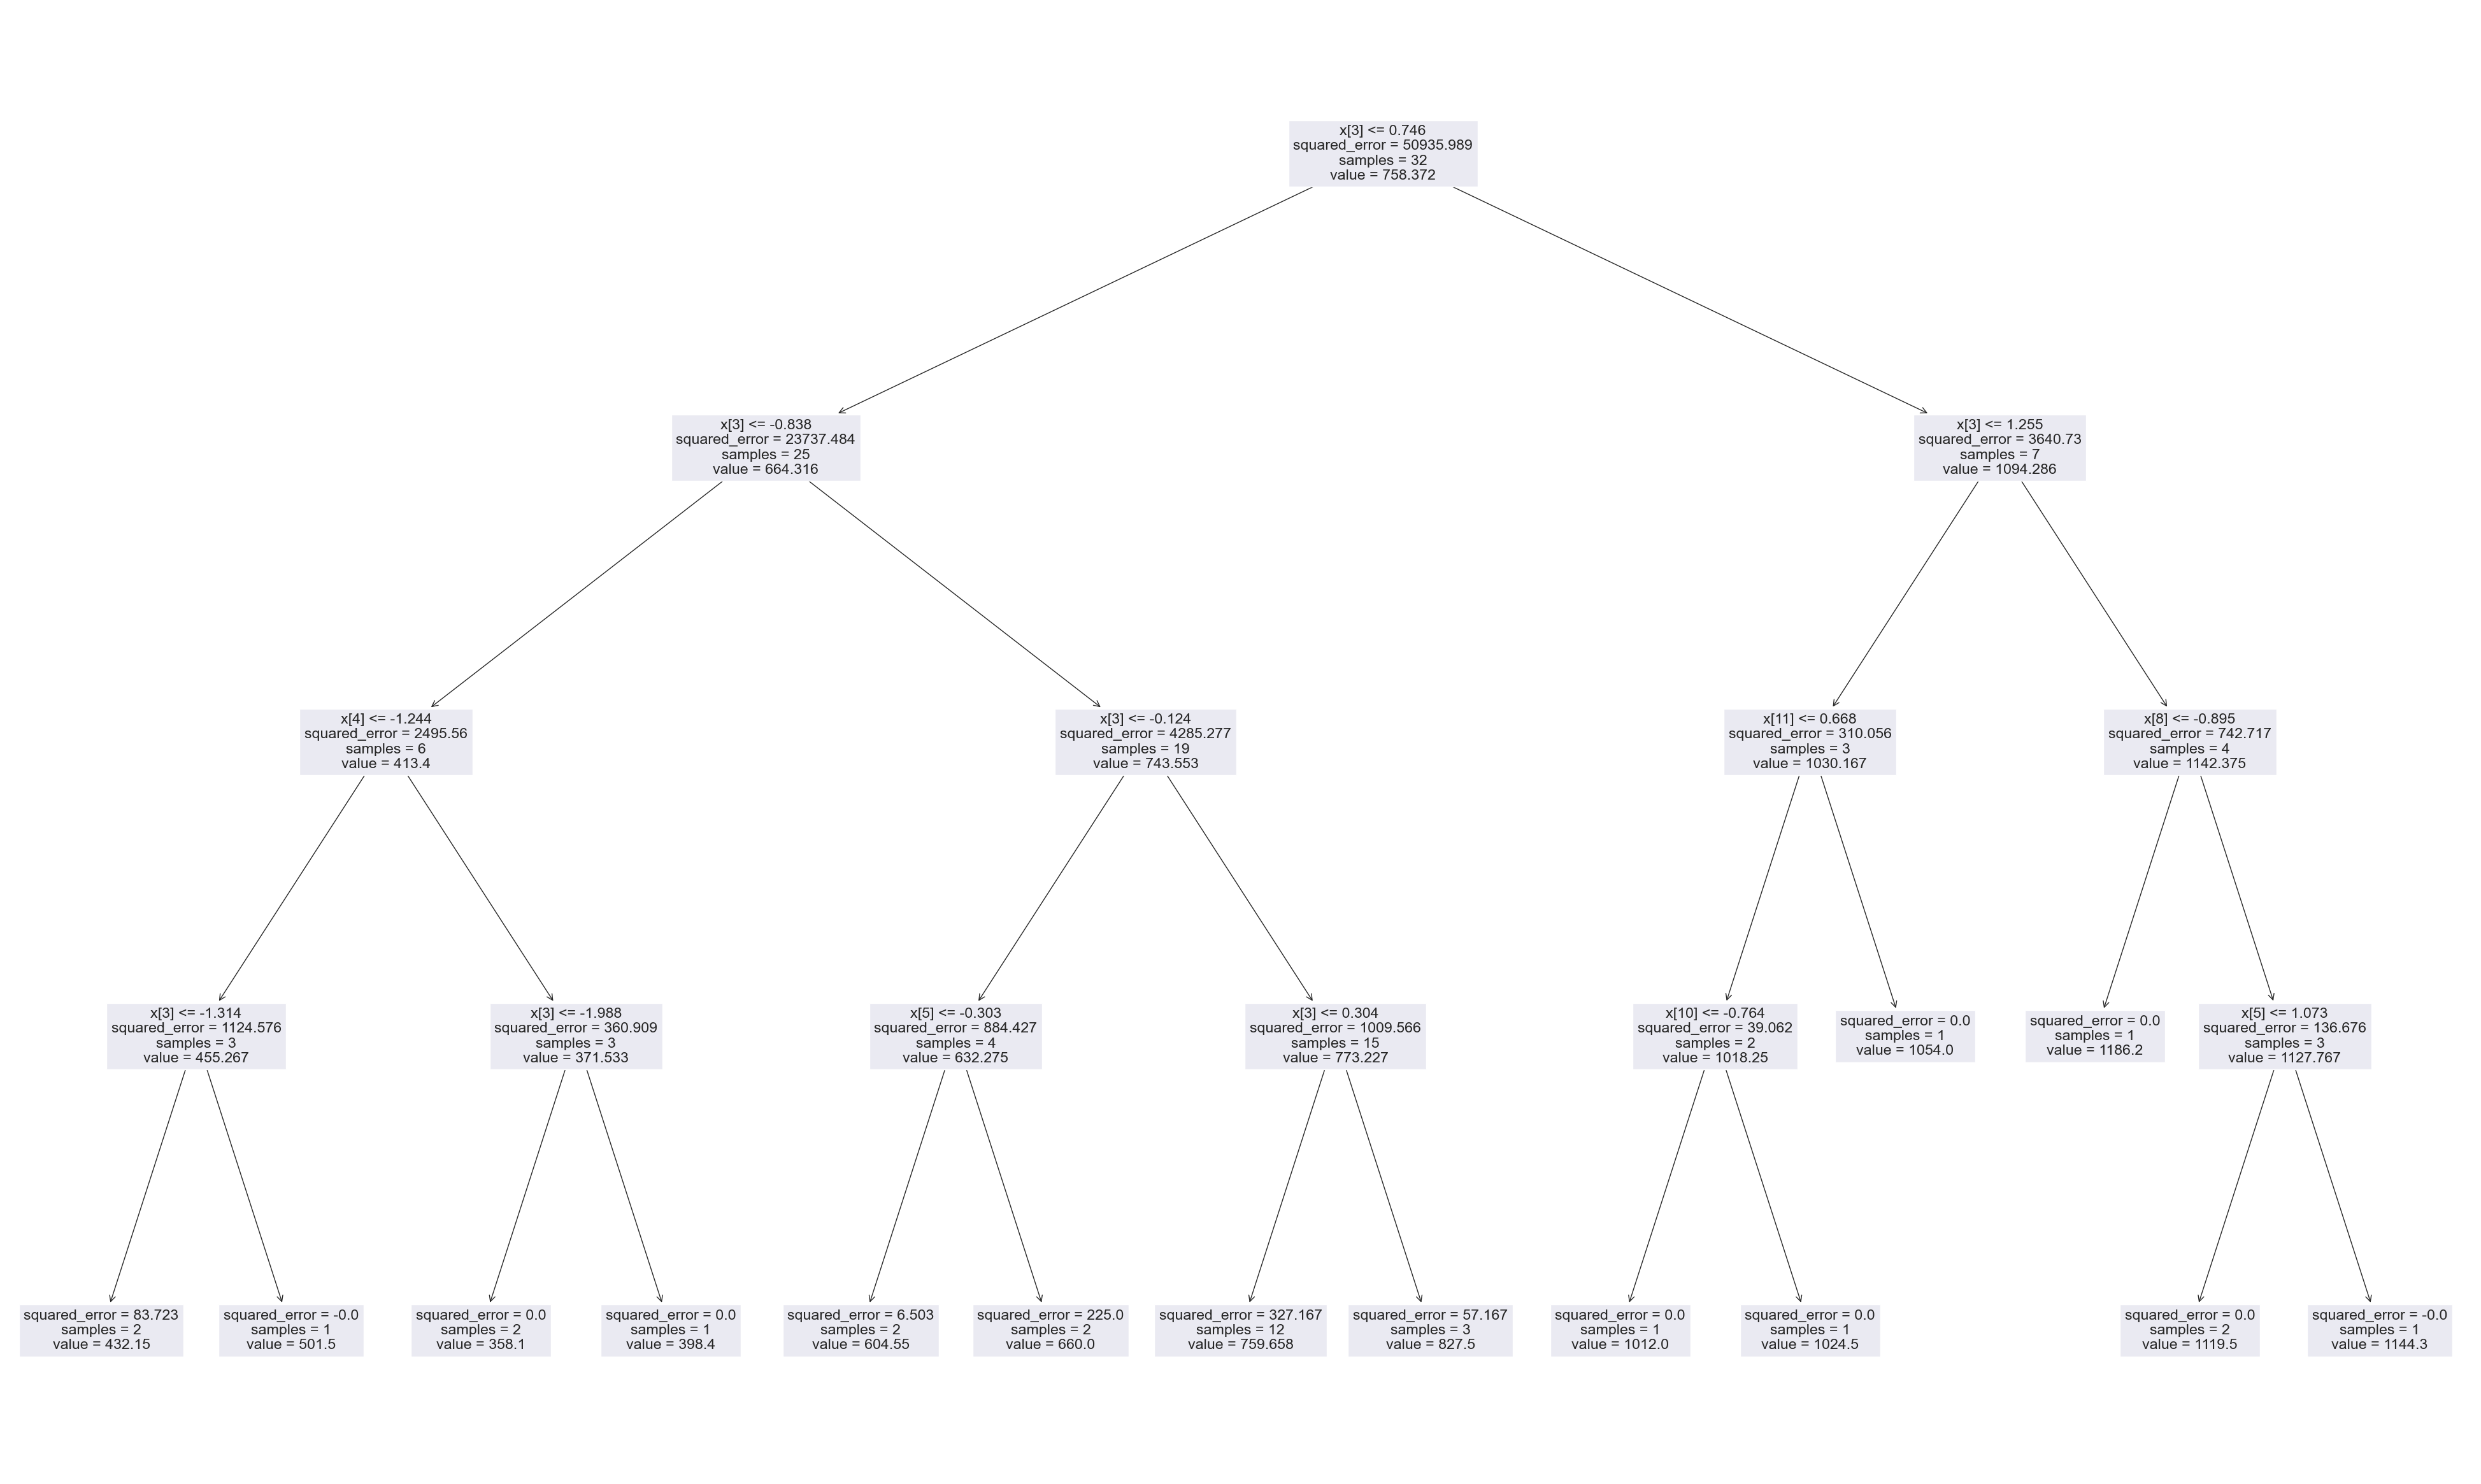

In [134]:
plt.figure(figsize=(50,30))
tree.plot_tree(dc)
plt.show()

## 5.3 Random Forest Regressor

In [135]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [136]:
no_of_decision_tree = [10,20,30,40,50,60,70,80,90,100]
max_no_of_features = ['sqrt','log2']
max_depth = [6,7,8,9,10,11,12,13,14,15]
criterion_of_decision_tree = ["squared_error", "poisson"]
min_sample_split=[2,3,4,5,6]

In [137]:
random_grid = {
    'n_estimators' : no_of_decision_tree,
    'max_features' : max_no_of_features,
    'max_depth' : max_depth,
    'criterion' : criterion_of_decision_tree,
    'min_samples_split' : min_sample_split
}

### Hyper Parameter Tuning

In [138]:
from sklearn.model_selection import RandomizedSearchCV
rscv = RandomizedSearchCV(estimator = rf , param_distributions = random_grid , n_iter = 25 , cv = 5 ,n_jobs=-1)
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=25,
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'poisson'],
                                        'max_depth': [6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]})

In [139]:
rscv.best_params_

{'n_estimators': 40,
 'min_samples_split': 6,
 'max_features': 'sqrt',
 'max_depth': 7,
 'criterion': 'poisson'}

In [140]:
rf = RandomForestRegressor(n_estimators = 30 , min_samples_split = 5, max_features = 'log2', max_depth = 15, criterion='poisson')

In [141]:
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)

### Checking if model is overfitted or underfitted

In [142]:
print("training score = ",rf.score(xtrain,ytrain))
print("testing score = ",rf.score(xtest,ytest))

training score =  0.9147329991804759
testing score =  0.631320805040154


In [143]:
r2_score(ytest,ypred)

0.631320805040154

# 6. New Data Prediction

In [144]:
xtest[0].reshape(1,-1)

array([[ 1.8265676 ,  0.33170886, -0.58275855,  1.34775102,  0.09890702,
         0.48670372, -0.2721028 ,  0.88738071,  0.15852672,  0.00897744,
        -0.96944656,  1.45008992,  0.        , -1.58535583,  0.        ]])

In [145]:
sc.fit_transform(xtest[0].reshape(1,-1))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [146]:
lr.predict(sc.fit_transform(xtest[0].reshape(1,-1)))

array([758.371875])

In [147]:
dc.predict(sc.fit_transform(xtest[0].reshape(1,-1)))

array([759.65833333])

# 7. Model Deployment

## 7.1 Pickling Model and Scaler object for Deployment

In [148]:
import pickle

In [149]:
pickle.dump(lr, open('C:\\Users\\Admin\\Desktop\\Rohit\\MachineLearning\\FuelConsumptionPrediction\\linear_regression_model.pkl', 'wb'))

In [150]:
pickled_model = pickle.load(open('linear_regression_model.pkl', 'rb'))

In [151]:
# Prediction using pickled file
pickled_model.predict(sc.fit_transform(xtest[0].reshape(1,-1)))

array([758.371875])